In [2]:
from qiskit.circuit import Parameter
from qiskit.extensions import UnitaryGate
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter,ParameterVector
from qiskit.quantum_info import Operator
import math as m
from qiskit import Aer,execute,QuantumCircuit
from qiskit.circuit import Parameter, Gate
from qiskit.tools.visualization import plot_histogram

# XY MIXER

In [2]:
class UHGate(Gate):
    def __init__(self, theta, label=None):
        super().__init__('U', 2, [theta], label=label)
        
        
    def _define(self):
        qc = QuantumCircuit(2)
        qc.unitary(self.to_matrix(), [0, 1])
        
        self.definition = qc
        
    def to_matrix(self):
        t = float(self.params[0])
        a = np.cos( t)+1j * np.sin( t)
        c = np.cos( t)
        s = -1j * np.sin( t)

        return np.array([[a, 0, 0, 0], 
                         [0, c, s, 0], 
                         [0, s, c, 0],
                         [0, 0, 0, a]])


In [9]:
def mixer(n,t):
    N = n*n
    qc = QuantumCircuit(N)
    qubits_pair = []
    for i in range(N//n-1):
        for j in range(n):
            qubits_pair.append((t[i],i*n+j,(i+1)*n+j))
    for i,pair in enumerate(qubits_pair):
        qc.append(UHGate(pair[0]), [pair[1],pair[2]])
    return qc
def init(n):
    N = n*n
    qc = QuantumCircuit(N)
    for i in range(N):
        qc.x(i*n+i)
    return qc    

In [10]:
n = 4
N = 16
t = ParameterVector('θ',(N//n-1))
qc = mixer(3,t)
"""qc.append(UHGate(t[0]), [0,4])
qc.append(UHGate(t[0]), [1,5])
qc.append(UHGate(t[0]), [2,6])
qc.append(UHGate(t[0]), [3,7])
qc.barrier()
qc.append(UHGate(t[1]), [8,4])
qc.append(UHGate(t[1]), [9,5])
qc.append(UHGate(t[1]), [10,6])
qc.append(UHGate(t[1]), [11,7])
qc.draw()  
qc.append(UHGate(t[2]), [8,12])
qc.append(UHGate(t[2]), [9,13])
qc.append(UHGate(t[2]), [10,14])
qc.append(UHGate(t[2]), [11,15])"""
      

'qc.append(UHGate(t[0]), [0,4])\nqc.append(UHGate(t[0]), [1,5])\nqc.append(UHGate(t[0]), [2,6])\nqc.append(UHGate(t[0]), [3,7])\nqc.barrier()\nqc.append(UHGate(t[1]), [8,4])\nqc.append(UHGate(t[1]), [9,5])\nqc.append(UHGate(t[1]), [10,6])\nqc.append(UHGate(t[1]), [11,7])\nqc.draw()  \nqc.append(UHGate(t[2]), [8,12])\nqc.append(UHGate(t[2]), [9,13])\nqc.append(UHGate(t[2]), [10,14])\nqc.append(UHGate(t[2]), [11,15])'

In [5]:
#test de circuit 
print(qc.parameters)
qc = qc.bind_parameters({t: [np.pi/5, np.pi/4, np.pi/2]})
qc.measure_all()
qc.draw()

ParameterView([ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2])])


┌───┐                      ┌─────────┐                      »
    q_0: ┤ X ├──────────────────────┤0        ├──────────────────────»
         └───┘                      │         │┌─────────┐           »
    q_1: ───────────────────────────┤         ├┤0        ├───────────»
              ┌─────────┐           │         ││         │           »
    q_2: ─────┤0        ├───────────┤  U(π/5) ├┤         ├───────────»
              │         │┌─────────┐│         ││         │           »
    q_3: ─────┤         ├┤0        ├┤         ├┤  U(π/5) ├───────────»
              │         ││         ││         ││         │┌─────────┐»
    q_4: ─────┤  U(π/5) ├┤         ├┤1        ├┤         ├┤0        ├»
         ┌───┐│         ││         │└─────────┘│         ││         │»
    q_5: ┤ X ├┤         ├┤  U(π/5) ├───────────┤1        ├┤         ├»
         └───┘│         ││         │┌─────────┐└─────────┘│         │»
    q_6: ─────┤1        ├┤         ├┤0        ├───────────┤  U(π/4) ├»
              └─────────┘│         ││         │┌─────────┐│         │»
    q_7: ────────────────┤1        ├┤         ├┤0        ├┤         ├»
                         └─────────┘│         ││         ││         │»
    q_8: ───────────────────────────┤  U(π/4) ├┤         ├┤1        ├»
                                    │         ││         │└─────────┘»
    q_9: ───────────────────────────┤         ├┤  U(π/4) ├───────────»
         ┌───┐                      │         ││         │┌─────────┐»
   q_10: ┤ X ├──────────────────────┤1        ├┤         ├┤0        ├»
         └───┘                      └─────────┘│         ││         │»
   q_11: ──────────────────────────────────────┤1        ├┤         ├»
                                               └─────────┘│         │»
   q_12: ─────────────────────────────────────────────────┤  U(π/2) ├»
                                                          │         │»
   q_13: ─────────────────────────────────────────────────┤         ├»
                                                          │         │»
   q_14: ─────────────────────────────────────────────────┤1        ├»
         ┌───┐                                            └─────────┘»
   q_15: ┤ X ├───────────────────────────────────────────────────────»
         └───┘                                                       »
meas: 16/════════════════════════════════════════════════════════════»
                                                                     »
«                                           ░ ┌─┐                              »
«    q_0: ──────────────────────────────────░─┤M├──────────────────────────────»
«                                           ░ └╥┘┌─┐                           »
«    q_1: ──────────────────────────────────░──╫─┤M├───────────────────────────»
«                                           ░  ║ └╥┘┌─┐                        »
«    q_2: ──────────────────────────────────░──╫──╫─┤M├────────────────────────»
«                                           ░  ║  ║ └╥┘┌─┐                     »
«    q_3: ──────────────────────────────────░──╫──╫──╫─┤M├─────────────────────»
«                                           ░  ║  ║  ║ └╥┘┌─┐                  »
«    q_4: ──────────────────────────────────░──╫──╫──╫──╫─┤M├──────────────────»
«         ┌─────────┐                       ░  ║  ║  ║  ║ └╥┘┌─┐               »
«    q_5: ┤0        ├───────────────────────░──╫──╫──╫──╫──╫─┤M├───────────────»
«         │         │                       ░  ║  ║  ║  ║  ║ └╥┘┌─┐            »
«    q_6: ┤         ├───────────────────────░──╫──╫──╫──╫──╫──╫─┤M├────────────»
«         │         │                       ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐         »
«    q_7: ┤  U(π/4) ├───────────────────────░──╫──╫──╫──╫──╫──╫──╫─┤M├─────────»
«         │         │┌─────────┐            ░  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐      »
«    q_8: ┤         ├┤0        ├────────────░──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────»
«         │         ││         │┌─────────┐ ░  ║  ║  ║  ║  ║  ║  ║

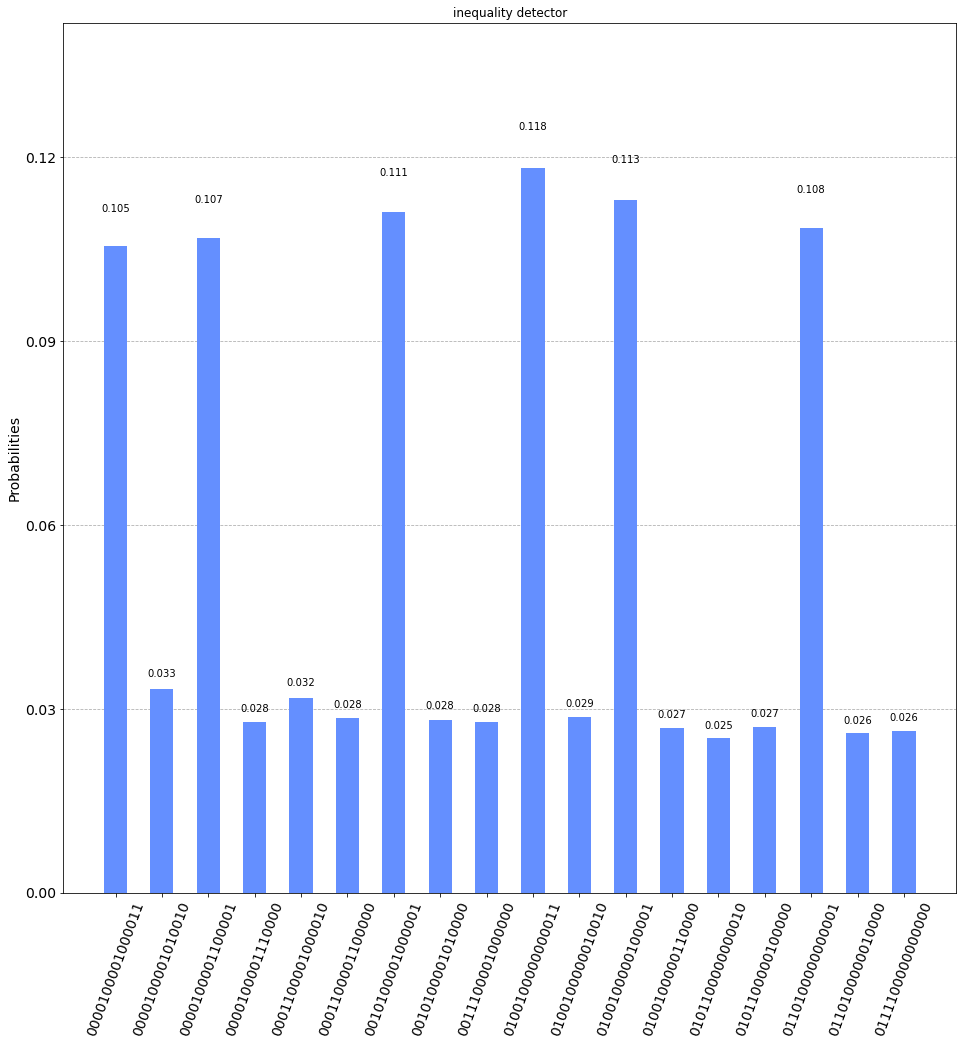

In [6]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qc, simulator, shots=5000)

# Grab results from the job
result = job.result()

# Return counts
counts = result.get_counts(qc)
plot_histogram(counts, figsize=(16, 16),title="inequality detector")

# Tests avec QAOA


p = 1 it =1000


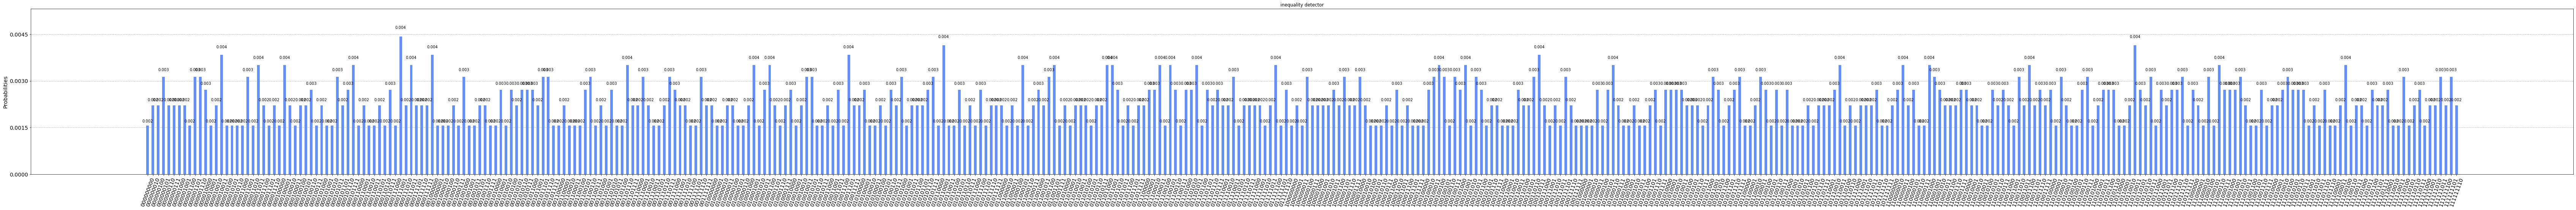

In [26]:
# Return counts
counts =  {'000000000': 0.03162277660168379, '000000010': 0.044721359549995794, '000000100': 0.044721359549995794, '000000101': 0.06324555320336758, '000000110': 0.044721359549995794, '000000111': 0.044721359549995794, '000001000': 0.044721359549995794, '000001001': 0.044721359549995794, '000001100': 0.03162277660168379, '000001101': 0.06324555320336758, '000001110': 0.06324555320336758, '000010000': 0.05477225575051661, '000010001': 0.03162277660168379, '000010010': 0.044721359549995794, '000010011': 0.07745966692414834, '000010100': 0.03162277660168379, '000010101': 0.03162277660168379, '000010110': 0.03162277660168379, '000011000': 0.03162277660168379, '000011001': 0.06324555320336758, '000011010': 0.03162277660168379, '000011011': 0.07071067811865475, '000011100': 0.044721359549995794, '000011101': 0.03162277660168379, '000011110': 0.044721359549995794, '000100000': 0.03162277660168379, '000100001': 0.07071067811865475, '000100010': 0.044721359549995794, '000100011': 0.03162277660168379, '000100100': 0.044721359549995794, '000100101': 0.044721359549995794, '000100110': 0.05477225575051661, '000100111': 0.03162277660168379, '000101000': 0.044721359549995794, '000101001': 0.03162277660168379, '000101010': 0.03162277660168379, '000101011': 0.06324555320336758, '000101101': 0.044721359549995794, '000101110': 0.05477225575051661, '000101111': 0.07071067811865475, '000110000': 0.03162277660168379, '000110001': 0.044721359549995794, '000110010': 0.03162277660168379, '000110011': 0.03162277660168379, '000110101': 0.044721359549995794, '000110110': 0.03162277660168379, '000110111': 0.05477225575051661, '000111000': 0.03162277660168379, '000111001': 0.08944271909999159, '000111010': 0.044721359549995794, '000111011': 0.07071067811865475, '000111101': 0.044721359549995794, '000111110': 0.044721359549995794, '000111111': 0.044721359549995794, '001000000': 0.07745966692414834, '001000001': 0.03162277660168379, '001000010': 0.03162277660168379, '001000100': 0.03162277660168379, '001000110': 0.044721359549995794, '001000111': 0.03162277660168379, '001001000': 0.06324555320336758, '001001001': 0.03162277660168379, '001001011': 0.03162277660168379, '001001101': 0.044721359549995794, '001001110': 0.044721359549995794, '001001111': 0.03162277660168379, '001010000': 0.03162277660168379, '001010001': 0.05477225575051661, '001010010': 0.03162277660168379, '001010100': 0.05477225575051661, '001010101': 0.044721359549995794, '001010110': 0.05477225575051661, '001010111': 0.05477225575051661, '001011000': 0.05477225575051661, '001011001': 0.044721359549995794, '001011101': 0.06324555320336758, '001011110': 0.06324555320336758, '001011111': 0.03162277660168379, '001100000': 0.03162277660168379, '001100001': 0.044721359549995794, '001100010': 0.03162277660168379, '001100011': 0.03162277660168379, '001100100': 0.03162277660168379, '001100101': 0.05477225575051661, '001100110': 0.06324555320336758, '001100111': 0.03162277660168379, '001101000': 0.044721359549995794, '001101001': 0.03162277660168379, '001101010': 0.05477225575051661, '001101011': 0.03162277660168379, '001101100': 0.03162277660168379, '001101110': 0.07071067811865475, '001101111': 0.044721359549995794, '001110000': 0.044721359549995794, '001110001': 0.06324555320336758, '001110010': 0.044721359549995794, '001110011': 0.03162277660168379, '001110101': 0.03162277660168379, '001110110': 0.044721359549995794, '001110111': 0.06324555320336758, '001111000': 0.05477225575051661, '001111001': 0.044721359549995794, '001111010': 0.044721359549995794, '001111100': 0.03162277660168379, '001111101': 0.03162277660168379, '001111110': 0.06324555320336758, '001111111': 0.044721359549995794, '010000000': 0.044721359549995794, '010000001': 0.03162277660168379, '010000010': 0.03162277660168379, '010000011': 0.044721359549995794, '010000100': 0.044721359549995794, '010000101': 0.03162277660168379, '010000110': 0.03162277660168379, '010001000': 0.044721359549995794, '010001001': 0.07071067811865475, '010001010': 0.03162277660168379, '010001011': 0.05477225575051661, '010001100': 0.07071067811865475, '010001101': 0.044721359549995794, '010001110': 0.03162277660168379, '010001111': 0.044721359549995794, '010010000': 0.05477225575051661, '010010001': 0.03162277660168379, '010010010': 0.044721359549995794, '010010011': 0.06324555320336758, '010010101': 0.06324555320336758, '010010110': 0.03162277660168379, '010010111': 0.03162277660168379, '010011000': 0.044721359549995794, '010011001': 0.03162277660168379, '010011011': 0.05477225575051661, '010011100': 0.03162277660168379, '010011101': 0.07745966692414834, '010011111': 0.044721359549995794, '010100000': 0.044721359549995794, '010100001': 0.05477225575051661, '010100010': 0.03162277660168379, '010100011': 0.03162277660168379, '010100100': 0.044721359549995794, '010100101': 0.03162277660168379, '010100110': 0.05477225575051661, '010100111': 0.044721359549995794, '010101000': 0.06324555320336758, '010101001': 0.03162277660168379, '010101011': 0.044721359549995794, '010101100': 0.044721359549995794, '010101101': 0.044721359549995794, '010101110': 0.05477225575051661, '010101111': 0.06324555320336758, '010110000': 0.03162277660168379, '010110001': 0.08366600265340755, '010110011': 0.03162277660168379, '010110100': 0.03162277660168379, '010110101': 0.05477225575051661, '010110110': 0.03162277660168379, '010110111': 0.044721359549995794, '010111000': 0.03162277660168379, '010111100': 0.05477225575051661, '010111101': 0.03162277660168379, '010111110': 0.044721359549995794, '010111111': 0.044721359549995794, '011000000': 0.044721359549995794, '011000010': 0.03162277660168379, '011000011': 0.044721359549995794, '011000100': 0.03162277660168379, '011000101': 0.07071067811865475, '011000110': 0.03162277660168379, '011000111': 0.044721359549995794, '011001000': 0.05477225575051661, '011001011': 0.044721359549995794, '011001100': 0.06324555320336758, '011001101': 0.07071067811865475, '011001111': 0.03162277660168379, '011010000': 0.044721359549995794, '011010001': 0.03162277660168379, '011010010': 0.044721359549995794, '011010011': 0.044721359549995794, '011010100': 0.044721359549995794, '011010101': 0.03162277660168379, '011010110': 0.044721359549995794, '011010111': 0.044721359549995794, '011011000': 0.07071067811865475, '011011001': 0.07071067811865475, '011011010': 0.05477225575051661, '011011011': 0.03162277660168379, '011011100': 0.044721359549995794, '011011101': 0.03162277660168379, '011011111': 0.044721359549995794, '011100000': 0.044721359549995794, '011100001': 0.05477225575051661, '011100010': 0.05477225575051661, '011100011': 0.07071067811865475, '011100100': 0.03162277660168379, '011100101': 0.07071067811865475, '011100110': 0.05477225575051661, '011100111': 0.03162277660168379, '011101000': 0.05477225575051661, '011101010': 0.05477225575051661, '011101011': 0.07071067811865475, '011101100': 0.03162277660168379, '011101101': 0.05477225575051661, '011101110': 0.044721359549995794, '011101111': 0.05477225575051661, '011110001': 0.044721359549995794, '011110010': 0.044721359549995794, '011110011': 0.06324555320336758, '011110101': 0.03162277660168379, '011110110': 0.044721359549995794, '011110111': 0.044721359549995794, '011111000': 0.044721359549995794, '011111001': 0.044721359549995794, '011111010': 0.03162277660168379, '011111011': 0.044721359549995794, '011111100': 0.07071067811865475, '011111101': 0.03162277660168379, '011111110': 0.05477225575051661, '100000000': 0.03162277660168379, '100000001': 0.044721359549995794, '100000011': 0.03162277660168379, '100000100': 0.06324555320336758, '100000111': 0.044721359549995794, '100001000': 0.044721359549995794, '100001001': 0.044721359549995794, '100001010': 0.044721359549995794, '100001011': 0.05477225575051661, '100001100': 0.044721359549995794, '100001101': 0.06324555320336758, '100001110': 0.044721359549995794, '100001111': 0.044721359549995794, '100010000': 0.06324555320336758, '100010010': 0.044721359549995794, '100010100': 0.03162277660168379, '100010101': 0.03162277660168379, '100010110': 0.03162277660168379, '100010111': 0.044721359549995794, '100011000': 0.03162277660168379, '100011010': 0.05477225575051661, '100011011': 0.03162277660168379, '100011100': 0.044721359549995794, '100011101': 0.03162277660168379, '100011111': 0.03162277660168379, '100100000': 0.03162277660168379, '100100010': 0.05477225575051661, '100100011': 0.06324555320336758, '100100100': 0.07071067811865475, '100100101': 0.06324555320336758, '100100110': 0.03162277660168379, '100100111': 0.06324555320336758, '100101000': 0.05477225575051661, '100101001': 0.07071067811865475, '100101010': 0.03162277660168379, '100101011': 0.06324555320336758, '100101100': 0.05477225575051661, '100101101': 0.03162277660168379, '100101110': 0.044721359549995794, '100101111': 0.044721359549995794, '100110000': 0.03162277660168379, '100110001': 0.03162277660168379, '100110010': 0.03162277660168379, '100110011': 0.05477225575051661, '100110100': 0.044721359549995794, '100110101': 0.044721359549995794, '100110110': 0.06324555320336758, '100110111': 0.07745966692414834, '100111000': 0.044721359549995794, '100111001': 0.03162277660168379, '100111010': 0.044721359549995794, '100111011': 0.03162277660168379, '100111101': 0.06324555320336758, '100111110': 0.044721359549995794, '100111111': 0.03162277660168379, '101000000': 0.03162277660168379, '101000001': 0.03162277660168379, '101000010': 0.03162277660168379, '101000011': 0.05477225575051661, '101000100': 0.03162277660168379, '101000101': 0.05477225575051661, '101000110': 0.07071067811865475, '101000111': 0.044721359549995794, '101001000': 0.03162277660168379, '101001001': 0.03162277660168379, '101001010': 0.044721359549995794, '101001011': 0.03162277660168379, '101001100': 0.03162277660168379, '101001101': 0.044721359549995794, '101001110': 0.05477225575051661, '101001111': 0.03162277660168379, '101010000': 0.05477225575051661, '101010001': 0.05477225575051661, '101010010': 0.05477225575051661, '101010011': 0.05477225575051661, '101010100': 0.044721359549995794, '101010101': 0.044721359549995794, '101010110': 0.044721359549995794, '101010111': 0.03162277660168379, '101011000': 0.044721359549995794, '101011001': 0.06324555320336758, '101011010': 0.05477225575051661, '101011100': 0.03162277660168379, '101011101': 0.044721359549995794, '101011110': 0.05477225575051661, '101011111': 0.06324555320336758, '101100000': 0.03162277660168379, '101100001': 0.03162277660168379, '101100010': 0.044721359549995794, '101100011': 0.06324555320336758, '101100100': 0.05477225575051661, '101100101': 0.03162277660168379, '101100110': 0.05477225575051661, '101100111': 0.03162277660168379, '101101000': 0.05477225575051661, '101101001': 0.03162277660168379, '101101010': 0.03162277660168379, '101101011': 0.03162277660168379, '101101100': 0.044721359549995794, '101101101': 0.03162277660168379, '101101110': 0.044721359549995794, '101101111': 0.044721359549995794, '101110001': 0.044721359549995794, '101110010': 0.05477225575051661, '101110011': 0.07071067811865475, '101110100': 0.03162277660168379, '101110110': 0.044721359549995794, '101111000': 0.03162277660168379, '101111001': 0.044721359549995794, '101111010': 0.044721359549995794, '101111011': 0.044721359549995794, '101111101': 0.05477225575051661, '101111110': 0.03162277660168379, '101111111': 0.03162277660168379, '110000000': 0.044721359549995794, '110000010': 0.05477225575051661, '110000011': 0.07071067811865475, '110000100': 0.044721359549995794, '110000101': 0.05477225575051661, '110000110': 0.03162277660168379, '110000111': 0.03162277660168379, '110001000': 0.07071067811865475, '110001001': 0.06324555320336758, '110001010': 0.05477225575051661, '110001011': 0.044721359549995794, '110001100': 0.044721359549995794, '110001110': 0.044721359549995794, '110001111': 0.05477225575051661, '110010000': 0.05477225575051661, '110010001': 0.044721359549995794, '110010010': 0.044721359549995794, '110010011': 0.03162277660168379, '110010100': 0.03162277660168379, '110010101': 0.05477225575051661, '110010110': 0.044721359549995794, '110010111': 0.05477225575051661, '110011000': 0.044721359549995794, '110011001': 0.03162277660168379, '110011010': 0.06324555320336758, '110011011': 0.044721359549995794, '110011100': 0.07071067811865475, '110011101': 0.044721359549995794, '110011110': 0.05477225575051661, '110011111': 0.044721359549995794, '110100000': 0.05477225575051661, '110100001': 0.03162277660168379, '110100010': 0.06324555320336758, '110100011': 0.044721359549995794, '110100100': 0.03162277660168379, '110100101': 0.03162277660168379, '110100110': 0.05477225575051661, '110100111': 0.06324555320336758, '110101000': 0.03162277660168379, '110101001': 0.044721359549995794, '110101011': 0.05477225575051661, '110101100': 0.05477225575051661, '110101110': 0.05477225575051661, '110110000': 0.03162277660168379, '110110001': 0.03162277660168379, '110110010': 0.044721359549995794, '110110011': 0.08366600265340755, '110110101': 0.05477225575051661, '110110110': 0.044721359549995794, '110110111': 0.06324555320336758, '110111000': 0.03162277660168379, '110111001': 0.05477225575051661, '110111011': 0.044721359549995794, '110111100': 0.05477225575051661, '110111101': 0.05477225575051661, '110111110': 0.06324555320336758, '110111111': 0.03162277660168379, '111000000': 0.05477225575051661, '111000001': 0.044721359549995794, '111000010': 0.03162277660168379, '111000100': 0.06324555320336758, '111000101': 0.03162277660168379, '111000110': 0.07071067811865475, '111000111': 0.05477225575051661, '111001000': 0.05477225575051661, '111001001': 0.05477225575051661, '111001010': 0.06324555320336758, '111001011': 0.044721359549995794, '111001100': 0.03162277660168379, '111001101': 0.03162277660168379, '111001110': 0.05477225575051661, '111001111': 0.03162277660168379, '111010000': 0.044721359549995794, '111010001': 0.044721359549995794, '111010010': 0.05477225575051661, '111010100': 0.06324555320336758, '111010101': 0.05477225575051661, '111010110': 0.05477225575051661, '111010111': 0.05477225575051661, '111011001': 0.03162277660168379, '111011010': 0.044721359549995794, '111011011': 0.03162277660168379, '111011101': 0.05477225575051661, '111011110': 0.03162277660168379, '111100001': 0.03162277660168379, '111100011': 0.044721359549995794, '111100100': 0.07071067811865475, '111100110': 0.03162277660168379, '111100111': 0.044721359549995794, '111101000': 0.044721359549995794, '111101011': 0.03162277660168379, '111101100': 0.05477225575051661, '111101101': 0.044721359549995794, '111101111': 0.044721359549995794, '111110001': 0.05477225575051661, '111110010': 0.03162277660168379, '111110011': 0.03162277660168379, '111110100': 0.06324555320336758, '111110101': 0.03162277660168379, '111110110': 0.044721359549995794, '111110111': 0.05477225575051661, '111111000': 0.03162277660168379, '111111001': 0.044721359549995794, '111111010': 0.044721359549995794, '111111011': 0.06324555320336758, '111111100': 0.044721359549995794, '111111101': 0.06324555320336758, '111111110': 0.044721359549995794}
plot_histogram(counts, figsize=(120, 8),title="inequality detector")

p = 1 it =1500

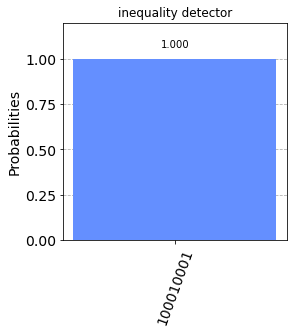

In [28]:
counts = {'100010001': 1.0}
plot_histogram(counts, figsize=(4, 4),title="inequality detector")

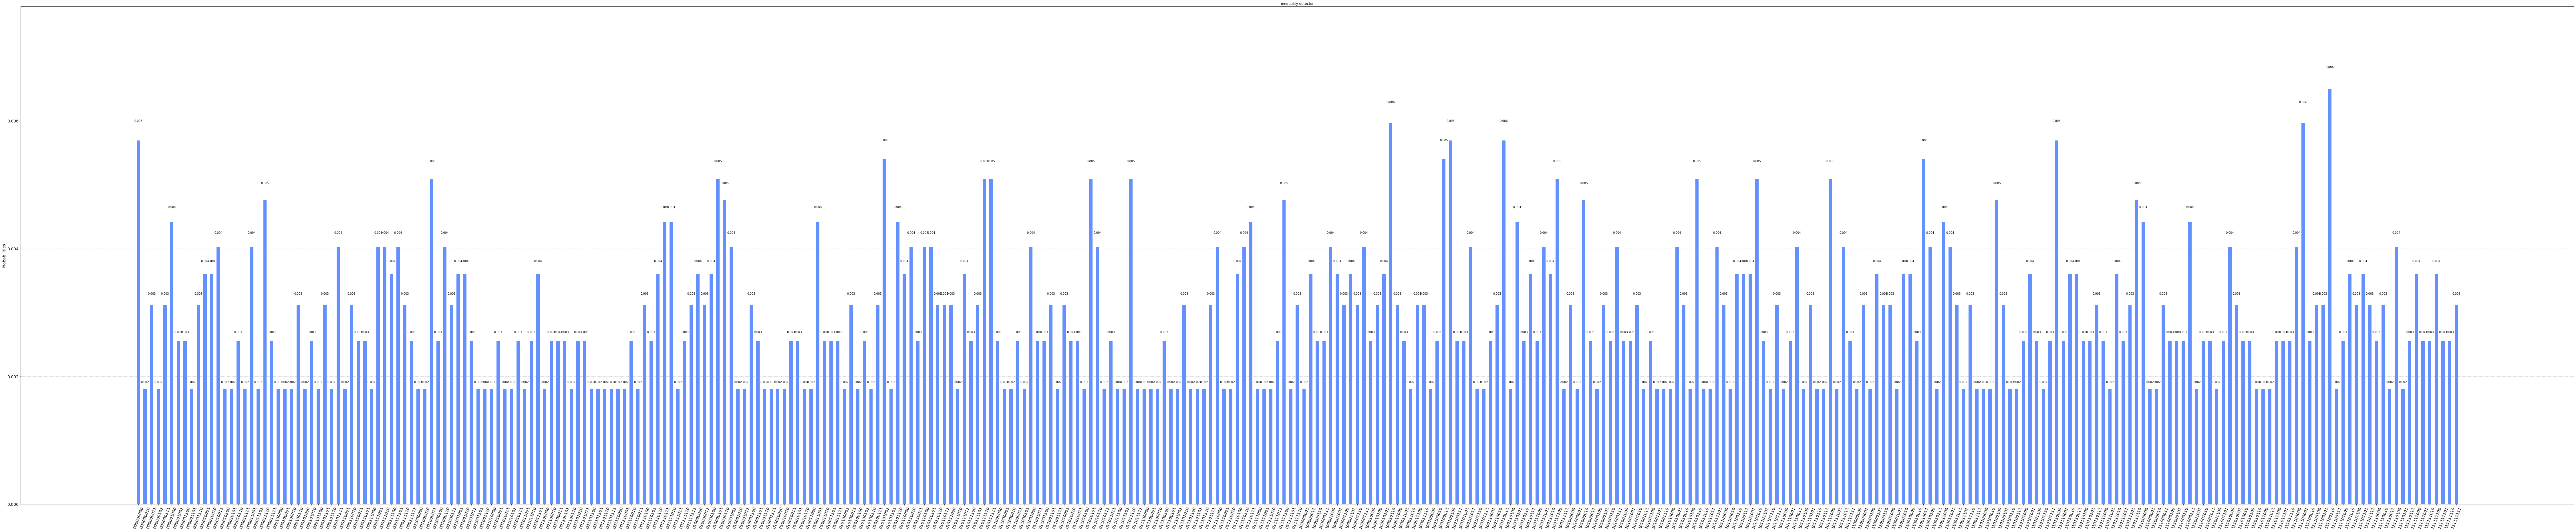

In [32]:
counts = {'000000000': 0.1, '000000010': 0.03162277660168379, '000000011': 0.05477225575051661, '000000101': 0.03162277660168379, '000000111': 0.05477225575051661, '000001000': 0.07745966692414834, '000001001': 0.044721359549995794, '000001100': 0.044721359549995794, '000001101': 0.03162277660168379, '000001110': 0.05477225575051661, '000010001': 0.06324555320336758, '000010010': 0.06324555320336758, '000010011': 0.07071067811865475, '000010100': 0.03162277660168379, '000010101': 0.03162277660168379, '000010110': 0.044721359549995794, '000010111': 0.03162277660168379, '000011001': 0.07071067811865475, '000011101': 0.03162277660168379, '000011110': 0.08366600265340755, '000011111': 0.044721359549995794, '000100000': 0.03162277660168379, '000100001': 0.03162277660168379, '000100010': 0.03162277660168379, '000100110': 0.05477225575051661, '000101000': 0.03162277660168379, '000101010': 0.044721359549995794, '000101100': 0.03162277660168379, '000101101': 0.05477225575051661, '000101110': 0.03162277660168379, '000101111': 0.07071067811865475, '000110001': 0.03162277660168379, '000110010': 0.05477225575051661, '000110011': 0.044721359549995794, '000110101': 0.044721359549995794, '000111000': 0.03162277660168379, '000111001': 0.07071067811865475, '000111010': 0.07071067811865475, '000111100': 0.06324555320336758, '000111101': 0.07071067811865475, '000111110': 0.05477225575051661, '000111111': 0.044721359549995794, '001000000': 0.03162277660168379, '001000010': 0.03162277660168379, '001000011': 0.08944271909999159, '001000100': 0.044721359549995794, '001000110': 0.07071067811865475, '001000111': 0.05477225575051661, '001001001': 0.06324555320336758, '001001010': 0.06324555320336758, '001001011': 0.044721359549995794, '001001101': 0.03162277660168379, '001001110': 0.03162277660168379, '001010000': 0.03162277660168379, '001010001': 0.044721359549995794, '001010011': 0.03162277660168379, '001010101': 0.03162277660168379, '001010111': 0.044721359549995794, '001011001': 0.03162277660168379, '001011010': 0.044721359549995794, '001011101': 0.06324555320336758, '001100000': 0.03162277660168379, '001100010': 0.044721359549995794, '001100011': 0.044721359549995794, '001100101': 0.044721359549995794, '001100110': 0.03162277660168379, '001101010': 0.044721359549995794, '001101011': 0.044721359549995794, '001101100': 0.03162277660168379, '001101101': 0.03162277660168379, '001101110': 0.03162277660168379, '001101111': 0.03162277660168379, '001110000': 0.03162277660168379, '001110001': 0.03162277660168379, '001110010': 0.044721359549995794, '001110011': 0.03162277660168379, '001110100': 0.05477225575051661, '001110101': 0.044721359549995794, '001110110': 0.06324555320336758, '001110111': 0.07745966692414834, '001111010': 0.07745966692414834, '001111011': 0.03162277660168379, '001111110': 0.044721359549995794, '001111111': 0.05477225575051661, '010000000': 0.06324555320336758, '010000011': 0.05477225575051661, '010000100': 0.06324555320336758, '010000101': 0.08944271909999159, '010000110': 0.08366600265340755, '010001001': 0.07071067811865475, '010001010': 0.03162277660168379, '010001011': 0.03162277660168379, '010001100': 0.05477225575051661, '010001101': 0.044721359549995794, '010001110': 0.03162277660168379, '010001111': 0.03162277660168379, '010010000': 0.03162277660168379, '010010010': 0.03162277660168379, '010010011': 0.044721359549995794, '010010101': 0.044721359549995794, '010010110': 0.03162277660168379, '010011000': 0.03162277660168379, '010011001': 0.07745966692414834, '010011010': 0.044721359549995794, '010011101': 0.044721359549995794, '010011111': 0.044721359549995794, '010100001': 0.03162277660168379, '010100011': 0.05477225575051661, '010100100': 0.03162277660168379, '010100101': 0.044721359549995794, '010100110': 0.03162277660168379, '010100111': 0.05477225575051661, '010101001': 0.09486832980505137, '010101101': 0.03162277660168379, '010101110': 0.07745966692414834, '010110000': 0.06324555320336758, '010110010': 0.07071067811865475, '010110011': 0.044721359549995794, '010110100': 0.07071067811865475, '010110101': 0.07071067811865475, '010110110': 0.05477225575051661, '010110111': 0.05477225575051661, '010111000': 0.05477225575051661, '010111010': 0.03162277660168379, '010111011': 0.06324555320336758, '010111100': 0.044721359549995794, '010111101': 0.05477225575051661, '010111110': 0.08944271909999159, '010111111': 0.08944271909999159, '011000000': 0.044721359549995794, '011000001': 0.03162277660168379, '011000010': 0.03162277660168379, '011000011': 0.044721359549995794, '011000101': 0.03162277660168379, '011001000': 0.07071067811865475, '011001011': 0.044721359549995794, '011001100': 0.044721359549995794, '011001101': 0.05477225575051661, '011001111': 0.03162277660168379, '011010001': 0.05477225575051661, '011010010': 0.044721359549995794, '011010011': 0.044721359549995794, '011010100': 0.03162277660168379, '011010101': 0.08944271909999159, '011010110': 0.07071067811865475, '011010111': 0.03162277660168379, '011011011': 0.044721359549995794, '011011100': 0.03162277660168379, '011011101': 0.03162277660168379, '011011110': 0.08944271909999159, '011011111': 0.03162277660168379, '011100000': 0.03162277660168379, '011100001': 0.03162277660168379, '011100010': 0.03162277660168379, '011100100': 0.044721359549995794, '011100101': 0.03162277660168379, '011101001': 0.03162277660168379, '011101010': 0.05477225575051661, '011101100': 0.03162277660168379, '011101101': 0.03162277660168379, '011101110': 0.03162277660168379, '011101111': 0.05477225575051661, '011110000': 0.07071067811865475, '011110001': 0.03162277660168379, '011110010': 0.03162277660168379, '011110100': 0.06324555320336758, '011110110': 0.07071067811865475, '011110111': 0.07745966692414834, '011111000': 0.03162277660168379, '011111001': 0.03162277660168379, '011111010': 0.03162277660168379, '011111011': 0.044721359549995794, '011111100': 0.08366600265340755, '011111101': 0.03162277660168379, '011111110': 0.05477225575051661, '100000001': 0.03162277660168379, '100000011': 0.06324555320336758, '100000110': 0.044721359549995794, '100000111': 0.044721359549995794, '100001000': 0.07071067811865475, '100001001': 0.06324555320336758, '100001100': 0.05477225575051661, '100001101': 0.06324555320336758, '100001110': 0.05477225575051661, '100001111': 0.07071067811865475, '100010000': 0.044721359549995794, '100010100': 0.05477225575051661, '100010101': 0.06324555320336758, '100010110': 0.10488088481701516, '100011000': 0.05477225575051661, '100011001': 0.044721359549995794, '100011010': 0.03162277660168379, '100011100': 0.05477225575051661, '100011110': 0.05477225575051661, '100100000': 0.03162277660168379, '100100010': 0.044721359549995794, '100100011': 0.09486832980505137, '100100100': 0.1, '100100111': 0.044721359549995794, '100101001': 0.044721359549995794, '100101011': 0.07071067811865475, '100101110': 0.03162277660168379, '100101111': 0.03162277660168379, '100110001': 0.044721359549995794, '100110010': 0.05477225575051661, '100110011': 0.1, '100110100': 0.03162277660168379, '100110101': 0.07745966692414834, '100110110': 0.044721359549995794, '100110111': 0.06324555320336758, '100111000': 0.044721359549995794, '100111001': 0.07071067811865475, '100111010': 0.06324555320336758, '100111100': 0.08944271909999159, '100111111': 0.03162277660168379, '101000000': 0.05477225575051661, '101000001': 0.03162277660168379, '101000010': 0.08366600265340755, '101000011': 0.044721359549995794, '101000100': 0.03162277660168379, '101000101': 0.05477225575051661, '101000110': 0.044721359549995794, '101000111': 0.07071067811865475, '101001000': 0.044721359549995794, '101001001': 0.044721359549995794, '101001010': 0.05477225575051661, '101001011': 0.03162277660168379, '101001100': 0.044721359549995794, '101001101': 0.03162277660168379, '101001110': 0.03162277660168379, '101010000': 0.03162277660168379, '101010001': 0.07071067811865475, '101010010': 0.05477225575051661, '101010100': 0.03162277660168379, '101010110': 0.08944271909999159, '101011010': 0.03162277660168379, '101011011': 0.03162277660168379, '101011101': 0.07071067811865475, '101100000': 0.05477225575051661, '101100010': 0.03162277660168379, '101100110': 0.06324555320336758, '101100111': 0.06324555320336758, '101101001': 0.06324555320336758, '101101010': 0.08944271909999159, '101101101': 0.044721359549995794, '101101110': 0.03162277660168379, '101101111': 0.05477225575051661, '101110000': 0.03162277660168379, '101110001': 0.044721359549995794, '101110011': 0.07071067811865475, '101110100': 0.03162277660168379, '101110101': 0.05477225575051661, '101110110': 0.03162277660168379, '101110111': 0.03162277660168379, '101111000': 0.08944271909999159, '101111001': 0.03162277660168379, '101111011': 0.07071067811865475, '101111111': 0.044721359549995794, '110000000': 0.03162277660168379, '110000001': 0.05477225575051661, '110000100': 0.03162277660168379, '110000101': 0.06324555320336758, '110000110': 0.05477225575051661, '110001000': 0.05477225575051661, '110001001': 0.03162277660168379, '110001010': 0.06324555320336758, '110010000': 0.06324555320336758, '110010010': 0.044721359549995794, '110010011': 0.09486832980505137, '110010100': 0.07071067811865475, '110010111': 0.03162277660168379, '110011000': 0.07745966692414834, '110011001': 0.07071067811865475, '110011011': 0.05477225575051661, '110011101': 0.03162277660168379, '110011110': 0.05477225575051661, '110011111': 0.03162277660168379, '110100000': 0.03162277660168379, '110100010': 0.03162277660168379, '110100100': 0.08366600265340755, '110100101': 0.05477225575051661, '110100110': 0.03162277660168379, '110100111': 0.03162277660168379, '110101000': 0.044721359549995794, '110101001': 0.06324555320336758, '110101100': 0.044721359549995794, '110101110': 0.03162277660168379, '110101111': 0.044721359549995794, '110110000': 0.1, '110110001': 0.044721359549995794, '110110010': 0.06324555320336758, '110110011': 0.06324555320336758, '110110100': 0.044721359549995794, '110110101': 0.044721359549995794, '110110111': 0.05477225575051661, '110111000': 0.044721359549995794, '110111001': 0.03162277660168379, '110111010': 0.06324555320336758, '110111011': 0.044721359549995794, '110111101': 0.05477225575051661, '110111110': 0.08366600265340755, '111000000': 0.07745966692414834, '111000001': 0.03162277660168379, '111000010': 0.03162277660168379, '111000011': 0.05477225575051661, '111000100': 0.044721359549995794, '111000101': 0.044721359549995794, '111000110': 0.044721359549995794, '111000111': 0.07745966692414834, '111001001': 0.03162277660168379, '111001010': 0.044721359549995794, '111001011': 0.044721359549995794, '111001100': 0.03162277660168379, '111001101': 0.044721359549995794, '111010000': 0.07071067811865475, '111010001': 0.05477225575051661, '111010010': 0.044721359549995794, '111010100': 0.044721359549995794, '111010110': 0.03162277660168379, '111011000': 0.03162277660168379, '111011011': 0.03162277660168379, '111011100': 0.044721359549995794, '111011101': 0.044721359549995794, '111011110': 0.044721359549995794, '111100000': 0.07071067811865475, '111100001': 0.10488088481701516, '111100010': 0.044721359549995794, '111100100': 0.05477225575051661, '111100101': 0.05477225575051661, '111100110': 0.11401754250991379, '111100111': 0.03162277660168379, '111101000': 0.044721359549995794, '111101010': 0.06324555320336758, '111101100': 0.05477225575051661, '111101101': 0.06324555320336758, '111101111': 0.05477225575051661, '111110000': 0.044721359549995794, '111110010': 0.05477225575051661, '111110011': 0.03162277660168379, '111110100': 0.07071067811865475, '111110101': 0.03162277660168379, '111110111': 0.044721359549995794, '111111000': 0.06324555320336758, '111111001': 0.044721359549995794, '111111010': 0.044721359549995794, '111111100': 0.06324555320336758, '111111101': 0.044721359549995794, '111111110': 0.044721359549995794, '111111111': 0.05477225575051661}
plot_histogram(counts, figsize=(160, 32))

p= 1 it 2000

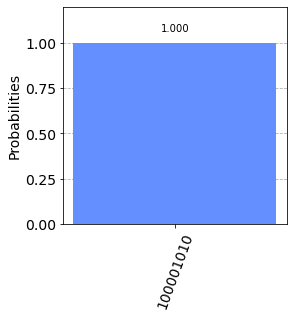

In [34]:
counts = {'100001010': 1.0}
plot_histogram(counts, figsize=(4, 4))

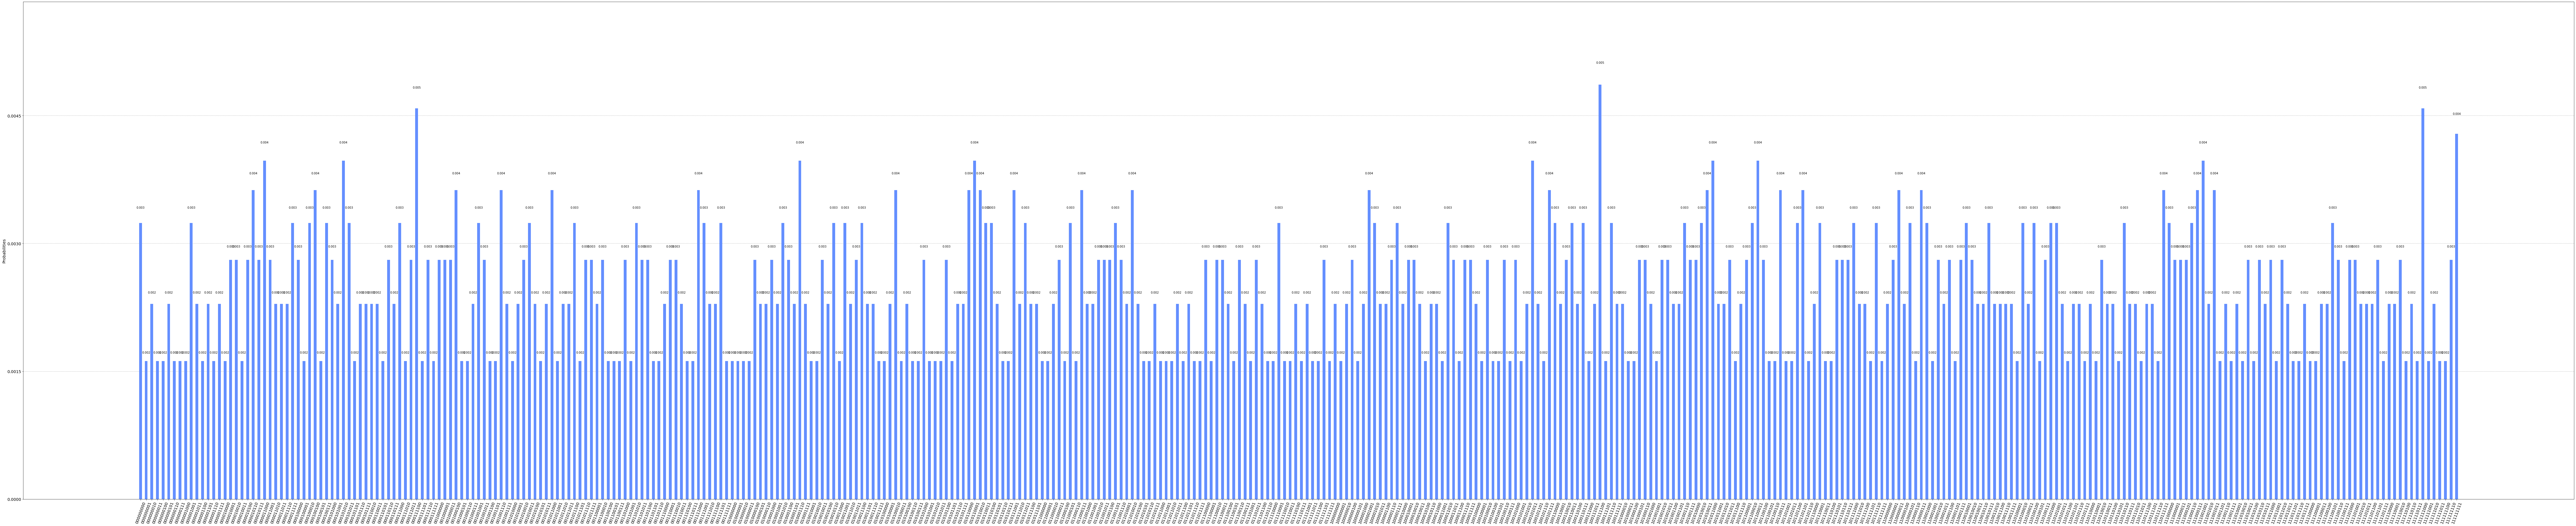

In [36]:
counts =  {'000000000': 0.06324555320336758, '000000001': 0.03162277660168379, '000000010': 0.044721359549995794, '000000011': 0.03162277660168379, '000000100': 0.03162277660168379, '000000101': 0.044721359549995794, '000000110': 0.03162277660168379, '000000111': 0.03162277660168379, '000001000': 0.03162277660168379, '000001001': 0.06324555320336758, '000001011': 0.044721359549995794, '000001100': 0.03162277660168379, '000001101': 0.044721359549995794, '000001110': 0.03162277660168379, '000001111': 0.044721359549995794, '000010000': 0.03162277660168379, '000010001': 0.05477225575051661, '000010010': 0.05477225575051661, '000010011': 0.03162277660168379, '000010100': 0.05477225575051661, '000010110': 0.07071067811865475, '000010111': 0.05477225575051661, '000011000': 0.07745966692414834, '000011001': 0.05477225575051661, '000011010': 0.044721359549995794, '000011011': 0.044721359549995794, '000011110': 0.044721359549995794, '000011111': 0.06324555320336758, '000100000': 0.05477225575051661, '000100001': 0.03162277660168379, '000100010': 0.06324555320336758, '000100100': 0.07071067811865475, '000100101': 0.03162277660168379, '000100111': 0.06324555320336758, '000101000': 0.05477225575051661, '000101001': 0.044721359549995794, '000101010': 0.07745966692414834, '000101011': 0.06324555320336758, '000101101': 0.03162277660168379, '000101110': 0.044721359549995794, '000101111': 0.044721359549995794, '000110010': 0.044721359549995794, '000110011': 0.044721359549995794, '000110101': 0.03162277660168379, '000110110': 0.05477225575051661, '000110111': 0.044721359549995794, '000111000': 0.06324555320336758, '000111010': 0.03162277660168379, '000111011': 0.05477225575051661, '000111100': 0.08944271909999159, '000111101': 0.03162277660168379, '000111110': 0.05477225575051661, '000111111': 0.03162277660168379, '001000000': 0.05477225575051661, '001000001': 0.05477225575051661, '001000011': 0.05477225575051661, '001000100': 0.07071067811865475, '001000101': 0.03162277660168379, '001000110': 0.03162277660168379, '001000111': 0.044721359549995794, '001001001': 0.06324555320336758, '001001011': 0.05477225575051661, '001001100': 0.03162277660168379, '001001101': 0.03162277660168379, '001001110': 0.07071067811865475, '001001111': 0.044721359549995794, '001010000': 0.03162277660168379, '001010001': 0.044721359549995794, '001010010': 0.05477225575051661, '001010011': 0.06324555320336758, '001010100': 0.044721359549995794, '001010101': 0.03162277660168379, '001010111': 0.044721359549995794, '001011000': 0.07071067811865475, '001011001': 0.03162277660168379, '001011010': 0.044721359549995794, '001011011': 0.044721359549995794, '001011100': 0.06324555320336758, '001011101': 0.03162277660168379, '001011110': 0.05477225575051661, '001011111': 0.05477225575051661, '001100001': 0.044721359549995794, '001100010': 0.05477225575051661, '001100100': 0.03162277660168379, '001100101': 0.03162277660168379, '001100111': 0.03162277660168379, '001101000': 0.05477225575051661, '001101001': 0.03162277660168379, '001101010': 0.06324555320336758, '001101011': 0.05477225575051661, '001101100': 0.05477225575051661, '001101101': 0.03162277660168379, '001101110': 0.03162277660168379, '001110000': 0.044721359549995794, '001110001': 0.05477225575051661, '001110010': 0.05477225575051661, '001110011': 0.044721359549995794, '001110100': 0.03162277660168379, '001110111': 0.03162277660168379, '001111000': 0.07071067811865475, '001111001': 0.06324555320336758, '001111010': 0.044721359549995794, '001111100': 0.044721359549995794, '001111101': 0.06324555320336758, '001111111': 0.03162277660168379, '010000000': 0.03162277660168379, '010000001': 0.03162277660168379, '010000010': 0.03162277660168379, '010000011': 0.03162277660168379, '010000100': 0.05477225575051661, '010000101': 0.044721359549995794, '010000110': 0.044721359549995794, '010001000': 0.05477225575051661, '010001001': 0.044721359549995794, '010001010': 0.06324555320336758, '010001100': 0.05477225575051661, '010001101': 0.044721359549995794, '010001110': 0.07745966692414834, '010001111': 0.044721359549995794, '010010001': 0.03162277660168379, '010010010': 0.03162277660168379, '010010011': 0.05477225575051661, '010010100': 0.044721359549995794, '010010110': 0.06324555320336758, '010011000': 0.03162277660168379, '010011001': 0.06324555320336758, '010011010': 0.044721359549995794, '010011011': 0.05477225575051661, '010011100': 0.06324555320336758, '010011101': 0.044721359549995794, '010011110': 0.044721359549995794, '010011111': 0.03162277660168379, '010100000': 0.03162277660168379, '010100001': 0.044721359549995794, '010100010': 0.07071067811865475, '010100011': 0.03162277660168379, '010100100': 0.044721359549995794, '010100110': 0.03162277660168379, '010100111': 0.03162277660168379, '010101000': 0.05477225575051661, '010101001': 0.03162277660168379, '010101010': 0.03162277660168379, '010101011': 0.03162277660168379, '010101100': 0.05477225575051661, '010101101': 0.03162277660168379, '010101110': 0.044721359549995794, '010101111': 0.044721359549995794, '010110000': 0.07071067811865475, '010110001': 0.07745966692414834, '010110010': 0.07071067811865475, '010110011': 0.06324555320336758, '010110100': 0.06324555320336758, '010110101': 0.044721359549995794, '010110110': 0.03162277660168379, '010110111': 0.03162277660168379, '010111001': 0.07071067811865475, '010111010': 0.044721359549995794, '010111011': 0.06324555320336758, '010111100': 0.044721359549995794, '010111101': 0.044721359549995794, '011000000': 0.03162277660168379, '011000001': 0.03162277660168379, '011000010': 0.044721359549995794, '011000011': 0.05477225575051661, '011000100': 0.03162277660168379, '011000101': 0.06324555320336758, '011000110': 0.03162277660168379, '011000111': 0.07071067811865475, '011001000': 0.044721359549995794, '011001001': 0.044721359549995794, '011001010': 0.05477225575051661, '011001011': 0.05477225575051661, '011001100': 0.05477225575051661, '011001101': 0.06324555320336758, '011001110': 0.05477225575051661, '011010001': 0.044721359549995794, '011010010': 0.07071067811865475, '011010100': 0.044721359549995794, '011010101': 0.03162277660168379, '011010110': 0.03162277660168379, '011010111': 0.044721359549995794, '011011000': 0.03162277660168379, '011011001': 0.03162277660168379, '011011010': 0.03162277660168379, '011011011': 0.044721359549995794, '011011100': 0.03162277660168379, '011011101': 0.044721359549995794, '011011110': 0.03162277660168379, '011011111': 0.03162277660168379, '011100000': 0.05477225575051661, '011100001': 0.03162277660168379, '011100010': 0.05477225575051661, '011100011': 0.05477225575051661, '011100100': 0.044721359549995794, '011100101': 0.03162277660168379, '011100110': 0.05477225575051661, '011100111': 0.044721359549995794, '011101001': 0.03162277660168379, '011101011': 0.05477225575051661, '011101100': 0.044721359549995794, '011101110': 0.03162277660168379, '011110000': 0.03162277660168379, '011110001': 0.06324555320336758, '011110010': 0.03162277660168379, '011110011': 0.03162277660168379, '011110100': 0.044721359549995794, '011110111': 0.03162277660168379, '011111001': 0.044721359549995794, '011111011': 0.03162277660168379, '011111100': 0.03162277660168379, '011111101': 0.05477225575051661, '011111111': 0.03162277660168379, '100000000': 0.044721359549995794, '100000001': 0.03162277660168379, '100000010': 0.044721359549995794, '100000100': 0.05477225575051661, '100000101': 0.03162277660168379, '100001000': 0.044721359549995794, '100001001': 0.07071067811865475, '100001010': 0.06324555320336758, '100001011': 0.044721359549995794, '100001100': 0.044721359549995794, '100001110': 0.05477225575051661, '100001111': 0.06324555320336758, '100010000': 0.044721359549995794, '100010001': 0.05477225575051661, '100010010': 0.05477225575051661, '100010011': 0.044721359549995794, '100010100': 0.03162277660168379, '100010110': 0.044721359549995794, '100011000': 0.044721359549995794, '100011001': 0.03162277660168379, '100011010': 0.06324555320336758, '100011011': 0.05477225575051661, '100011100': 0.03162277660168379, '100011110': 0.05477225575051661, '100011111': 0.05477225575051661, '100100000': 0.044721359549995794, '100100001': 0.03162277660168379, '100100010': 0.05477225575051661, '100100100': 0.03162277660168379, '100100101': 0.03162277660168379, '100100110': 0.05477225575051661, '100100111': 0.03162277660168379, '100101000': 0.05477225575051661, '100101001': 0.03162277660168379, '100101010': 0.044721359549995794, '100101011': 0.07745966692414834, '100101101': 0.044721359549995794, '100101110': 0.03162277660168379, '100101111': 0.07071067811865475, '100110000': 0.06324555320336758, '100110001': 0.044721359549995794, '100110010': 0.05477225575051661, '100110011': 0.06324555320336758, '100110100': 0.044721359549995794, '100110111': 0.06324555320336758, '100111000': 0.03162277660168379, '100111011': 0.044721359549995794, '100111100': 0.09486832980505137, '100111101': 0.03162277660168379, '100111110': 0.06324555320336758, '100111111': 0.044721359549995794, '101000010': 0.044721359549995794, '101000011': 0.03162277660168379, '101000100': 0.03162277660168379, '101000101': 0.05477225575051661, '101000110': 0.05477225575051661, '101001000': 0.044721359549995794, '101001001': 0.03162277660168379, '101001010': 0.05477225575051661, '101001011': 0.05477225575051661, '101001100': 0.044721359549995794, '101001101': 0.044721359549995794, '101001110': 0.06324555320336758, '101001111': 0.05477225575051661, '101010000': 0.05477225575051661, '101010010': 0.06324555320336758, '101010011': 0.07071067811865475, '101011000': 0.07745966692414834, '101011001': 0.044721359549995794, '101011010': 0.044721359549995794, '101011011': 0.05477225575051661, '101011100': 0.03162277660168379, '101011110': 0.044721359549995794, '101100001': 0.05477225575051661, '101100010': 0.06324555320336758, '101100011': 0.07745966692414834, '101100100': 0.05477225575051661, '101100101': 0.03162277660168379, '101100110': 0.03162277660168379, '101100111': 0.07071067811865475, '101101001': 0.03162277660168379, '101101011': 0.03162277660168379, '101101100': 0.06324555320336758, '101101101': 0.07071067811865475, '101101110': 0.03162277660168379, '101110000': 0.044721359549995794, '101110001': 0.06324555320336758, '101110011': 0.03162277660168379, '101110100': 0.03162277660168379, '101110101': 0.05477225575051661, '101110110': 0.05477225575051661, '101110111': 0.05477225575051661, '101111000': 0.06324555320336758, '101111010': 0.044721359549995794, '101111100': 0.044721359549995794, '101111101': 0.03162277660168379, '101111110': 0.06324555320336758, '101111111': 0.03162277660168379, '110000000': 0.044721359549995794, '110000001': 0.05477225575051661, '110000011': 0.07071067811865475, '110000100': 0.044721359549995794, '110000101': 0.06324555320336758, '110000110': 0.03162277660168379, '110000111': 0.07071067811865475, '110001000': 0.06324555320336758, '110001001': 0.03162277660168379, '110001010': 0.05477225575051661, '110001011': 0.044721359549995794, '110001100': 0.05477225575051661, '110001101': 0.03162277660168379, '110001111': 0.05477225575051661, '110010001': 0.06324555320336758, '110010010': 0.05477225575051661, '110010011': 0.044721359549995794, '110010110': 0.044721359549995794, '110010111': 0.06324555320336758, '110011010': 0.044721359549995794, '110011100': 0.044721359549995794, '110011110': 0.044721359549995794, '110011111': 0.044721359549995794, '110100001': 0.03162277660168379, '110100010': 0.06324555320336758, '110100011': 0.044721359549995794, '110100100': 0.06324555320336758, '110100101': 0.03162277660168379, '110100111': 0.05477225575051661, '110101000': 0.06324555320336758, '110101001': 0.06324555320336758, '110101011': 0.044721359549995794, '110101100': 0.03162277660168379, '110101101': 0.044721359549995794, '110101110': 0.044721359549995794, '110101111': 0.03162277660168379, '110110000': 0.044721359549995794, '110110001': 0.03162277660168379, '110110010': 0.05477225575051661, '110110011': 0.044721359549995794, '110110100': 0.044721359549995794, '110110101': 0.03162277660168379, '110110110': 0.06324555320336758, '110110111': 0.044721359549995794, '110111010': 0.044721359549995794, '110111011': 0.03162277660168379, '110111100': 0.044721359549995794, '110111101': 0.044721359549995794, '110111110': 0.03162277660168379, '110111111': 0.07071067811865475, '111000000': 0.06324555320336758, '111000001': 0.05477225575051661, '111000011': 0.05477225575051661, '111000101': 0.05477225575051661, '111000110': 0.06324555320336758, '111000111': 0.07071067811865475, '111001001': 0.07745966692414834, '111001010': 0.044721359549995794, '111001011': 0.07071067811865475, '111001101': 0.03162277660168379, '111001110': 0.044721359549995794, '111001111': 0.03162277660168379, '111010001': 0.044721359549995794, '111010010': 0.03162277660168379, '111010011': 0.05477225575051661, '111010100': 0.03162277660168379, '111010110': 0.05477225575051661, '111010111': 0.044721359549995794, '111011000': 0.05477225575051661, '111011001': 0.03162277660168379, '111011010': 0.05477225575051661, '111011011': 0.044721359549995794, '111011101': 0.03162277660168379, '111011110': 0.03162277660168379, '111011111': 0.044721359549995794, '111100000': 0.03162277660168379, '111100001': 0.03162277660168379, '111100011': 0.044721359549995794, '111100100': 0.044721359549995794, '111100101': 0.06324555320336758, '111100110': 0.05477225575051661, '111100111': 0.03162277660168379, '111101000': 0.05477225575051661, '111101001': 0.05477225575051661, '111101010': 0.044721359549995794, '111101011': 0.044721359549995794, '111101100': 0.044721359549995794, '111101101': 0.05477225575051661, '111101111': 0.03162277660168379, '111110000': 0.044721359549995794, '111110001': 0.044721359549995794, '111110010': 0.05477225575051661, '111110100': 0.03162277660168379, '111110110': 0.044721359549995794, '111110111': 0.03162277660168379, '111111000': 0.08944271909999159, '111111001': 0.03162277660168379, '111111010': 0.044721359549995794, '111111011': 0.03162277660168379, '111111100': 0.03162277660168379, '111111110': 0.05477225575051661, '111111111': 0.08366600265340755}
plot_histogram(counts, figsize=(160, 32))

p=1 it 2500

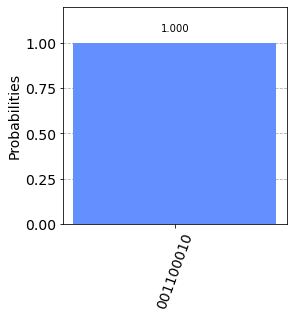

In [39]:
counts = {'001100010': 1.0}
plot_histogram(counts, figsize=(4, 4))

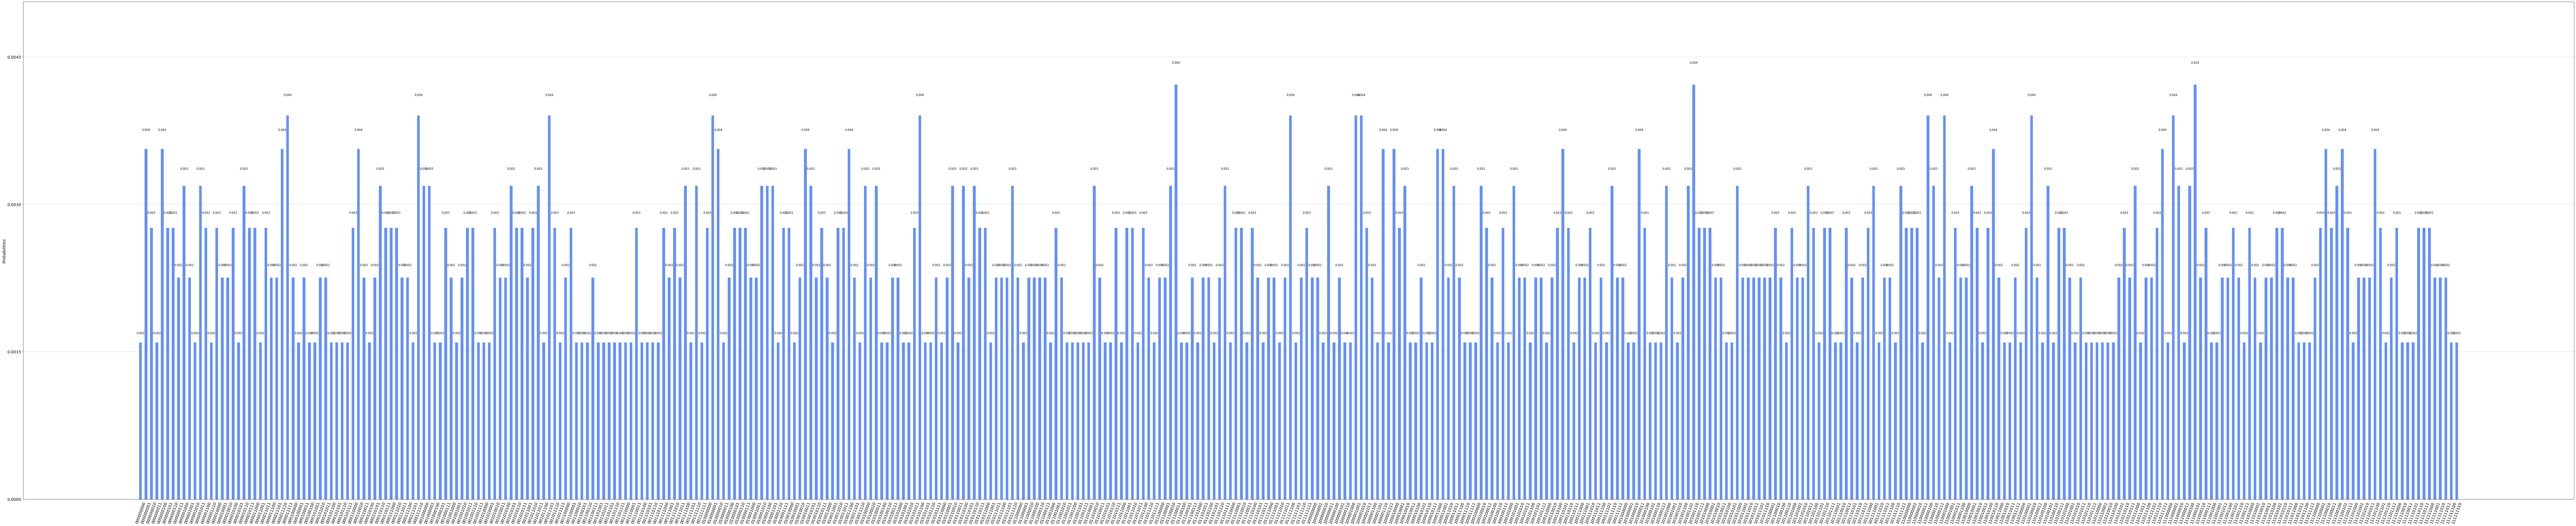

In [40]:
counts = {'000000000': 0.03162277660168379, '000000001': 0.07071067811865475, '000000010': 0.05477225575051661, '000000011': 0.03162277660168379, '000000100': 0.07071067811865475, '000000101': 0.05477225575051661, '000000110': 0.05477225575051661, '000000111': 0.044721359549995794, '000001000': 0.06324555320336758, '000001001': 0.044721359549995794, '000001010': 0.03162277660168379, '000001011': 0.06324555320336758, '000001100': 0.05477225575051661, '000001110': 0.03162277660168379, '000010000': 0.05477225575051661, '000010001': 0.044721359549995794, '000010010': 0.044721359549995794, '000010100': 0.05477225575051661, '000010101': 0.03162277660168379, '000010110': 0.06324555320336758, '000010111': 0.05477225575051661, '000011000': 0.05477225575051661, '000011001': 0.03162277660168379, '000011011': 0.05477225575051661, '000011100': 0.044721359549995794, '000011101': 0.044721359549995794, '000011110': 0.07071067811865475, '000011111': 0.07745966692414834, '000100000': 0.044721359549995794, '000100001': 0.03162277660168379, '000100011': 0.044721359549995794, '000100100': 0.03162277660168379, '000101001': 0.03162277660168379, '000101010': 0.044721359549995794, '000101011': 0.044721359549995794, '000101100': 0.03162277660168379, '000101101': 0.03162277660168379, '000101110': 0.03162277660168379, '000101111': 0.03162277660168379, '000110000': 0.05477225575051661, '000110010': 0.07071067811865475, '000110011': 0.044721359549995794, '000110100': 0.03162277660168379, '000110101': 0.044721359549995794, '000110110': 0.06324555320336758, '000110111': 0.05477225575051661, '000111000': 0.05477225575051661, '000111010': 0.05477225575051661, '000111011': 0.044721359549995794, '000111100': 0.044721359549995794, '000111101': 0.03162277660168379, '000111110': 0.07745966692414834, '001000000': 0.06324555320336758, '001000001': 0.06324555320336758, '001000100': 0.03162277660168379, '001000101': 0.03162277660168379, '001000111': 0.05477225575051661, '001001000': 0.044721359549995794, '001001001': 0.03162277660168379, '001001010': 0.044721359549995794, '001001011': 0.05477225575051661, '001001110': 0.05477225575051661, '001001111': 0.03162277660168379, '001010000': 0.03162277660168379, '001010001': 0.03162277660168379, '001010010': 0.05477225575051661, '001010011': 0.044721359549995794, '001010100': 0.044721359549995794, '001010101': 0.06324555320336758, '001010110': 0.05477225575051661, '001010111': 0.05477225575051661, '001011001': 0.044721359549995794, '001011010': 0.05477225575051661, '001011011': 0.06324555320336758, '001011100': 0.03162277660168379, '001011101': 0.07745966692414834, '001011110': 0.05477225575051661, '001011111': 0.03162277660168379, '001100000': 0.044721359549995794, '001100001': 0.05477225575051661, '001100010': 0.03162277660168379, '001100101': 0.03162277660168379, '001100110': 0.03162277660168379, '001100111': 0.044721359549995794, '001101001': 0.03162277660168379, '001101011': 0.03162277660168379, '001101101': 0.03162277660168379, '001101110': 0.03162277660168379, '001101111': 0.03162277660168379, '001110000': 0.03162277660168379, '001110001': 0.03162277660168379, '001110011': 0.05477225575051661, '001110100': 0.03162277660168379, '001110101': 0.03162277660168379, '001110110': 0.03162277660168379, '001110111': 0.03162277660168379, '001111000': 0.05477225575051661, '001111001': 0.044721359549995794, '001111010': 0.05477225575051661, '001111011': 0.044721359549995794, '001111100': 0.06324555320336758, '001111101': 0.03162277660168379, '001111110': 0.06324555320336758, '001111111': 0.03162277660168379, '010000000': 0.05477225575051661, '010000001': 0.07745966692414834, '010000010': 0.07071067811865475, '010000011': 0.03162277660168379, '010000100': 0.044721359549995794, '010000101': 0.05477225575051661, '010000110': 0.05477225575051661, '010000111': 0.05477225575051661, '010001000': 0.044721359549995794, '010001001': 0.044721359549995794, '010001010': 0.06324555320336758, '010001100': 0.06324555320336758, '010001101': 0.06324555320336758, '010001110': 0.03162277660168379, '010001111': 0.05477225575051661, '010010000': 0.05477225575051661, '010010001': 0.03162277660168379, '010010010': 0.044721359549995794, '010010011': 0.07071067811865475, '010010101': 0.06324555320336758, '010010110': 0.044721359549995794, '010010111': 0.05477225575051661, '010011000': 0.044721359549995794, '010011001': 0.03162277660168379, '010011010': 0.05477225575051661, '010011011': 0.05477225575051661, '010011100': 0.07071067811865475, '010011101': 0.044721359549995794, '010011110': 0.03162277660168379, '010100000': 0.06324555320336758, '010100010': 0.044721359549995794, '010100011': 0.06324555320336758, '010100100': 0.03162277660168379, '010100110': 0.03162277660168379, '010100111': 0.044721359549995794, '010101000': 0.044721359549995794, '010101001': 0.03162277660168379, '010101010': 0.03162277660168379, '010101011': 0.05477225575051661, '010101100': 0.07745966692414834, '010101101': 0.03162277660168379, '010101110': 0.03162277660168379, '010101111': 0.044721359549995794, '010110000': 0.03162277660168379, '010110001': 0.044721359549995794, '010110010': 0.06324555320336758, '010110011': 0.03162277660168379, '010110100': 0.06324555320336758, '010110101': 0.044721359549995794, '010110110': 0.06324555320336758, '010110111': 0.05477225575051661, '010111000': 0.05477225575051661, '010111001': 0.03162277660168379, '010111011': 0.044721359549995794, '010111100': 0.044721359549995794, '010111101': 0.044721359549995794, '010111110': 0.06324555320336758, '011000000': 0.044721359549995794, '011000001': 0.03162277660168379, '011000010': 0.044721359549995794, '011000100': 0.044721359549995794, '011000110': 0.044721359549995794, '011000111': 0.044721359549995794, '011001000': 0.03162277660168379, '011001001': 0.05477225575051661, '011001010': 0.044721359549995794, '011001011': 0.03162277660168379, '011001100': 0.03162277660168379, '011001101': 0.03162277660168379, '011001111': 0.03162277660168379, '011010001': 0.03162277660168379, '011010010': 0.06324555320336758, '011010011': 0.044721359549995794, '011010101': 0.03162277660168379, '011010110': 0.03162277660168379, '011010111': 0.05477225575051661, '011011000': 0.03162277660168379, '011011001': 0.05477225575051661, '011011010': 0.05477225575051661, '011011011': 0.03162277660168379, '011011100': 0.05477225575051661, '011011110': 0.044721359549995794, '011011111': 0.03162277660168379, '011100000': 0.044721359549995794, '011100001': 0.044721359549995794, '011100010': 0.06324555320336758, '011100011': 0.08366600265340755, '011100100': 0.03162277660168379, '011100101': 0.03162277660168379, '011100111': 0.044721359549995794, '011101000': 0.03162277660168379, '011101011': 0.044721359549995794, '011101100': 0.044721359549995794, '011101101': 0.03162277660168379, '011101110': 0.044721359549995794, '011101111': 0.06324555320336758, '011110000': 0.03162277660168379, '011110001': 0.05477225575051661, '011110010': 0.05477225575051661, '011110011': 0.03162277660168379, '011110100': 0.05477225575051661, '011110101': 0.044721359549995794, '011110111': 0.03162277660168379, '011111000': 0.044721359549995794, '011111001': 0.044721359549995794, '011111010': 0.03162277660168379, '011111011': 0.044721359549995794, '011111100': 0.07745966692414834, '011111101': 0.03162277660168379, '011111110': 0.044721359549995794, '011111111': 0.05477225575051661, '100000000': 0.044721359549995794, '100000001': 0.044721359549995794, '100000010': 0.03162277660168379, '100000011': 0.06324555320336758, '100000100': 0.03162277660168379, '100000101': 0.044721359549995794, '100000110': 0.03162277660168379, '100001000': 0.03162277660168379, '100001001': 0.07745966692414834, '100001010': 0.07745966692414834, '100001011': 0.05477225575051661, '100001100': 0.044721359549995794, '100001101': 0.03162277660168379, '100001110': 0.07071067811865475, '100001111': 0.03162277660168379, '100010000': 0.07071067811865475, '100010001': 0.05477225575051661, '100010010': 0.06324555320336758, '100010011': 0.03162277660168379, '100010100': 0.03162277660168379, '100010101': 0.044721359549995794, '100010110': 0.03162277660168379, '100010111': 0.03162277660168379, '100011000': 0.07071067811865475, '100011001': 0.07071067811865475, '100011010': 0.044721359549995794, '100011011': 0.06324555320336758, '100011100': 0.044721359549995794, '100011110': 0.03162277660168379, '100011111': 0.03162277660168379, '100100000': 0.03162277660168379, '100100010': 0.06324555320336758, '100100011': 0.05477225575051661, '100100100': 0.044721359549995794, '100100110': 0.03162277660168379, '100100111': 0.05477225575051661, '100101000': 0.03162277660168379, '100101001': 0.06324555320336758, '100101010': 0.044721359549995794, '100101011': 0.044721359549995794, '100101100': 0.03162277660168379, '100101101': 0.044721359549995794, '100101111': 0.044721359549995794, '100110000': 0.03162277660168379, '100110010': 0.044721359549995794, '100110100': 0.05477225575051661, '100110101': 0.07071067811865475, '100110110': 0.05477225575051661, '100110111': 0.03162277660168379, '100111000': 0.044721359549995794, '100111001': 0.044721359549995794, '100111010': 0.05477225575051661, '100111011': 0.03162277660168379, '100111100': 0.044721359549995794, '100111101': 0.03162277660168379, '100111110': 0.06324555320336758, '100111111': 0.044721359549995794, '101000000': 0.044721359549995794, '101000001': 0.03162277660168379, '101000010': 0.03162277660168379, '101000011': 0.07071067811865475, '101000100': 0.05477225575051661, '101000101': 0.03162277660168379, '101000110': 0.03162277660168379, '101000111': 0.03162277660168379, '101001000': 0.06324555320336758, '101001001': 0.044721359549995794, '101001010': 0.03162277660168379, '101001100': 0.044721359549995794, '101001101': 0.06324555320336758, '101001110': 0.08366600265340755, '101001111': 0.05477225575051661, '101010000': 0.05477225575051661, '101010001': 0.05477225575051661, '101010010': 0.044721359549995794, '101010011': 0.044721359549995794, '101010100': 0.03162277660168379, '101010101': 0.03162277660168379, '101011000': 0.06324555320336758, '101011001': 0.044721359549995794, '101011010': 0.044721359549995794, '101011011': 0.044721359549995794, '101011101': 0.044721359549995794, '101011110': 0.044721359549995794, '101100001': 0.044721359549995794, '101100010': 0.05477225575051661, '101100100': 0.044721359549995794, '101100110': 0.03162277660168379, '101101000': 0.05477225575051661, '101101001': 0.044721359549995794, '101101010': 0.044721359549995794, '101101011': 0.06324555320336758, '101101100': 0.05477225575051661, '101101101': 0.03162277660168379, '101101110': 0.05477225575051661, '101101111': 0.05477225575051661, '101110001': 0.03162277660168379, '101110010': 0.03162277660168379, '101110011': 0.05477225575051661, '101110101': 0.044721359549995794, '101110110': 0.03162277660168379, '101110111': 0.044721359549995794, '101111000': 0.05477225575051661, '101111001': 0.06324555320336758, '101111010': 0.03162277660168379, '101111011': 0.044721359549995794, '101111100': 0.044721359549995794, '101111110': 0.03162277660168379, '101111111': 0.06324555320336758, '110000000': 0.05477225575051661, '110000001': 0.05477225575051661, '110000010': 0.05477225575051661, '110000011': 0.03162277660168379, '110000100': 0.07745966692414834, '110000110': 0.06324555320336758, '110000111': 0.044721359549995794, '110001000': 0.07745966692414834, '110001001': 0.03162277660168379, '110001011': 0.05477225575051661, '110001100': 0.044721359549995794, '110010000': 0.044721359549995794, '110010001': 0.06324555320336758, '110010010': 0.05477225575051661, '110010011': 0.03162277660168379, '110010100': 0.05477225575051661, '110010110': 0.07071067811865475, '110011000': 0.044721359549995794, '110011010': 0.03162277660168379, '110011011': 0.03162277660168379, '110011111': 0.044721359549995794, '110100000': 0.03162277660168379, '110100001': 0.05477225575051661, '110100010': 0.07745966692414834, '110100011': 0.044721359549995794, '110100100': 0.03162277660168379, '110100101': 0.06324555320336758, '110100110': 0.03162277660168379, '110100111': 0.05477225575051661, '110101000': 0.05477225575051661, '110101001': 0.044721359549995794, '110101010': 0.03162277660168379, '110101011': 0.044721359549995794, '110101110': 0.03162277660168379, '110101111': 0.03162277660168379, '110110000': 0.03162277660168379, '110110001': 0.03162277660168379, '110110010': 0.03162277660168379, '110110100': 0.03162277660168379, '110110101': 0.044721359549995794, '110110110': 0.05477225575051661, '110110111': 0.044721359549995794, '110111000': 0.06324555320336758, '110111011': 0.03162277660168379, '110111100': 0.044721359549995794, '110111101': 0.044721359549995794, '110111110': 0.05477225575051661, '110111111': 0.07071067811865475, '111000000': 0.03162277660168379, '111000001': 0.07745966692414834, '111000010': 0.06324555320336758, '111000011': 0.03162277660168379, '111000100': 0.06324555320336758, '111000101': 0.08366600265340755, '111000110': 0.044721359549995794, '111000111': 0.05477225575051661, '111001000': 0.03162277660168379, '111001001': 0.03162277660168379, '111001011': 0.044721359549995794, '111001100': 0.044721359549995794, '111001101': 0.05477225575051661, '111001110': 0.044721359549995794, '111001111': 0.03162277660168379, '111010000': 0.05477225575051661, '111010001': 0.044721359549995794, '111010010': 0.03162277660168379, '111010011': 0.044721359549995794, '111010100': 0.044721359549995794, '111010101': 0.05477225575051661, '111010110': 0.05477225575051661, '111010111': 0.044721359549995794, '111011000': 0.044721359549995794, '111011011': 0.03162277660168379, '111011100': 0.03162277660168379, '111011111': 0.03162277660168379, '111100000': 0.044721359549995794, '111100001': 0.05477225575051661, '111100010': 0.07071067811865475, '111100011': 0.05477225575051661, '111100100': 0.06324555320336758, '111100101': 0.07071067811865475, '111100111': 0.05477225575051661, '111101000': 0.03162277660168379, '111101001': 0.044721359549995794, '111101010': 0.044721359549995794, '111101011': 0.044721359549995794, '111101100': 0.07071067811865475, '111101101': 0.05477225575051661, '111101110': 0.03162277660168379, '111101111': 0.044721359549995794, '111110000': 0.05477225575051661, '111110010': 0.03162277660168379, '111110011': 0.03162277660168379, '111110101': 0.03162277660168379, '111110110': 0.05477225575051661, '111110111': 0.05477225575051661, '111111000': 0.05477225575051661, '111111001': 0.044721359549995794, '111111010': 0.044721359549995794, '111111011': 0.044721359549995794, '111111100': 0.03162277660168379, '111111110': 0.03162277660168379}
plot_histogram(counts, figsize=(160, 32))

p = 2 it = 500

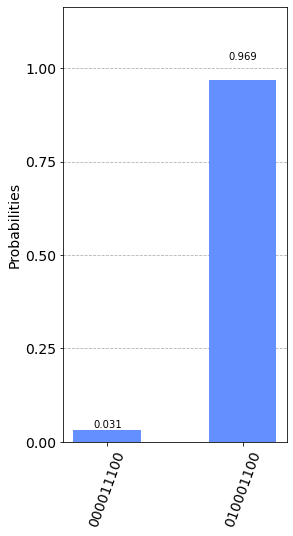

In [42]:
counts = {'000011100': 0.03162277660168379, '010001100': 0.999499874937461}
plot_histogram(counts, figsize=(4, 8))

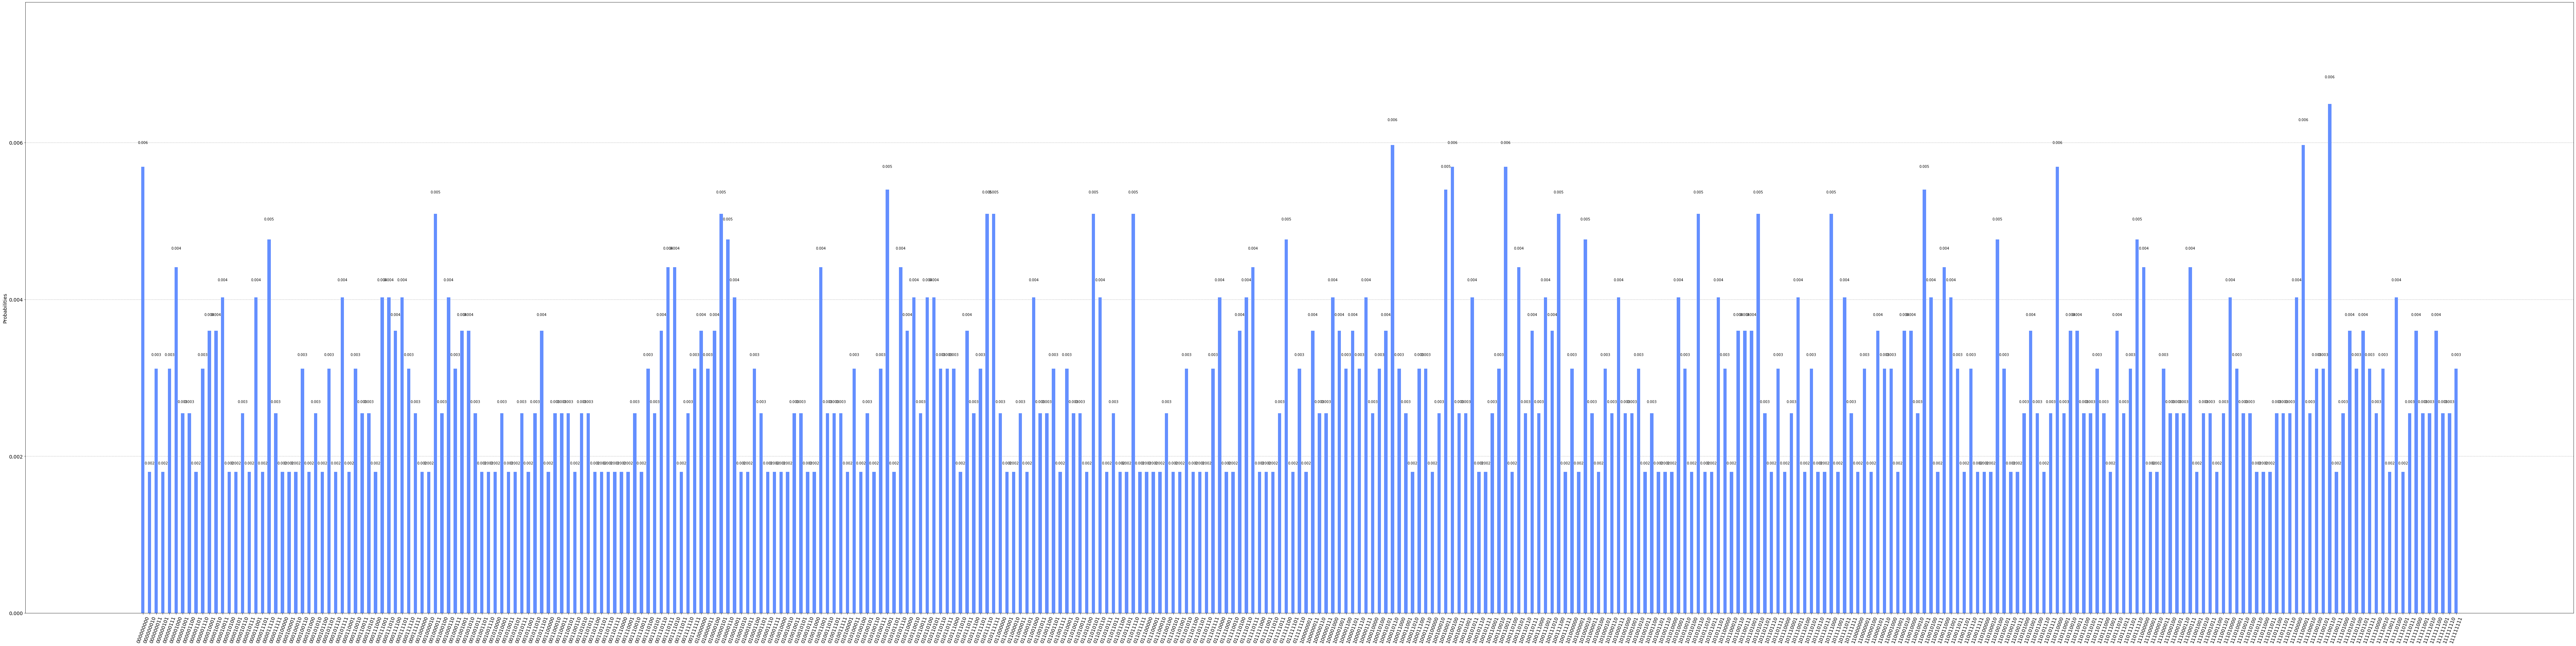

In [43]:
counts = {'000000000': 0.1, '000000010': 0.03162277660168379, '000000011': 0.05477225575051661, '000000101': 0.03162277660168379, '000000111': 0.05477225575051661, '000001000': 0.07745966692414834, '000001001': 0.044721359549995794, '000001100': 0.044721359549995794, '000001101': 0.03162277660168379, '000001110': 0.05477225575051661, '000010001': 0.06324555320336758, '000010010': 0.06324555320336758, '000010011': 0.07071067811865475, '000010100': 0.03162277660168379, '000010101': 0.03162277660168379, '000010110': 0.044721359549995794, '000010111': 0.03162277660168379, '000011001': 0.07071067811865475, '000011101': 0.03162277660168379, '000011110': 0.08366600265340755, '000011111': 0.044721359549995794, '000100000': 0.03162277660168379, '000100001': 0.03162277660168379, '000100010': 0.03162277660168379, '000100110': 0.05477225575051661, '000101000': 0.03162277660168379, '000101010': 0.044721359549995794, '000101100': 0.03162277660168379, '000101101': 0.05477225575051661, '000101110': 0.03162277660168379, '000101111': 0.07071067811865475, '000110001': 0.03162277660168379, '000110010': 0.05477225575051661, '000110011': 0.044721359549995794, '000110101': 0.044721359549995794, '000111000': 0.03162277660168379, '000111001': 0.07071067811865475, '000111010': 0.07071067811865475, '000111100': 0.06324555320336758, '000111101': 0.07071067811865475, '000111110': 0.05477225575051661, '000111111': 0.044721359549995794, '001000000': 0.03162277660168379, '001000010': 0.03162277660168379, '001000011': 0.08944271909999159, '001000100': 0.044721359549995794, '001000110': 0.07071067811865475, '001000111': 0.05477225575051661, '001001001': 0.06324555320336758, '001001010': 0.06324555320336758, '001001011': 0.044721359549995794, '001001101': 0.03162277660168379, '001001110': 0.03162277660168379, '001010000': 0.03162277660168379, '001010001': 0.044721359549995794, '001010011': 0.03162277660168379, '001010101': 0.03162277660168379, '001010111': 0.044721359549995794, '001011001': 0.03162277660168379, '001011010': 0.044721359549995794, '001011101': 0.06324555320336758, '001100000': 0.03162277660168379, '001100010': 0.044721359549995794, '001100011': 0.044721359549995794, '001100101': 0.044721359549995794, '001100110': 0.03162277660168379, '001101010': 0.044721359549995794, '001101011': 0.044721359549995794, '001101100': 0.03162277660168379, '001101101': 0.03162277660168379, '001101110': 0.03162277660168379, '001101111': 0.03162277660168379, '001110000': 0.03162277660168379, '001110001': 0.03162277660168379, '001110010': 0.044721359549995794, '001110011': 0.03162277660168379, '001110100': 0.05477225575051661, '001110101': 0.044721359549995794, '001110110': 0.06324555320336758, '001110111': 0.07745966692414834, '001111010': 0.07745966692414834, '001111011': 0.03162277660168379, '001111110': 0.044721359549995794, '001111111': 0.05477225575051661, '010000000': 0.06324555320336758, '010000011': 0.05477225575051661, '010000100': 0.06324555320336758, '010000101': 0.08944271909999159, '010000110': 0.08366600265340755, '010001001': 0.07071067811865475, '010001010': 0.03162277660168379, '010001011': 0.03162277660168379, '010001100': 0.05477225575051661, '010001101': 0.044721359549995794, '010001110': 0.03162277660168379, '010001111': 0.03162277660168379, '010010000': 0.03162277660168379, '010010010': 0.03162277660168379, '010010011': 0.044721359549995794, '010010101': 0.044721359549995794, '010010110': 0.03162277660168379, '010011000': 0.03162277660168379, '010011001': 0.07745966692414834, '010011010': 0.044721359549995794, '010011101': 0.044721359549995794, '010011111': 0.044721359549995794, '010100001': 0.03162277660168379, '010100011': 0.05477225575051661, '010100100': 0.03162277660168379, '010100101': 0.044721359549995794, '010100110': 0.03162277660168379, '010100111': 0.05477225575051661, '010101001': 0.09486832980505137, '010101101': 0.03162277660168379, '010101110': 0.07745966692414834, '010110000': 0.06324555320336758, '010110010': 0.07071067811865475, '010110011': 0.044721359549995794, '010110100': 0.07071067811865475, '010110101': 0.07071067811865475, '010110110': 0.05477225575051661, '010110111': 0.05477225575051661, '010111000': 0.05477225575051661, '010111010': 0.03162277660168379, '010111011': 0.06324555320336758, '010111100': 0.044721359549995794, '010111101': 0.05477225575051661, '010111110': 0.08944271909999159, '010111111': 0.08944271909999159, '011000000': 0.044721359549995794, '011000001': 0.03162277660168379, '011000010': 0.03162277660168379, '011000011': 0.044721359549995794, '011000101': 0.03162277660168379, '011001000': 0.07071067811865475, '011001011': 0.044721359549995794, '011001100': 0.044721359549995794, '011001101': 0.05477225575051661, '011001111': 0.03162277660168379, '011010001': 0.05477225575051661, '011010010': 0.044721359549995794, '011010011': 0.044721359549995794, '011010100': 0.03162277660168379, '011010101': 0.08944271909999159, '011010110': 0.07071067811865475, '011010111': 0.03162277660168379, '011011011': 0.044721359549995794, '011011100': 0.03162277660168379, '011011101': 0.03162277660168379, '011011110': 0.08944271909999159, '011011111': 0.03162277660168379, '011100000': 0.03162277660168379, '011100001': 0.03162277660168379, '011100010': 0.03162277660168379, '011100100': 0.044721359549995794, '011100101': 0.03162277660168379, '011101001': 0.03162277660168379, '011101010': 0.05477225575051661, '011101100': 0.03162277660168379, '011101101': 0.03162277660168379, '011101110': 0.03162277660168379, '011101111': 0.05477225575051661, '011110000': 0.07071067811865475, '011110001': 0.03162277660168379, '011110010': 0.03162277660168379, '011110100': 0.06324555320336758, '011110110': 0.07071067811865475, '011110111': 0.07745966692414834, '011111000': 0.03162277660168379, '011111001': 0.03162277660168379, '011111010': 0.03162277660168379, '011111011': 0.044721359549995794, '011111100': 0.08366600265340755, '011111101': 0.03162277660168379, '011111110': 0.05477225575051661, '100000001': 0.03162277660168379, '100000011': 0.06324555320336758, '100000110': 0.044721359549995794, '100000111': 0.044721359549995794, '100001000': 0.07071067811865475, '100001001': 0.06324555320336758, '100001100': 0.05477225575051661, '100001101': 0.06324555320336758, '100001110': 0.05477225575051661, '100001111': 0.07071067811865475, '100010000': 0.044721359549995794, '100010100': 0.05477225575051661, '100010101': 0.06324555320336758, '100010110': 0.10488088481701516, '100011000': 0.05477225575051661, '100011001': 0.044721359549995794, '100011010': 0.03162277660168379, '100011100': 0.05477225575051661, '100011110': 0.05477225575051661, '100100000': 0.03162277660168379, '100100010': 0.044721359549995794, '100100011': 0.09486832980505137, '100100100': 0.1, '100100111': 0.044721359549995794, '100101001': 0.044721359549995794, '100101011': 0.07071067811865475, '100101110': 0.03162277660168379, '100101111': 0.03162277660168379, '100110001': 0.044721359549995794, '100110010': 0.05477225575051661, '100110011': 0.1, '100110100': 0.03162277660168379, '100110101': 0.07745966692414834, '100110110': 0.044721359549995794, '100110111': 0.06324555320336758, '100111000': 0.044721359549995794, '100111001': 0.07071067811865475, '100111010': 0.06324555320336758, '100111100': 0.08944271909999159, '100111111': 0.03162277660168379, '101000000': 0.05477225575051661, '101000001': 0.03162277660168379, '101000010': 0.08366600265340755, '101000011': 0.044721359549995794, '101000100': 0.03162277660168379, '101000101': 0.05477225575051661, '101000110': 0.044721359549995794, '101000111': 0.07071067811865475, '101001000': 0.044721359549995794, '101001001': 0.044721359549995794, '101001010': 0.05477225575051661, '101001011': 0.03162277660168379, '101001100': 0.044721359549995794, '101001101': 0.03162277660168379, '101001110': 0.03162277660168379, '101010000': 0.03162277660168379, '101010001': 0.07071067811865475, '101010010': 0.05477225575051661, '101010100': 0.03162277660168379, '101010110': 0.08944271909999159, '101011010': 0.03162277660168379, '101011011': 0.03162277660168379, '101011101': 0.07071067811865475, '101100000': 0.05477225575051661, '101100010': 0.03162277660168379, '101100110': 0.06324555320336758, '101100111': 0.06324555320336758, '101101001': 0.06324555320336758, '101101010': 0.08944271909999159, '101101101': 0.044721359549995794, '101101110': 0.03162277660168379, '101101111': 0.05477225575051661, '101110000': 0.03162277660168379, '101110001': 0.044721359549995794, '101110011': 0.07071067811865475, '101110100': 0.03162277660168379, '101110101': 0.05477225575051661, '101110110': 0.03162277660168379, '101110111': 0.03162277660168379, '101111000': 0.08944271909999159, '101111001': 0.03162277660168379, '101111011': 0.07071067811865475, '101111111': 0.044721359549995794, '110000000': 0.03162277660168379, '110000001': 0.05477225575051661, '110000100': 0.03162277660168379, '110000101': 0.06324555320336758, '110000110': 0.05477225575051661, '110001000': 0.05477225575051661, '110001001': 0.03162277660168379, '110001010': 0.06324555320336758, '110010000': 0.06324555320336758, '110010010': 0.044721359549995794, '110010011': 0.09486832980505137, '110010100': 0.07071067811865475, '110010111': 0.03162277660168379, '110011000': 0.07745966692414834, '110011001': 0.07071067811865475, '110011011': 0.05477225575051661, '110011101': 0.03162277660168379, '110011110': 0.05477225575051661, '110011111': 0.03162277660168379, '110100000': 0.03162277660168379, '110100010': 0.03162277660168379, '110100100': 0.08366600265340755, '110100101': 0.05477225575051661, '110100110': 0.03162277660168379, '110100111': 0.03162277660168379, '110101000': 0.044721359549995794, '110101001': 0.06324555320336758, '110101100': 0.044721359549995794, '110101110': 0.03162277660168379, '110101111': 0.044721359549995794, '110110000': 0.1, '110110001': 0.044721359549995794, '110110010': 0.06324555320336758, '110110011': 0.06324555320336758, '110110100': 0.044721359549995794, '110110101': 0.044721359549995794, '110110111': 0.05477225575051661, '110111000': 0.044721359549995794, '110111001': 0.03162277660168379, '110111010': 0.06324555320336758, '110111011': 0.044721359549995794, '110111101': 0.05477225575051661, '110111110': 0.08366600265340755, '111000000': 0.07745966692414834, '111000001': 0.03162277660168379, '111000010': 0.03162277660168379, '111000011': 0.05477225575051661, '111000100': 0.044721359549995794, '111000101': 0.044721359549995794, '111000110': 0.044721359549995794, '111000111': 0.07745966692414834, '111001001': 0.03162277660168379, '111001010': 0.044721359549995794, '111001011': 0.044721359549995794, '111001100': 0.03162277660168379, '111001101': 0.044721359549995794, '111010000': 0.07071067811865475, '111010001': 0.05477225575051661, '111010010': 0.044721359549995794, '111010100': 0.044721359549995794, '111010110': 0.03162277660168379, '111011000': 0.03162277660168379, '111011011': 0.03162277660168379, '111011100': 0.044721359549995794, '111011101': 0.044721359549995794, '111011110': 0.044721359549995794, '111100000': 0.07071067811865475, '111100001': 0.10488088481701516, '111100010': 0.044721359549995794, '111100100': 0.05477225575051661, '111100101': 0.05477225575051661, '111100110': 0.11401754250991379, '111100111': 0.03162277660168379, '111101000': 0.044721359549995794, '111101010': 0.06324555320336758, '111101100': 0.05477225575051661, '111101101': 0.06324555320336758, '111101111': 0.05477225575051661, '111110000': 0.044721359549995794, '111110010': 0.05477225575051661, '111110011': 0.03162277660168379, '111110100': 0.07071067811865475, '111110101': 0.03162277660168379, '111110111': 0.044721359549995794, '111111000': 0.06324555320336758, '111111001': 0.044721359549995794, '111111010': 0.044721359549995794, '111111100': 0.06324555320336758, '111111101': 0.044721359549995794, '111111110': 0.044721359549995794, '111111111': 0.05477225575051661}
plot_histogram(counts, figsize=(130, 32))

p = 2 it = 1000

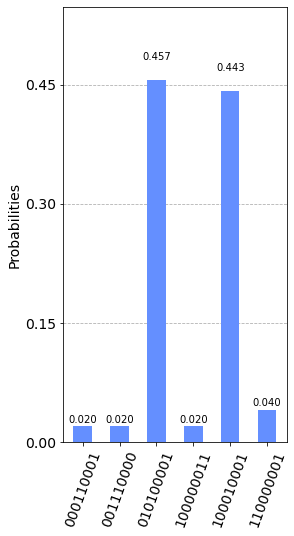

In [44]:
counts =  {'000110001': 0.03162277660168379, '001110000': 0.03162277660168379, '010100001': 0.7155417527999327, '100000011': 0.03162277660168379, '100010001': 0.6935416353759881, '110000001': 0.06324555320336758}
plot_histogram(counts, figsize=(4, 8))

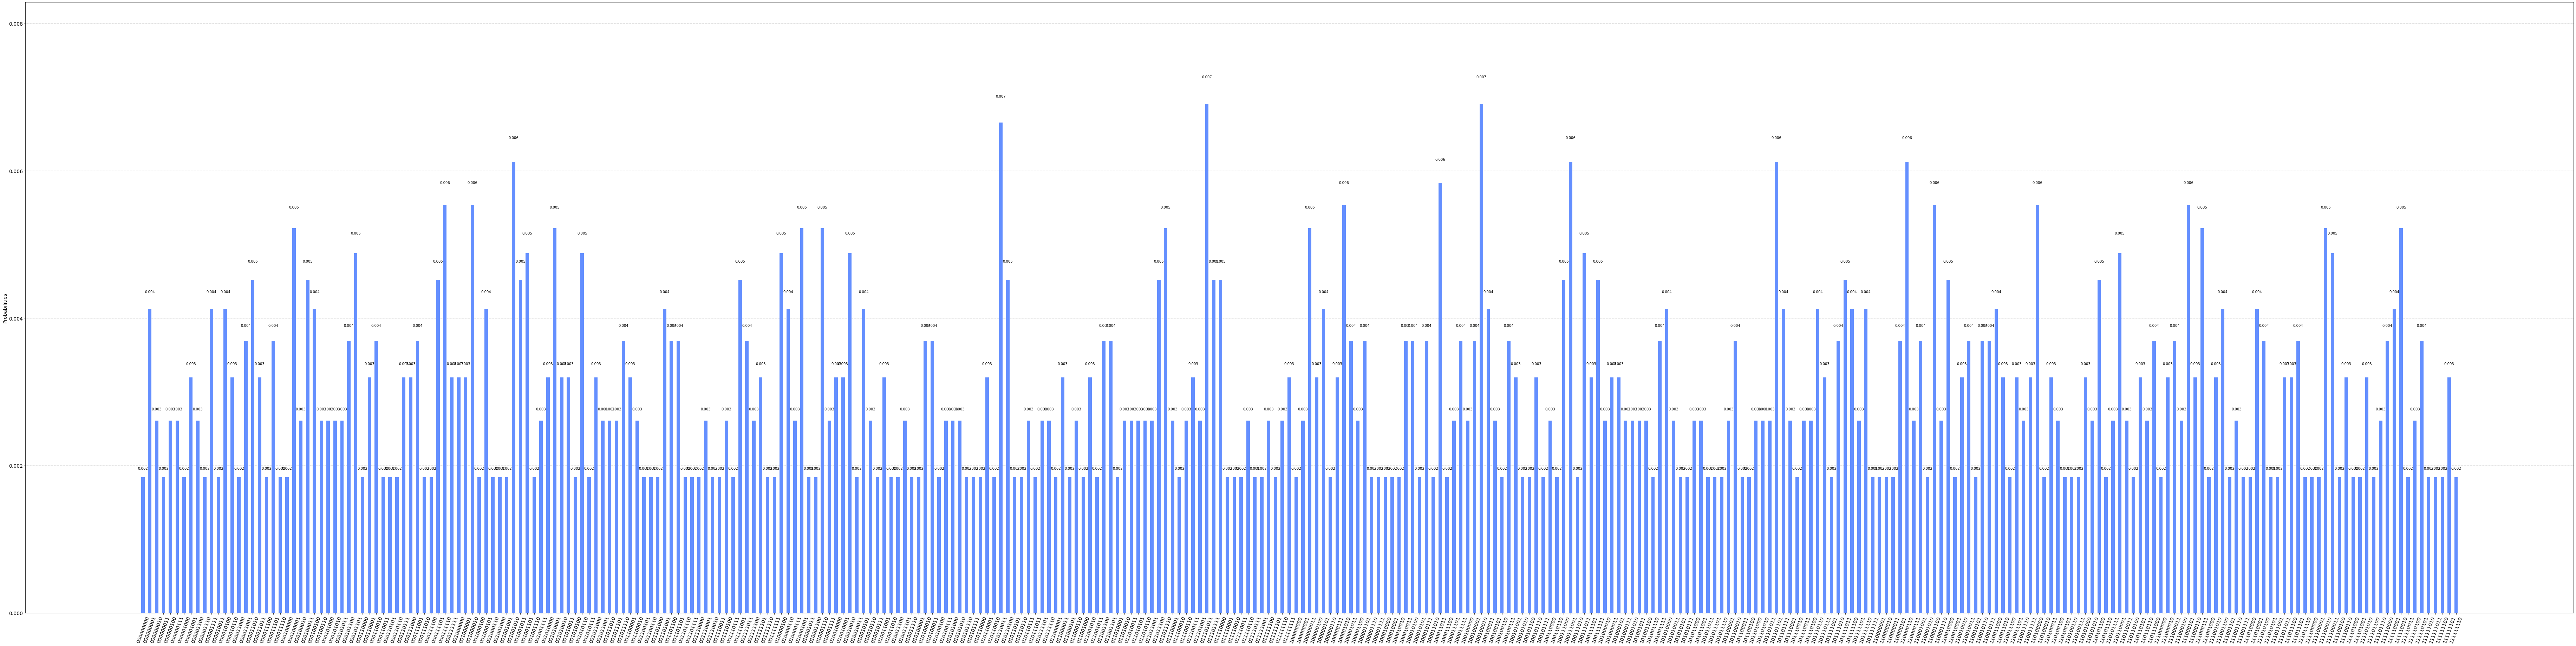

In [45]:
counts = {'000000000': 0.03162277660168379, '000000001': 0.07071067811865475, '000000010': 0.044721359549995794, '000000011': 0.03162277660168379, '000000100': 0.044721359549995794, '000000111': 0.044721359549995794, '000001000': 0.03162277660168379, '000001001': 0.05477225575051661, '000001100': 0.044721359549995794, '000001110': 0.03162277660168379, '000001111': 0.07071067811865475, '000010011': 0.03162277660168379, '000010100': 0.07071067811865475, '000010110': 0.05477225575051661, '000011000': 0.03162277660168379, '000011001': 0.06324555320336758, '000011010': 0.07745966692414834, '000011011': 0.05477225575051661, '000011100': 0.03162277660168379, '000011101': 0.06324555320336758, '000011110': 0.03162277660168379, '000100000': 0.03162277660168379, '000100001': 0.08944271909999159, '000100010': 0.044721359549995794, '000100011': 0.07745966692414834, '000100100': 0.07071067811865475, '000100110': 0.044721359549995794, '000101000': 0.044721359549995794, '000101010': 0.044721359549995794, '000101011': 0.044721359549995794, '000101100': 0.06324555320336758, '000101101': 0.08366600265340755, '000110000': 0.03162277660168379, '000110001': 0.05477225575051661, '000110010': 0.06324555320336758, '000110011': 0.03162277660168379, '000110101': 0.03162277660168379, '000110110': 0.03162277660168379, '000110111': 0.05477225575051661, '000111000': 0.05477225575051661, '000111001': 0.06324555320336758, '000111010': 0.03162277660168379, '000111100': 0.03162277660168379, '000111101': 0.07745966692414834, '000111110': 0.09486832980505137, '000111111': 0.05477225575051661, '001000000': 0.05477225575051661, '001000001': 0.05477225575051661, '001000010': 0.09486832980505137, '001000100': 0.03162277660168379, '001000101': 0.07071067811865475, '001000110': 0.03162277660168379, '001001000': 0.03162277660168379, '001001001': 0.03162277660168379, '001001010': 0.10488088481701516, '001001011': 0.07745966692414834, '001001101': 0.08366600265340755, '001001110': 0.03162277660168379, '001001111': 0.044721359549995794, '001010000': 0.05477225575051661, '001010001': 0.08944271909999159, '001010010': 0.05477225575051661, '001010011': 0.05477225575051661, '001010100': 0.03162277660168379, '001010110': 0.08366600265340755, '001010111': 0.03162277660168379, '001011000': 0.05477225575051661, '001011001': 0.044721359549995794, '001011010': 0.044721359549995794, '001011101': 0.044721359549995794, '001011110': 0.06324555320336758, '001100001': 0.05477225575051661, '001100010': 0.044721359549995794, '001100101': 0.03162277660168379, '001100110': 0.03162277660168379, '001101000': 0.03162277660168379, '001101001': 0.07071067811865475, '001101100': 0.06324555320336758, '001101101': 0.06324555320336758, '001101110': 0.03162277660168379, '001101111': 0.03162277660168379, '001110000': 0.03162277660168379, '001110001': 0.044721359549995794, '001110010': 0.03162277660168379, '001110011': 0.03162277660168379, '001110100': 0.044721359549995794, '001110111': 0.03162277660168379, '001111001': 0.07745966692414834, '001111011': 0.06324555320336758, '001111100': 0.044721359549995794, '001111101': 0.05477225575051661, '001111110': 0.03162277660168379, '001111111': 0.03162277660168379, '010000100': 0.08366600265340755, '010000110': 0.07071067811865475, '010000111': 0.044721359549995794, '010001001': 0.08944271909999159, '010001011': 0.03162277660168379, '010001100': 0.03162277660168379, '010001110': 0.08944271909999159, '010001111': 0.044721359549995794, '010010000': 0.05477225575051661, '010010001': 0.05477225575051661, '010010010': 0.08366600265340755, '010010011': 0.03162277660168379, '010010101': 0.07071067811865475, '010010110': 0.044721359549995794, '010010111': 0.03162277660168379, '010011001': 0.05477225575051661, '010011010': 0.03162277660168379, '010011100': 0.03162277660168379, '010011101': 0.044721359549995794, '010011110': 0.03162277660168379, '010100001': 0.03162277660168379, '010100010': 0.06324555320336758, '010100011': 0.06324555320336758, '010100100': 0.03162277660168379, '010100111': 0.044721359549995794, '010101000': 0.044721359549995794, '010101010': 0.044721359549995794, '010101110': 0.03162277660168379, '010101111': 0.03162277660168379, '010110000': 0.03162277660168379, '010110001': 0.05477225575051661, '010110010': 0.03162277660168379, '010110011': 0.11401754250991379, '010110100': 0.07745966692414834, '010110101': 0.03162277660168379, '010110110': 0.03162277660168379, '010110111': 0.044721359549995794, '010111011': 0.03162277660168379, '010111101': 0.044721359549995794, '010111110': 0.044721359549995794, '011000001': 0.03162277660168379, '011000011': 0.05477225575051661, '011000101': 0.03162277660168379, '011000110': 0.044721359549995794, '011001000': 0.03162277660168379, '011001010': 0.05477225575051661, '011001011': 0.03162277660168379, '011001100': 0.06324555320336758, '011001101': 0.06324555320336758, '011010001': 0.03162277660168379, '011010010': 0.044721359549995794, '011010011': 0.044721359549995794, '011010101': 0.044721359549995794, '011010110': 0.044721359549995794, '011011001': 0.044721359549995794, '011011100': 0.07745966692414834, '011011110': 0.08944271909999159, '011100001': 0.044721359549995794, '011100010': 0.03162277660168379, '011100110': 0.044721359549995794, '011100111': 0.05477225575051661, '011101001': 0.044721359549995794, '011101011': 0.11832159566199232, '011101111': 0.07745966692414834, '011110000': 0.07745966692414834, '011110001': 0.03162277660168379, '011110010': 0.03162277660168379, '011110011': 0.03162277660168379, '011110110': 0.044721359549995794, '011110111': 0.03162277660168379, '011111001': 0.03162277660168379, '011111100': 0.044721359549995794, '011111101': 0.03162277660168379, '011111110': 0.044721359549995794, '011111111': 0.05477225575051661, '100000000': 0.03162277660168379, '100000001': 0.044721359549995794, '100000011': 0.08944271909999159, '100000100': 0.05477225575051661, '100000101': 0.07071067811865475, '100000110': 0.03162277660168379, '100000111': 0.05477225575051661, '100001010': 0.09486832980505137, '100001011': 0.06324555320336758, '100001100': 0.044721359549995794, '100001101': 0.06324555320336758, '100001110': 0.03162277660168379, '100001111': 0.03162277660168379, '100010000': 0.03162277660168379, '100010001': 0.03162277660168379, '100010010': 0.03162277660168379, '100010011': 0.06324555320336758, '100010100': 0.06324555320336758, '100010101': 0.03162277660168379, '100010111': 0.06324555320336758, '100011010': 0.03162277660168379, '100011011': 0.1, '100011100': 0.03162277660168379, '100011101': 0.044721359549995794, '100011111': 0.06324555320336758, '100100000': 0.044721359549995794, '100100001': 0.06324555320336758, '100100010': 0.11832159566199232, '100100011': 0.07071067811865475, '100100101': 0.044721359549995794, '100100110': 0.03162277660168379, '100100111': 0.06324555320336758, '100101001': 0.05477225575051661, '100101010': 0.03162277660168379, '100101100': 0.03162277660168379, '100101110': 0.05477225575051661, '100101111': 0.03162277660168379, '100110000': 0.044721359549995794, '100110110': 0.03162277660168379, '100111000': 0.07745966692414834, '100111001': 0.10488088481701516, '100111010': 0.03162277660168379, '100111011': 0.08366600265340755, '100111101': 0.05477225575051661, '100111111': 0.07745966692414834, '101000010': 0.044721359549995794, '101000011': 0.05477225575051661, '101000101': 0.05477225575051661, '101000111': 0.044721359549995794, '101001010': 0.044721359549995794, '101001011': 0.044721359549995794, '101001100': 0.044721359549995794, '101001110': 0.03162277660168379, '101001111': 0.06324555320336758, '101010000': 0.07071067811865475, '101010011': 0.044721359549995794, '101010101': 0.03162277660168379, '101010111': 0.03162277660168379, '101011000': 0.044721359549995794, '101011001': 0.044721359549995794, '101011011': 0.03162277660168379, '101011101': 0.03162277660168379, '101011110': 0.03162277660168379, '101100001': 0.044721359549995794, '101100010': 0.06324555320336758, '101100011': 0.03162277660168379, '101100100': 0.03162277660168379, '101101000': 0.044721359549995794, '101101010': 0.044721359549995794, '101101011': 0.044721359549995794, '101101101': 0.10488088481701516, '101101111': 0.07071067811865475, '101110001': 0.044721359549995794, '101110010': 0.03162277660168379, '101110011': 0.044721359549995794, '101110100': 0.044721359549995794, '101110110': 0.07071067811865475, '101110111': 0.05477225575051661, '101111001': 0.03162277660168379, '101111010': 0.06324555320336758, '101111011': 0.07745966692414834, '101111100': 0.07071067811865475, '101111101': 0.044721359549995794, '101111110': 0.07071067811865475, '101111111': 0.03162277660168379, '110000001': 0.03162277660168379, '110000010': 0.03162277660168379, '110000011': 0.03162277660168379, '110000101': 0.06324555320336758, '110000110': 0.10488088481701516, '110000111': 0.044721359549995794, '110001001': 0.06324555320336758, '110001010': 0.03162277660168379, '110001100': 0.09486832980505137, '110001110': 0.044721359549995794, '110010000': 0.07745966692414834, '110010001': 0.03162277660168379, '110010010': 0.05477225575051661, '110010011': 0.06324555320336758, '110010101': 0.03162277660168379, '110010110': 0.06324555320336758, '110010111': 0.06324555320336758, '110011000': 0.07071067811865475, '110011010': 0.05477225575051661, '110011100': 0.03162277660168379, '110011101': 0.05477225575051661, '110011110': 0.044721359549995794, '110011111': 0.05477225575051661, '110100000': 0.09486832980505137, '110100010': 0.03162277660168379, '110100011': 0.05477225575051661, '110100100': 0.044721359549995794, '110100101': 0.03162277660168379, '110100110': 0.03162277660168379, '110100111': 0.03162277660168379, '110101000': 0.05477225575051661, '110101010': 0.044721359549995794, '110101100': 0.07745966692414834, '110101110': 0.03162277660168379, '110101111': 0.044721359549995794, '110110001': 0.08366600265340755, '110110011': 0.044721359549995794, '110110100': 0.03162277660168379, '110110101': 0.05477225575051661, '110110110': 0.044721359549995794, '110111000': 0.06324555320336758, '111000000': 0.03162277660168379, '111000010': 0.05477225575051661, '111000011': 0.06324555320336758, '111000100': 0.044721359549995794, '111000101': 0.09486832980505137, '111000110': 0.05477225575051661, '111000111': 0.08944271909999159, '111001000': 0.03162277660168379, '111001010': 0.05477225575051661, '111001100': 0.07071067811865475, '111001101': 0.03162277660168379, '111001110': 0.044721359549995794, '111001111': 0.03162277660168379, '111010000': 0.03162277660168379, '111010001': 0.07071067811865475, '111010100': 0.06324555320336758, '111010101': 0.03162277660168379, '111011001': 0.03162277660168379, '111011011': 0.05477225575051661, '111011100': 0.05477225575051661, '111011101': 0.06324555320336758, '111011110': 0.03162277660168379, '111100000': 0.03162277660168379, '111100001': 0.03162277660168379, '111100010': 0.08944271909999159, '111100011': 0.08366600265340755, '111100100': 0.03162277660168379, '111100110': 0.05477225575051661, '111101000': 0.03162277660168379, '111101001': 0.03162277660168379, '111101010': 0.05477225575051661, '111101100': 0.03162277660168379, '111101110': 0.044721359549995794, '111110000': 0.06324555320336758, '111110001': 0.07071067811865475, '111110010': 0.08944271909999159, '111110011': 0.03162277660168379, '111110100': 0.044721359549995794, '111110101': 0.06324555320336758, '111111010': 0.03162277660168379, '111111011': 0.03162277660168379, '111111100': 0.03162277660168379, '111111101': 0.05477225575051661, '111111110': 0.03162277660168379}
plot_histogram(counts, figsize=(130, 32))

p = 2 it = 1500


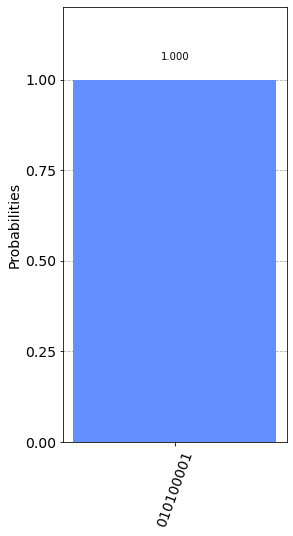

In [46]:
counts = {'010100001': 1.0}
plot_histogram(counts, figsize=(4, 8))

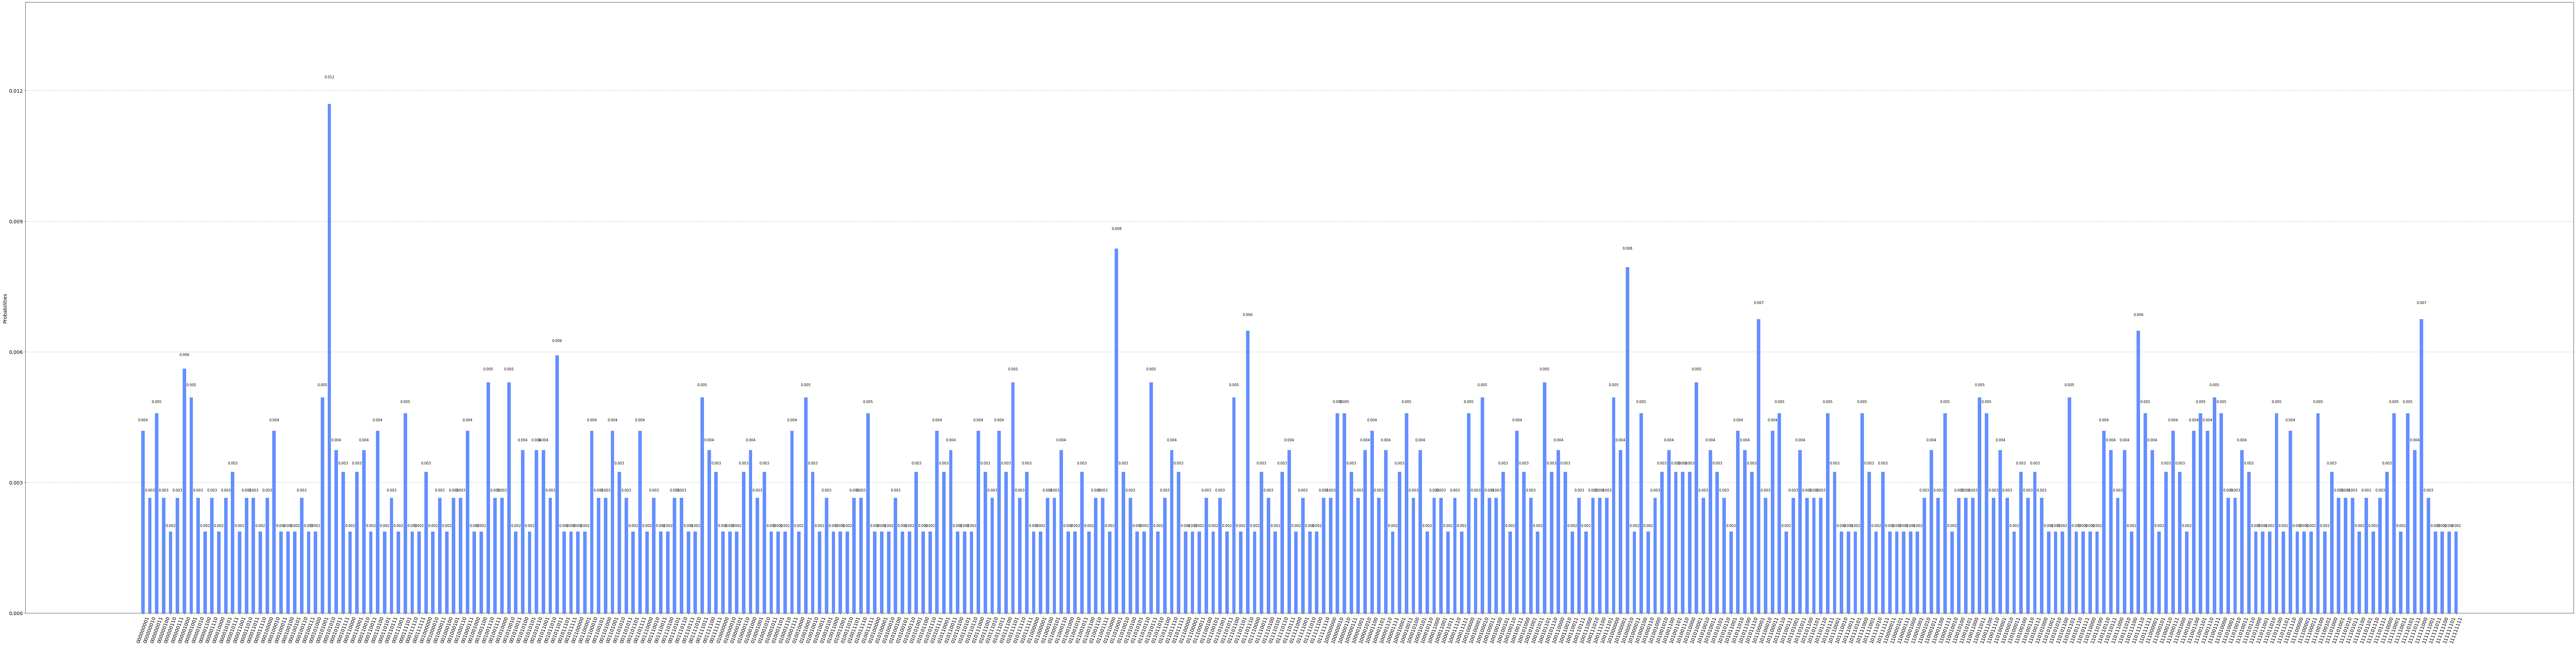

In [47]:
counts = {'000000001': 0.07071067811865475, '000000010': 0.044721359549995794, '000000011': 0.07745966692414834, '000000100': 0.044721359549995794, '000000110': 0.03162277660168379, '000000111': 0.044721359549995794, '000001000': 0.09486832980505137, '000001001': 0.08366600265340755, '000001010': 0.044721359549995794, '000001100': 0.03162277660168379, '000001110': 0.044721359549995794, '000010000': 0.03162277660168379, '000010101': 0.044721359549995794, '000010111': 0.05477225575051661, '000011001': 0.03162277660168379, '000011010': 0.044721359549995794, '000011011': 0.044721359549995794, '000011110': 0.03162277660168379, '000100000': 0.044721359549995794, '000100010': 0.07071067811865475, '000100011': 0.03162277660168379, '000100100': 0.03162277660168379, '000100101': 0.03162277660168379, '000100110': 0.044721359549995794, '000100111': 0.03162277660168379, '000101000': 0.03162277660168379, '000101001': 0.08366600265340755, '000101010': 0.19748417658131498, '000101011': 0.06324555320336758, '000101111': 0.05477225575051661, '000110000': 0.03162277660168379, '000110001': 0.05477225575051661, '000110010': 0.06324555320336758, '000110011': 0.03162277660168379, '000110100': 0.07071067811865475, '000110101': 0.03162277660168379, '000110111': 0.044721359549995794, '000111001': 0.03162277660168379, '000111101': 0.07745966692414834, '000111110': 0.03162277660168379, '000111111': 0.03162277660168379, '001000000': 0.05477225575051661, '001000010': 0.03162277660168379, '001000011': 0.044721359549995794, '001000100': 0.03162277660168379, '001000101': 0.044721359549995794, '001000110': 0.044721359549995794, '001000111': 0.07071067811865475, '001001000': 0.03162277660168379, '001001100': 0.03162277660168379, '001001110': 0.08944271909999159, '001001111': 0.044721359549995794, '001010000': 0.044721359549995794, '001010010': 0.08944271909999159, '001010011': 0.03162277660168379, '001010100': 0.06324555320336758, '001010101': 0.03162277660168379, '001010110': 0.06324555320336758, '001011001': 0.06324555320336758, '001011010': 0.044721359549995794, '001011011': 0.1, '001011101': 0.03162277660168379, '001011111': 0.03162277660168379, '001100000': 0.03162277660168379, '001100001': 0.03162277660168379, '001100010': 0.07071067811865475, '001100101': 0.044721359549995794, '001101000': 0.044721359549995794, '001101001': 0.07071067811865475, '001101010': 0.05477225575051661, '001101011': 0.044721359549995794, '001101101': 0.03162277660168379, '001101111': 0.07071067811865475, '001110000': 0.03162277660168379, '001110010': 0.044721359549995794, '001110011': 0.03162277660168379, '001110100': 0.03162277660168379, '001110101': 0.044721359549995794, '001110110': 0.044721359549995794, '001110111': 0.03162277660168379, '001111010': 0.03162277660168379, '001111011': 0.08366600265340755, '001111100': 0.06324555320336758, '001111111': 0.05477225575051661, '010000000': 0.03162277660168379, '010000010': 0.03162277660168379, '010000101': 0.03162277660168379, '010000110': 0.05477225575051661, '010001000': 0.06324555320336758, '010001001': 0.044721359549995794, '010001010': 0.05477225575051661, '010001011': 0.03162277660168379, '010001101': 0.03162277660168379, '010001110': 0.03162277660168379, '010001111': 0.07071067811865475, '010010000': 0.03162277660168379, '010010001': 0.08366600265340755, '010010010': 0.05477225575051661, '010010011': 0.03162277660168379, '010010101': 0.044721359549995794, '010011000': 0.03162277660168379, '010011001': 0.03162277660168379, '010011010': 0.03162277660168379, '010011101': 0.044721359549995794, '010011110': 0.044721359549995794, '010011111': 0.07745966692414834, '010100000': 0.03162277660168379, '010100001': 0.03162277660168379, '010100010': 0.03162277660168379, '010100100': 0.044721359549995794, '010100101': 0.03162277660168379, '010100110': 0.03162277660168379, '010101001': 0.05477225575051661, '010101100': 0.03162277660168379, '010101110': 0.03162277660168379, '010101111': 0.07071067811865475, '010110001': 0.05477225575051661, '010110011': 0.06324555320336758, '010110100': 0.03162277660168379, '010110101': 0.03162277660168379, '010110110': 0.03162277660168379, '010111000': 0.07071067811865475, '010111001': 0.05477225575051661, '010111010': 0.044721359549995794, '010111011': 0.07071067811865475, '010111100': 0.05477225575051661, '010111101': 0.08944271909999159, '010111110': 0.044721359549995794, '010111111': 0.05477225575051661, '011000000': 0.03162277660168379, '011000001': 0.03162277660168379, '011000100': 0.044721359549995794, '011000101': 0.044721359549995794, '011000110': 0.06324555320336758, '011001000': 0.03162277660168379, '011001010': 0.03162277660168379, '011001011': 0.05477225575051661, '011001100': 0.03162277660168379, '011001110': 0.044721359549995794, '011001111': 0.044721359549995794, '011010000': 0.03162277660168379, '011010001': 0.1414213562373095, '011010010': 0.05477225575051661, '011010100': 0.044721359549995794, '011010101': 0.03162277660168379, '011010110': 0.03162277660168379, '011010111': 0.08944271909999159, '011011010': 0.03162277660168379, '011011100': 0.044721359549995794, '011011110': 0.06324555320336758, '011011111': 0.05477225575051661, '011100000': 0.03162277660168379, '011100001': 0.03162277660168379, '011100011': 0.03162277660168379, '011100100': 0.044721359549995794, '011100101': 0.03162277660168379, '011101001': 0.044721359549995794, '011101011': 0.03162277660168379, '011101100': 0.08366600265340755, '011101101': 0.03162277660168379, '011101110': 0.10954451150103323, '011110000': 0.03162277660168379, '011110011': 0.05477225575051661, '011110100': 0.044721359549995794, '011110101': 0.03162277660168379, '011110110': 0.05477225575051661, '011110111': 0.06324555320336758, '011111000': 0.03162277660168379, '011111001': 0.044721359549995794, '011111010': 0.03162277660168379, '011111100': 0.03162277660168379, '011111110': 0.044721359549995794, '100000000': 0.044721359549995794, '100000010': 0.07745966692414834, '100000110': 0.07745966692414834, '100000111': 0.05477225575051661, '100001001': 0.044721359549995794, '100001010': 0.06324555320336758, '100001100': 0.07071067811865475, '100001101': 0.044721359549995794, '100001110': 0.06324555320336758, '100001111': 0.03162277660168379, '100010001': 0.05477225575051661, '100010011': 0.07745966692414834, '100010100': 0.044721359549995794, '100010101': 0.06324555320336758, '100010110': 0.03162277660168379, '100011000': 0.044721359549995794, '100011001': 0.044721359549995794, '100011011': 0.03162277660168379, '100011110': 0.044721359549995794, '100011111': 0.03162277660168379, '100100000': 0.07745966692414834, '100100001': 0.044721359549995794, '100100010': 0.08366600265340755, '100100011': 0.044721359549995794, '100100100': 0.044721359549995794, '100100101': 0.05477225575051661, '100100110': 0.03162277660168379, '100100111': 0.07071067811865475, '100101000': 0.05477225575051661, '100101001': 0.044721359549995794, '100101011': 0.03162277660168379, '100101101': 0.08944271909999159, '100101110': 0.05477225575051661, '100110000': 0.06324555320336758, '100110010': 0.05477225575051661, '100110011': 0.03162277660168379, '100110111': 0.044721359549995794, '100111000': 0.03162277660168379, '100111010': 0.044721359549995794, '100111100': 0.044721359549995794, '100111101': 0.044721359549995794, '101000000': 0.08366600265340755, '101000001': 0.06324555320336758, '101000010': 0.1341640786499874, '101000011': 0.03162277660168379, '101000100': 0.07745966692414834, '101000110': 0.03162277660168379, '101001000': 0.044721359549995794, '101001010': 0.05477225575051661, '101001100': 0.06324555320336758, '101001101': 0.05477225575051661, '101001110': 0.05477225575051661, '101010000': 0.05477225575051661, '101010001': 0.08944271909999159, '101010010': 0.044721359549995794, '101010011': 0.06324555320336758, '101010101': 0.05477225575051661, '101010110': 0.044721359549995794, '101011001': 0.03162277660168379, '101011010': 0.07071067811865475, '101011100': 0.06324555320336758, '101011110': 0.05477225575051661, '101100001': 0.11401754250991379, '101100010': 0.044721359549995794, '101100011': 0.07071067811865475, '101100110': 0.07745966692414834, '101100111': 0.03162277660168379, '101101001': 0.044721359549995794, '101101011': 0.06324555320336758, '101101100': 0.044721359549995794, '101101101': 0.044721359549995794, '101101110': 0.044721359549995794, '101101111': 0.07745966692414834, '101110001': 0.05477225575051661, '101110010': 0.03162277660168379, '101110011': 0.03162277660168379, '101110101': 0.03162277660168379, '101111000': 0.07745966692414834, '101111001': 0.05477225575051661, '101111010': 0.03162277660168379, '101111111': 0.05477225575051661, '110000011': 0.03162277660168379, '110000101': 0.03162277660168379, '110000111': 0.03162277660168379, '110001000': 0.03162277660168379, '110001001': 0.03162277660168379, '110001010': 0.044721359549995794, '110001011': 0.06324555320336758, '110001100': 0.044721359549995794, '110001111': 0.07745966692414834, '110010010': 0.03162277660168379, '110010100': 0.044721359549995794, '110010101': 0.044721359549995794, '110011000': 0.044721359549995794, '110011011': 0.08366600265340755, '110011100': 0.07745966692414834, '110011110': 0.044721359549995794, '110100001': 0.06324555320336758, '110100010': 0.044721359549995794, '110100011': 0.03162277660168379, '110100100': 0.05477225575051661, '110100110': 0.044721359549995794, '110100111': 0.05477225575051661, '110101000': 0.044721359549995794, '110101001': 0.03162277660168379, '110101010': 0.03162277660168379, '110101100': 0.03162277660168379, '110101101': 0.08366600265340755, '110101110': 0.03162277660168379, '110101111': 0.03162277660168379, '110110000': 0.03162277660168379, '110110100': 0.03162277660168379, '110110110': 0.07071067811865475, '110110111': 0.06324555320336758, '110111000': 0.044721359549995794, '110111010': 0.06324555320336758, '110111100': 0.03162277660168379, '110111110': 0.10954451150103323, '110111111': 0.07745966692414834, '111000001': 0.06324555320336758, '111000101': 0.03162277660168379, '111000110': 0.05477225575051661, '111000111': 0.07071067811865475, '111001000': 0.05477225575051661, '111001001': 0.03162277660168379, '111001100': 0.07071067811865475, '111001101': 0.07745966692414834, '111001110': 0.07071067811865475, '111001111': 0.08366600265340755, '111010000': 0.07745966692414834, '111010001': 0.044721359549995794, '111010010': 0.044721359549995794, '111010011': 0.06324555320336758, '111010110': 0.05477225575051661, '111011000': 0.03162277660168379, '111011001': 0.03162277660168379, '111011010': 0.03162277660168379, '111011100': 0.07745966692414834, '111011101': 0.03162277660168379, '111011110': 0.07071067811865475, '111100000': 0.03162277660168379, '111100001': 0.03162277660168379, '111100011': 0.03162277660168379, '111100100': 0.07745966692414834, '111100101': 0.03162277660168379, '111101000': 0.05477225575051661, '111101001': 0.044721359549995794, '111101010': 0.044721359549995794, '111101011': 0.044721359549995794, '111101100': 0.03162277660168379, '111101101': 0.044721359549995794, '111101110': 0.03162277660168379, '111101111': 0.044721359549995794, '111110000': 0.05477225575051661, '111110001': 0.07745966692414834, '111110011': 0.03162277660168379, '111110101': 0.07745966692414834, '111110111': 0.06324555320336758, '111111000': 0.11401754250991379, '111111001': 0.044721359549995794, '111111011': 0.03162277660168379, '111111100': 0.03162277660168379, '111111101': 0.03162277660168379, '111111111': 0.03162277660168379}
plot_histogram(counts, figsize=(130, 32))

p = 2 it = 2000

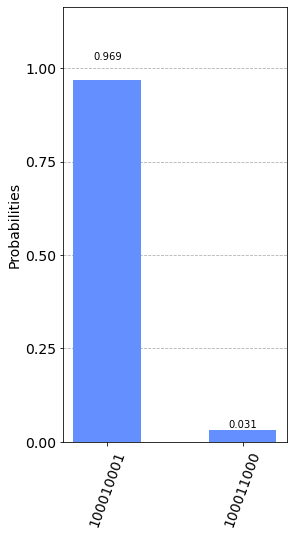

In [48]:
counts = {'100010001': 0.999499874937461, '100011000': 0.03162277660168379}
plot_histogram(counts, figsize=(4, 8))

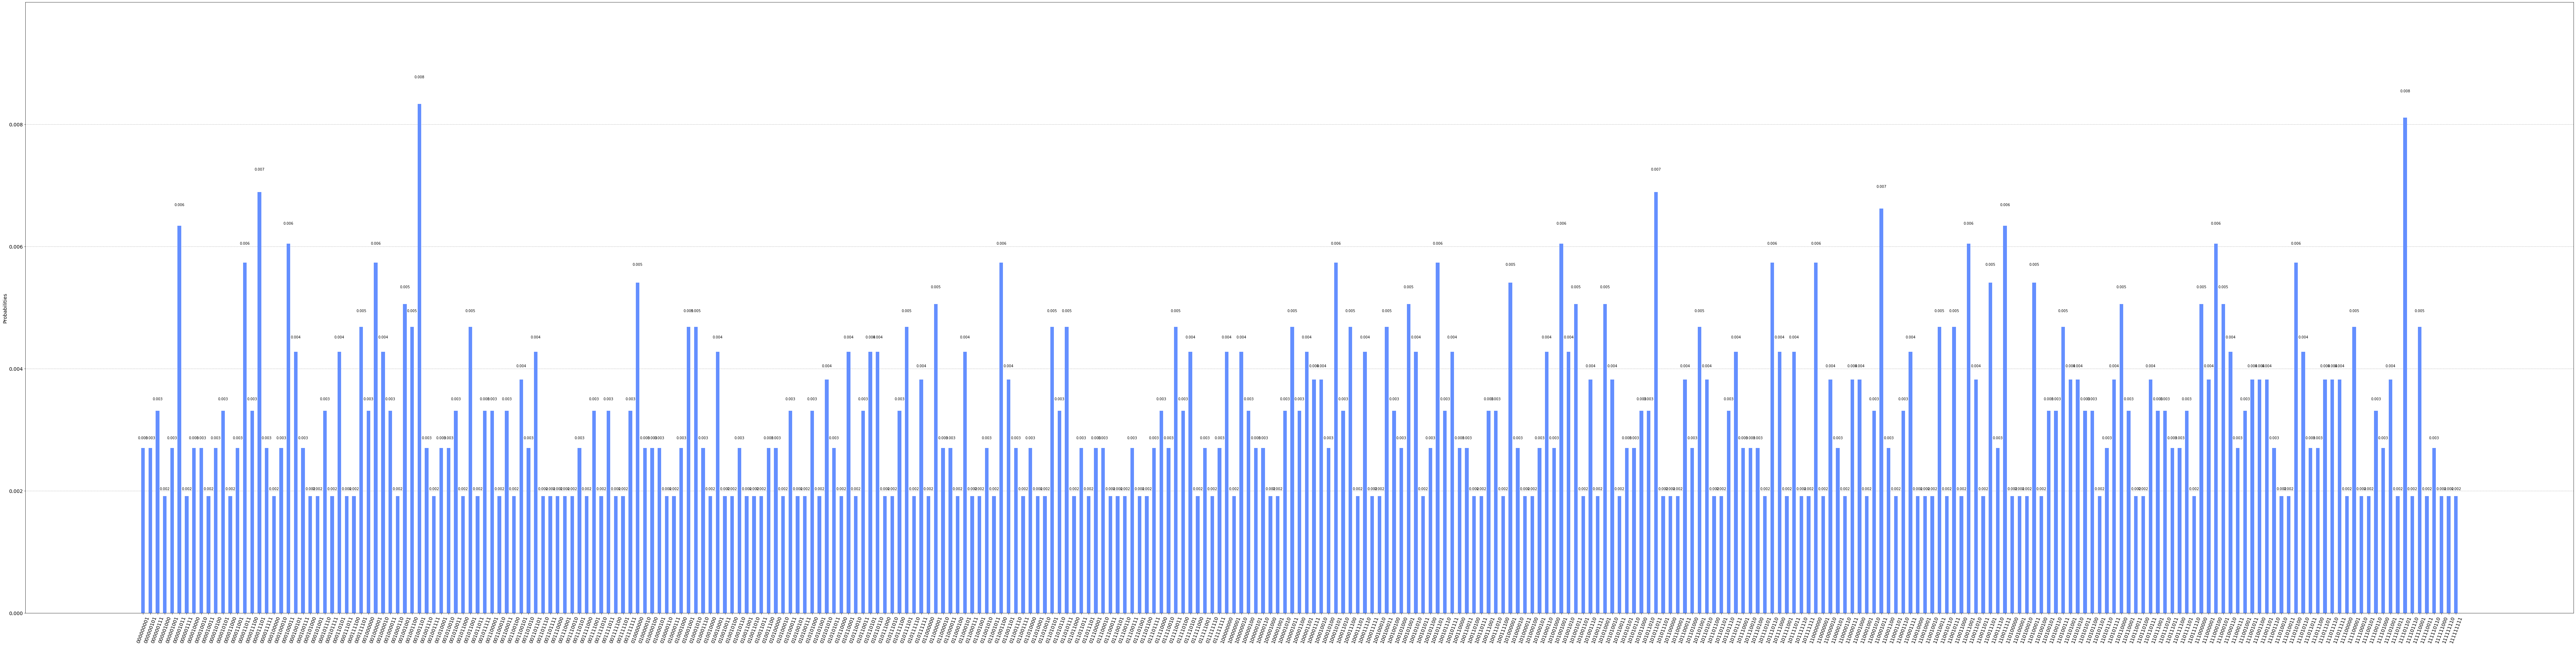

In [49]:
counts = {'000000001': 0.044721359549995794, '000000101': 0.044721359549995794, '000000111': 0.05477225575051661, '000001000': 0.03162277660168379, '000001001': 0.044721359549995794, '000001011': 0.10488088481701516, '000001111': 0.03162277660168379, '000010000': 0.044721359549995794, '000010010': 0.044721359549995794, '000010011': 0.03162277660168379, '000010100': 0.044721359549995794, '000010101': 0.05477225575051661, '000011000': 0.03162277660168379, '000011001': 0.044721359549995794, '000011011': 0.09486832980505137, '000011100': 0.05477225575051661, '000011101': 0.11401754250991379, '000011111': 0.044721359549995794, '000100000': 0.03162277660168379, '000100010': 0.044721359549995794, '000100011': 0.1, '000100101': 0.07071067811865475, '000100111': 0.044721359549995794, '000101000': 0.03162277660168379, '000101001': 0.03162277660168379, '000101110': 0.05477225575051661, '000101111': 0.03162277660168379, '000110101': 0.07071067811865475, '000111011': 0.03162277660168379, '000111100': 0.03162277660168379, '000111101': 0.07745966692414834, '001000000': 0.05477225575051661, '001000001': 0.09486832980505137, '001000010': 0.07071067811865475, '001000011': 0.05477225575051661, '001000110': 0.03162277660168379, '001001001': 0.08366600265340755, '001001100': 0.07745966692414834, '001001101': 0.13784048752090222, '001001110': 0.044721359549995794, '001001111': 0.03162277660168379, '001010001': 0.044721359549995794, '001010010': 0.044721359549995794, '001010011': 0.05477225575051661, '001011000': 0.03162277660168379, '001011001': 0.07745966692414834, '001011011': 0.03162277660168379, '001011111': 0.05477225575051661, '001100001': 0.05477225575051661, '001100010': 0.03162277660168379, '001100011': 0.05477225575051661, '001100100': 0.03162277660168379, '001100101': 0.06324555320336758, '001101010': 0.044721359549995794, '001101101': 0.07071067811865475, '001101110': 0.03162277660168379, '001101111': 0.03162277660168379, '001110000': 0.03162277660168379, '001110001': 0.03162277660168379, '001110010': 0.03162277660168379, '001110101': 0.044721359549995794, '001111000': 0.03162277660168379, '001111001': 0.05477225575051661, '001111010': 0.03162277660168379, '001111011': 0.05477225575051661, '001111100': 0.03162277660168379, '001111101': 0.03162277660168379, '001111111': 0.05477225575051661, '010000000': 0.08944271909999159, '010000010': 0.044721359549995794, '010000100': 0.044721359549995794, '010000101': 0.044721359549995794, '010000110': 0.03162277660168379, '010000111': 0.03162277660168379, '010001000': 0.044721359549995794, '010001001': 0.07745966692414834, '010001010': 0.07745966692414834, '010001110': 0.044721359549995794, '010010000': 0.03162277660168379, '010010001': 0.07071067811865475, '010010011': 0.03162277660168379, '010010100': 0.03162277660168379, '010010110': 0.044721359549995794, '010011001': 0.03162277660168379, '010011010': 0.03162277660168379, '010011011': 0.03162277660168379, '010011100': 0.044721359549995794, '010100000': 0.044721359549995794, '010100010': 0.03162277660168379, '010100011': 0.05477225575051661, '010100101': 0.03162277660168379, '010100111': 0.03162277660168379, '010101000': 0.05477225575051661, '010101001': 0.03162277660168379, '010101010': 0.06324555320336758, '010101011': 0.044721359549995794, '010110000': 0.03162277660168379, '010110001': 0.07071067811865475, '010110010': 0.03162277660168379, '010110011': 0.05477225575051661, '010110101': 0.07071067811865475, '010110110': 0.07071067811865475, '010111000': 0.03162277660168379, '010111010': 0.03162277660168379, '010111100': 0.05477225575051661, '010111101': 0.07745966692414834, '010111110': 0.03162277660168379, '010111111': 0.06324555320336758, '011000000': 0.03162277660168379, '011000001': 0.08366600265340755, '011000010': 0.044721359549995794, '011000011': 0.044721359549995794, '011000100': 0.03162277660168379, '011000101': 0.07071067811865475, '011000111': 0.03162277660168379, '011001001': 0.03162277660168379, '011001010': 0.044721359549995794, '011001011': 0.03162277660168379, '011001100': 0.09486832980505137, '011001101': 0.06324555320336758, '011001110': 0.044721359549995794, '011001111': 0.03162277660168379, '011010000': 0.044721359549995794, '011010001': 0.03162277660168379, '011010010': 0.03162277660168379, '011010101': 0.07745966692414834, '011010110': 0.05477225575051661, '011010111': 0.07745966692414834, '011011000': 0.03162277660168379, '011011011': 0.044721359549995794, '011011101': 0.03162277660168379, '011100001': 0.044721359549995794, '011100010': 0.044721359549995794, '011100011': 0.03162277660168379, '011100101': 0.03162277660168379, '011100110': 0.03162277660168379, '011100111': 0.044721359549995794, '011101001': 0.03162277660168379, '011101100': 0.03162277660168379, '011101111': 0.044721359549995794, '011110000': 0.05477225575051661, '011110010': 0.044721359549995794, '011110011': 0.07745966692414834, '011110100': 0.05477225575051661, '011110101': 0.07071067811865475, '011111000': 0.03162277660168379, '011111001': 0.044721359549995794, '011111110': 0.03162277660168379, '011111111': 0.044721359549995794, '100000000': 0.07071067811865475, '100000001': 0.03162277660168379, '100000010': 0.07071067811865475, '100000100': 0.05477225575051661, '100000101': 0.044721359549995794, '100000110': 0.044721359549995794, '100001000': 0.03162277660168379, '100001001': 0.03162277660168379, '100001010': 0.05477225575051661, '100001011': 0.07745966692414834, '100001100': 0.05477225575051661, '100001101': 0.07071067811865475, '100001111': 0.06324555320336758, '100010010': 0.06324555320336758, '100010100': 0.044721359549995794, '100010101': 0.09486832980505137, '100011010': 0.05477225575051661, '100011100': 0.07745966692414834, '100011101': 0.03162277660168379, '100011110': 0.07071067811865475, '100011111': 0.03162277660168379, '100100010': 0.03162277660168379, '100100011': 0.07745966692414834, '100100100': 0.05477225575051661, '100101000': 0.044721359549995794, '100101001': 0.08366600265340755, '100101010': 0.07071067811865475, '100101011': 0.03162277660168379, '100101100': 0.044721359549995794, '100101101': 0.09486832980505137, '100101110': 0.05477225575051661, '100101111': 0.07071067811865475, '100110000': 0.044721359549995794, '100110011': 0.044721359549995794, '100110100': 0.03162277660168379, '100110111': 0.03162277660168379, '100111001': 0.05477225575051661, '100111010': 0.05477225575051661, '100111100': 0.03162277660168379, '101000001': 0.08944271909999159, '101000010': 0.044721359549995794, '101000011': 0.03162277660168379, '101000100': 0.03162277660168379, '101000101': 0.044721359549995794, '101000110': 0.07071067811865475, '101001000': 0.044721359549995794, '101001001': 0.1, '101001010': 0.07071067811865475, '101001011': 0.08366600265340755, '101001101': 0.03162277660168379, '101001110': 0.06324555320336758, '101001111': 0.03162277660168379, '101010001': 0.08366600265340755, '101010010': 0.06324555320336758, '101010011': 0.03162277660168379, '101010101': 0.044721359549995794, '101010110': 0.044721359549995794, '101011000': 0.05477225575051661, '101011010': 0.05477225575051661, '101011011': 0.11401754250991379, '101011101': 0.03162277660168379, '101100000': 0.03162277660168379, '101100001': 0.03162277660168379, '101100011': 0.06324555320336758, '101101000': 0.044721359549995794, '101101001': 0.07745966692414834, '101101010': 0.06324555320336758, '101101100': 0.03162277660168379, '101101101': 0.03162277660168379, '101101110': 0.05477225575051661, '101101111': 0.07071067811865475, '101110001': 0.044721359549995794, '101110010': 0.044721359549995794, '101110100': 0.044721359549995794, '101110101': 0.03162277660168379, '101110110': 0.09486832980505137, '101111000': 0.07071067811865475, '101111001': 0.03162277660168379, '101111011': 0.07071067811865475, '101111110': 0.03162277660168379, '101111111': 0.03162277660168379, '110000000': 0.09486832980505137, '110000001': 0.03162277660168379, '110000010': 0.06324555320336758, '110000101': 0.044721359549995794, '110000110': 0.03162277660168379, '110000111': 0.06324555320336758, '110001000': 0.06324555320336758, '110001001': 0.03162277660168379, '110001010': 0.05477225575051661, '110001011': 0.10954451150103323, '110001100': 0.044721359549995794, '110001101': 0.03162277660168379, '110001110': 0.05477225575051661, '110001111': 0.07071067811865475, '110010000': 0.03162277660168379, '110010001': 0.03162277660168379, '110010010': 0.03162277660168379, '110010011': 0.07745966692414834, '110010110': 0.03162277660168379, '110010111': 0.07745966692414834, '110011000': 0.03162277660168379, '110011001': 0.1, '110011010': 0.06324555320336758, '110011011': 0.03162277660168379, '110011101': 0.08944271909999159, '110011110': 0.044721359549995794, '110011111': 0.10488088481701516, '110100000': 0.03162277660168379, '110100001': 0.03162277660168379, '110100010': 0.03162277660168379, '110100011': 0.08944271909999159, '110100100': 0.03162277660168379, '110100101': 0.05477225575051661, '110100110': 0.05477225575051661, '110100111': 0.07745966692414834, '110101001': 0.06324555320336758, '110101010': 0.06324555320336758, '110101011': 0.05477225575051661, '110101100': 0.05477225575051661, '110101101': 0.03162277660168379, '110101110': 0.044721359549995794, '110101111': 0.06324555320336758, '110110000': 0.08366600265340755, '110110001': 0.05477225575051661, '110110011': 0.03162277660168379, '110110100': 0.03162277660168379, '110110111': 0.06324555320336758, '110111001': 0.05477225575051661, '110111010': 0.05477225575051661, '110111011': 0.044721359549995794, '110111100': 0.044721359549995794, '110111101': 0.05477225575051661, '110111110': 0.03162277660168379, '111000000': 0.08366600265340755, '111000001': 0.06324555320336758, '111000100': 0.1, '111000101': 0.08366600265340755, '111000110': 0.07071067811865475, '111000111': 0.044721359549995794, '111001001': 0.05477225575051661, '111001011': 0.06324555320336758, '111001100': 0.06324555320336758, '111001101': 0.06324555320336758, '111001110': 0.044721359549995794, '111010010': 0.03162277660168379, '111010011': 0.03162277660168379, '111010100': 0.09486832980505137, '111010110': 0.07071067811865475, '111011011': 0.044721359549995794, '111011100': 0.044721359549995794, '111011101': 0.06324555320336758, '111011110': 0.06324555320336758, '111011111': 0.06324555320336758, '111100000': 0.03162277660168379, '111100001': 0.07745966692414834, '111100010': 0.03162277660168379, '111100101': 0.03162277660168379, '111100110': 0.05477225575051661, '111101000': 0.044721359549995794, '111101001': 0.06324555320336758, '111101011': 0.03162277660168379, '111101101': 0.1341640786499874, '111101110': 0.03162277660168379, '111110001': 0.07745966692414834, '111110011': 0.03162277660168379, '111110110': 0.044721359549995794, '111111000': 0.03162277660168379, '111111110': 0.03162277660168379, '111111111': 0.03162277660168379}
plot_histogram(counts, figsize=(130, 32))

p =2 it = 2500

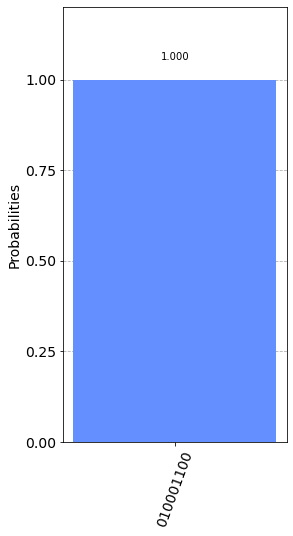

In [50]:
counts = {'010001100': 1.0}
plot_histogram(counts, figsize=(4, 8))

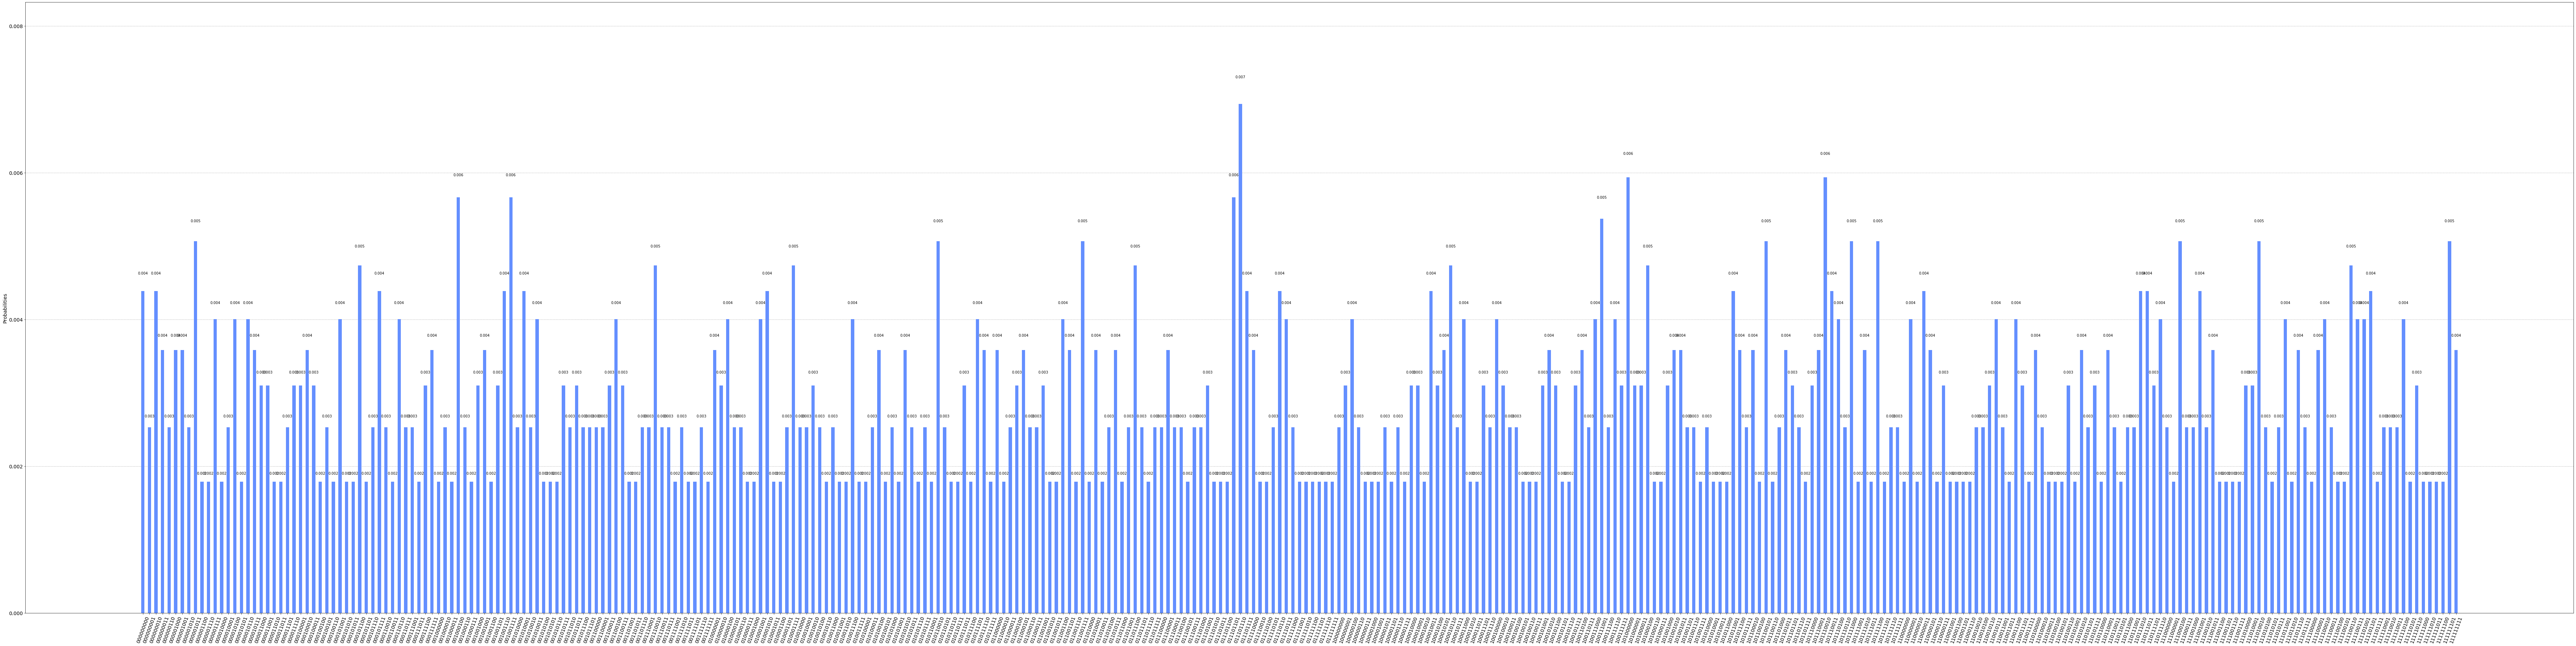

In [51]:
counts = {'000000000': 0.07745966692414834, '000000001': 0.044721359549995794, '000000010': 0.07745966692414834, '000000011': 0.06324555320336758, '000000110': 0.044721359549995794, '000001000': 0.06324555320336758, '000001001': 0.06324555320336758, '000001010': 0.044721359549995794, '000001011': 0.08944271909999159, '000001100': 0.03162277660168379, '000001110': 0.03162277660168379, '000001111': 0.07071067811865475, '000010000': 0.03162277660168379, '000010001': 0.044721359549995794, '000010100': 0.07071067811865475, '000010101': 0.03162277660168379, '000010110': 0.07071067811865475, '000010111': 0.06324555320336758, '000011000': 0.05477225575051661, '000011001': 0.05477225575051661, '000011010': 0.03162277660168379, '000011011': 0.03162277660168379, '000011101': 0.044721359549995794, '000011110': 0.05477225575051661, '000100001': 0.05477225575051661, '000100010': 0.06324555320336758, '000100011': 0.05477225575051661, '000100100': 0.03162277660168379, '000100101': 0.044721359549995794, '000100110': 0.03162277660168379, '000101001': 0.07071067811865475, '000101010': 0.03162277660168379, '000101011': 0.03162277660168379, '000101100': 0.08366600265340755, '000101101': 0.03162277660168379, '000101110': 0.044721359549995794, '000101111': 0.07745966692414834, '000110010': 0.044721359549995794, '000110011': 0.03162277660168379, '000110110': 0.07071067811865475, '000110111': 0.044721359549995794, '000111001': 0.044721359549995794, '000111011': 0.03162277660168379, '000111100': 0.05477225575051661, '000111111': 0.06324555320336758, '001000000': 0.03162277660168379, '001000010': 0.044721359549995794, '001000011': 0.03162277660168379, '001000100': 0.1, '001000110': 0.044721359549995794, '001000111': 0.03162277660168379, '001001000': 0.05477225575051661, '001001001': 0.06324555320336758, '001001100': 0.03162277660168379, '001001101': 0.05477225575051661, '001001110': 0.07745966692414834, '001001111': 0.1, '001010000': 0.044721359549995794, '001010001': 0.07745966692414834, '001010010': 0.044721359549995794, '001010011': 0.07071067811865475, '001010100': 0.03162277660168379, '001010101': 0.03162277660168379, '001010110': 0.03162277660168379, '001010111': 0.05477225575051661, '001011010': 0.044721359549995794, '001011011': 0.05477225575051661, '001011100': 0.044721359549995794, '001011101': 0.044721359549995794, '001100000': 0.044721359549995794, '001100001': 0.044721359549995794, '001100011': 0.05477225575051661, '001100100': 0.07071067811865475, '001100111': 0.05477225575051661, '001101001': 0.03162277660168379, '001101011': 0.03162277660168379, '001101110': 0.044721359549995794, '001110001': 0.044721359549995794, '001110010': 0.08366600265340755, '001110011': 0.044721359549995794, '001110111': 0.044721359549995794, '001111001': 0.03162277660168379, '001111010': 0.044721359549995794, '001111011': 0.03162277660168379, '001111101': 0.03162277660168379, '001111110': 0.044721359549995794, '001111111': 0.03162277660168379, '010000001': 0.06324555320336758, '010000010': 0.05477225575051661, '010000100': 0.07071067811865475, '010000101': 0.044721359549995794, '010000110': 0.044721359549995794, '010000111': 0.03162277660168379, '010001000': 0.03162277660168379, '010001001': 0.07071067811865475, '010001010': 0.07745966692414834, '010001011': 0.03162277660168379, '010001100': 0.03162277660168379, '010001101': 0.044721359549995794, '010001111': 0.08366600265340755, '010010000': 0.044721359549995794, '010010001': 0.044721359549995794, '010010010': 0.05477225575051661, '010010100': 0.044721359549995794, '010010110': 0.03162277660168379, '010011000': 0.044721359549995794, '010011001': 0.03162277660168379, '010011010': 0.03162277660168379, '010011100': 0.07071067811865475, '010011111': 0.03162277660168379, '010100001': 0.03162277660168379, '010100011': 0.044721359549995794, '010100100': 0.06324555320336758, '010100101': 0.03162277660168379, '010101000': 0.044721359549995794, '010101001': 0.03162277660168379, '010101010': 0.06324555320336758, '010101011': 0.044721359549995794, '010101110': 0.03162277660168379, '010101111': 0.044721359549995794, '010110001': 0.03162277660168379, '010110010': 0.08944271909999159, '010110101': 0.044721359549995794, '010110110': 0.03162277660168379, '010110111': 0.03162277660168379, '010111011': 0.05477225575051661, '010111100': 0.03162277660168379, '010111101': 0.07071067811865475, '010111110': 0.06324555320336758, '010111111': 0.03162277660168379, '011000000': 0.06324555320336758, '011000010': 0.03162277660168379, '011000011': 0.044721359549995794, '011000100': 0.05477225575051661, '011000101': 0.06324555320336758, '011000110': 0.044721359549995794, '011000111': 0.044721359549995794, '011001001': 0.05477225575051661, '011001010': 0.03162277660168379, '011001011': 0.03162277660168379, '011001100': 0.07071067811865475, '011001101': 0.06324555320336758, '011001110': 0.03162277660168379, '011001111': 0.08944271909999159, '011010000': 0.03162277660168379, '011010001': 0.06324555320336758, '011010011': 0.03162277660168379, '011010100': 0.044721359549995794, '011010111': 0.06324555320336758, '011011000': 0.03162277660168379, '011011001': 0.044721359549995794, '011011100': 0.08366600265340755, '011011101': 0.044721359549995794, '011011110': 0.03162277660168379, '011011111': 0.044721359549995794, '011100000': 0.044721359549995794, '011100001': 0.06324555320336758, '011100011': 0.044721359549995794, '011100100': 0.044721359549995794, '011100101': 0.03162277660168379, '011100111': 0.044721359549995794, '011101000': 0.044721359549995794, '011101001': 0.05477225575051661, '011101010': 0.03162277660168379, '011101011': 0.03162277660168379, '011101100': 0.03162277660168379, '011101101': 0.1, '011101110': 0.1224744871391589, '011101111': 0.07745966692414834, '011110000': 0.06324555320336758, '011110010': 0.03162277660168379, '011110100': 0.03162277660168379, '011110101': 0.044721359549995794, '011110110': 0.07745966692414834, '011110111': 0.07071067811865475, '011111000': 0.044721359549995794, '011111001': 0.03162277660168379, '011111010': 0.03162277660168379, '011111100': 0.03162277660168379, '011111101': 0.03162277660168379, '011111110': 0.03162277660168379, '011111111': 0.03162277660168379, '100000000': 0.044721359549995794, '100000001': 0.05477225575051661, '100000100': 0.07071067811865475, '100000110': 0.044721359549995794, '100000111': 0.03162277660168379, '100001000': 0.03162277660168379, '100001001': 0.03162277660168379, '100001011': 0.044721359549995794, '100001101': 0.03162277660168379, '100001110': 0.044721359549995794, '100001111': 0.03162277660168379, '100010000': 0.05477225575051661, '100010001': 0.05477225575051661, '100010010': 0.03162277660168379, '100010011': 0.07745966692414834, '100010100': 0.05477225575051661, '100010101': 0.06324555320336758, '100010110': 0.08366600265340755, '100010111': 0.044721359549995794, '100011000': 0.07071067811865475, '100011010': 0.03162277660168379, '100011011': 0.03162277660168379, '100011101': 0.05477225575051661, '100011110': 0.044721359549995794, '100100000': 0.07071067811865475, '100100010': 0.05477225575051661, '100100011': 0.044721359549995794, '100100100': 0.044721359549995794, '100100101': 0.03162277660168379, '100100110': 0.03162277660168379, '100100111': 0.03162277660168379, '100101001': 0.05477225575051661, '100101010': 0.06324555320336758, '100101100': 0.05477225575051661, '100101101': 0.03162277660168379, '100101110': 0.03162277660168379, '100101111': 0.05477225575051661, '100110100': 0.06324555320336758, '100110111': 0.044721359549995794, '100111000': 0.07071067811865475, '100111001': 0.09486832980505137, '100111100': 0.044721359549995794, '100111110': 0.07071067811865475, '100111111': 0.05477225575051661, '101000000': 0.10488088481701516, '101000001': 0.05477225575051661, '101000011': 0.05477225575051661, '101000100': 0.08366600265340755, '101000110': 0.03162277660168379, '101000111': 0.03162277660168379, '101001000': 0.05477225575051661, '101001010': 0.06324555320336758, '101001011': 0.06324555320336758, '101001101': 0.044721359549995794, '101001110': 0.044721359549995794, '101001111': 0.03162277660168379, '101010000': 0.044721359549995794, '101010001': 0.03162277660168379, '101010011': 0.03162277660168379, '101011000': 0.03162277660168379, '101011001': 0.07745966692414834, '101011100': 0.06324555320336758, '101011111': 0.044721359549995794, '101100010': 0.06324555320336758, '101100100': 0.03162277660168379, '101100101': 0.08944271909999159, '101100110': 0.03162277660168379, '101101000': 0.044721359549995794, '101101011': 0.06324555320336758, '101101101': 0.05477225575051661, '101101110': 0.044721359549995794, '101101111': 0.03162277660168379, '101110000': 0.05477225575051661, '101110001': 0.06324555320336758, '101110010': 0.10488088481701516, '101110011': 0.07745966692414834, '101110100': 0.07071067811865475, '101110110': 0.044721359549995794, '101111000': 0.08944271909999159, '101111001': 0.03162277660168379, '101111010': 0.06324555320336758, '101111011': 0.03162277660168379, '101111100': 0.08944271909999159, '101111101': 0.03162277660168379, '101111110': 0.044721359549995794, '101111111': 0.044721359549995794, '110000000': 0.03162277660168379, '110000001': 0.07071067811865475, '110000010': 0.03162277660168379, '110000011': 0.07745966692414834, '110000101': 0.06324555320336758, '110000110': 0.03162277660168379, '110000111': 0.05477225575051661, '110001001': 0.03162277660168379, '110001100': 0.03162277660168379, '110001101': 0.03162277660168379, '110001110': 0.03162277660168379, '110010010': 0.044721359549995794, '110010100': 0.044721359549995794, '110010110': 0.05477225575051661, '110010111': 0.07071067811865475, '110011001': 0.044721359549995794, '110011011': 0.03162277660168379, '110011100': 0.07071067811865475, '110011101': 0.05477225575051661, '110011111': 0.03162277660168379, '110100000': 0.06324555320336758, '110100010': 0.044721359549995794, '110100011': 0.03162277660168379, '110100100': 0.03162277660168379, '110100101': 0.03162277660168379, '110100110': 0.05477225575051661, '110101001': 0.03162277660168379, '110101010': 0.06324555320336758, '110101101': 0.044721359549995794, '110101111': 0.05477225575051661, '110110000': 0.03162277660168379, '110110001': 0.06324555320336758, '110110011': 0.044721359549995794, '110110101': 0.03162277660168379, '110111000': 0.044721359549995794, '110111001': 0.044721359549995794, '110111010': 0.07745966692414834, '110111011': 0.07745966692414834, '110111101': 0.05477225575051661, '110111110': 0.07071067811865475, '111000000': 0.044721359549995794, '111000001': 0.03162277660168379, '111000100': 0.08944271909999159, '111000111': 0.044721359549995794, '111001000': 0.044721359549995794, '111001001': 0.07745966692414834, '111001010': 0.044721359549995794, '111001011': 0.06324555320336758, '111001100': 0.03162277660168379, '111001101': 0.03162277660168379, '111001110': 0.03162277660168379, '111001111': 0.03162277660168379, '111010000': 0.05477225575051661, '111010001': 0.05477225575051661, '111010010': 0.08944271909999159, '111010100': 0.044721359549995794, '111010101': 0.03162277660168379, '111010111': 0.044721359549995794, '111011001': 0.07071067811865475, '111011010': 0.03162277660168379, '111011110': 0.06324555320336758, '111011111': 0.044721359549995794, '111100000': 0.03162277660168379, '111100001': 0.06324555320336758, '111100010': 0.07071067811865475, '111100011': 0.044721359549995794, '111100100': 0.03162277660168379, '111100101': 0.03162277660168379, '111100110': 0.08366600265340755, '111100111': 0.07071067811865475, '111101001': 0.07071067811865475, '111101101': 0.07745966692414834, '111101111': 0.03162277660168379, '111110001': 0.044721359549995794, '111110010': 0.044721359549995794, '111110011': 0.044721359549995794, '111110100': 0.07071067811865475, '111110101': 0.03162277660168379, '111110110': 0.05477225575051661, '111111000': 0.03162277660168379, '111111010': 0.03162277660168379, '111111011': 0.03162277660168379, '111111100': 0.03162277660168379, '111111101': 0.08944271909999159, '111111111': 0.06324555320336758}
plot_histogram(counts, figsize=(130, 32))

p = 3 it = 500

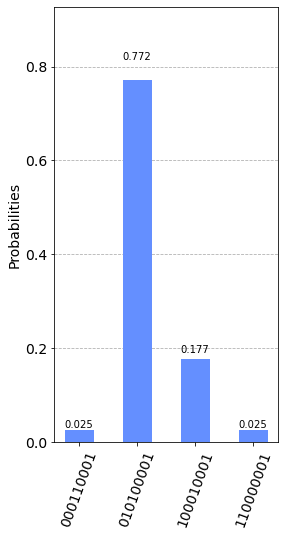

In [52]:
counts = {'000110001': 0.03162277660168379, '010100001': 0.9736529155710468, '100010001': 0.22360679774997896, '110000001': 0.03162277660168379}
plot_histogram(counts, figsize=(4, 8))

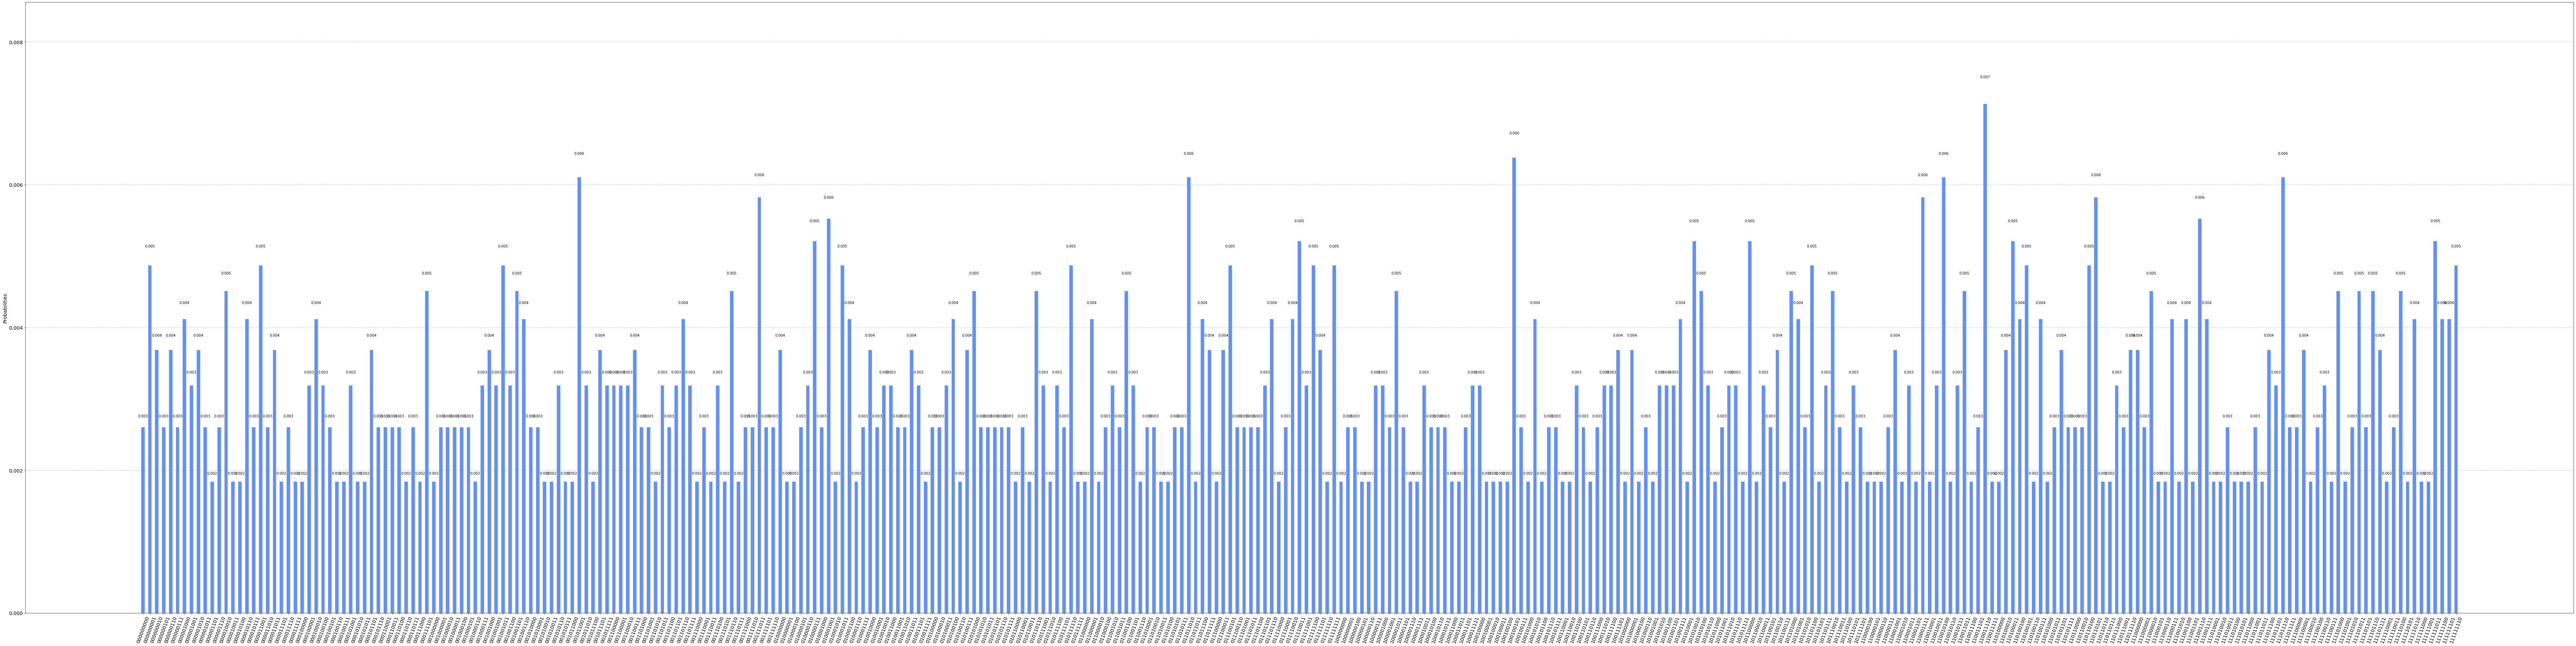

In [53]:
counts = {'000000000': 0.044721359549995794, '000000001': 0.08366600265340755, '000000010': 0.06324555320336758, '000000101': 0.044721359549995794, '000000110': 0.06324555320336758, '000000111': 0.044721359549995794, '000001000': 0.07071067811865475, '000001001': 0.05477225575051661, '000001010': 0.06324555320336758, '000001011': 0.044721359549995794, '000001101': 0.03162277660168379, '000001110': 0.044721359549995794, '000010010': 0.07745966692414834, '000010011': 0.03162277660168379, '000010100': 0.03162277660168379, '000010110': 0.07071067811865475, '000010111': 0.044721359549995794, '000011001': 0.08366600265340755, '000011010': 0.044721359549995794, '000011011': 0.06324555320336758, '000011101': 0.03162277660168379, '000011110': 0.044721359549995794, '000011111': 0.03162277660168379, '000100000': 0.03162277660168379, '000100001': 0.05477225575051661, '000100010': 0.07071067811865475, '000100100': 0.05477225575051661, '000100101': 0.044721359549995794, '000100110': 0.03162277660168379, '000100111': 0.03162277660168379, '000101001': 0.05477225575051661, '000101010': 0.03162277660168379, '000101011': 0.03162277660168379, '000101101': 0.06324555320336758, '000101110': 0.044721359549995794, '000110001': 0.044721359549995794, '000110011': 0.044721359549995794, '000110100': 0.044721359549995794, '000110110': 0.03162277660168379, '000110111': 0.044721359549995794, '000111000': 0.03162277660168379, '000111101': 0.07745966692414834, '001000000': 0.03162277660168379, '001000001': 0.044721359549995794, '001000010': 0.044721359549995794, '001000011': 0.044721359549995794, '001000100': 0.044721359549995794, '001000101': 0.044721359549995794, '001000110': 0.03162277660168379, '001000111': 0.05477225575051661, '001001000': 0.06324555320336758, '001001001': 0.05477225575051661, '001001011': 0.08366600265340755, '001001100': 0.05477225575051661, '001001101': 0.07745966692414834, '001001110': 0.07071067811865475, '001010000': 0.044721359549995794, '001010001': 0.044721359549995794, '001010010': 0.03162277660168379, '001010011': 0.03162277660168379, '001010110': 0.05477225575051661, '001010111': 0.03162277660168379, '001011000': 0.03162277660168379, '001011001': 0.10488088481701516, '001011010': 0.05477225575051661, '001011100': 0.03162277660168379, '001011101': 0.06324555320336758, '001011111': 0.05477225575051661, '001100000': 0.05477225575051661, '001100001': 0.05477225575051661, '001100010': 0.05477225575051661, '001100111': 0.06324555320336758, '001101000': 0.044721359549995794, '001101001': 0.044721359549995794, '001101010': 0.03162277660168379, '001101011': 0.05477225575051661, '001101100': 0.044721359549995794, '001101101': 0.05477225575051661, '001101110': 0.07071067811865475, '001101111': 0.05477225575051661, '001110000': 0.03162277660168379, '001110001': 0.044721359549995794, '001110011': 0.03162277660168379, '001110100': 0.05477225575051661, '001110101': 0.03162277660168379, '001110110': 0.07745966692414834, '001110111': 0.03162277660168379, '001111000': 0.044721359549995794, '001111010': 0.044721359549995794, '001111011': 0.1, '001111101': 0.044721359549995794, '001111110': 0.044721359549995794, '010000000': 0.06324555320336758, '010000001': 0.03162277660168379, '010000100': 0.03162277660168379, '010000101': 0.044721359549995794, '010000110': 0.05477225575051661, '010000111': 0.08944271909999159, '010001000': 0.044721359549995794, '010001001': 0.09486832980505137, '010001010': 0.03162277660168379, '010001011': 0.08366600265340755, '010001100': 0.07071067811865475, '010001110': 0.03162277660168379, '010001111': 0.044721359549995794, '010010000': 0.06324555320336758, '010010001': 0.044721359549995794, '010010010': 0.05477225575051661, '010011000': 0.05477225575051661, '010011001': 0.044721359549995794, '010011010': 0.044721359549995794, '010011011': 0.06324555320336758, '010011101': 0.05477225575051661, '010011111': 0.03162277660168379, '010100000': 0.044721359549995794, '010100010': 0.044721359549995794, '010100011': 0.05477225575051661, '010100100': 0.07071067811865475, '010100110': 0.03162277660168379, '010100111': 0.06324555320336758, '010101000': 0.07745966692414834, '010101010': 0.044721359549995794, '010101011': 0.044721359549995794, '010101101': 0.044721359549995794, '010101110': 0.044721359549995794, '010101111': 0.044721359549995794, '010110000': 0.03162277660168379, '010110001': 0.044721359549995794, '010110011': 0.03162277660168379, '010110110': 0.07745966692414834, '010111001': 0.05477225575051661, '010111010': 0.03162277660168379, '010111100': 0.05477225575051661, '010111101': 0.044721359549995794, '010111110': 0.08366600265340755, '010111111': 0.03162277660168379, '011000000': 0.03162277660168379, '011000001': 0.07071067811865475, '011000010': 0.03162277660168379, '011000100': 0.044721359549995794, '011001010': 0.05477225575051661, '011001011': 0.044721359549995794, '011001100': 0.07745966692414834, '011001101': 0.05477225575051661, '011001110': 0.03162277660168379, '011010001': 0.044721359549995794, '011010010': 0.044721359549995794, '011010011': 0.03162277660168379, '011010100': 0.03162277660168379, '011010101': 0.044721359549995794, '011010111': 0.044721359549995794, '011011010': 0.10488088481701516, '011011011': 0.03162277660168379, '011011100': 0.07071067811865475, '011011111': 0.06324555320336758, '011100000': 0.03162277660168379, '011100011': 0.06324555320336758, '011100101': 0.08366600265340755, '011100110': 0.044721359549995794, '011101001': 0.044721359549995794, '011101011': 0.044721359549995794, '011101100': 0.044721359549995794, '011101101': 0.05477225575051661, '011101110': 0.07071067811865475, '011110000': 0.03162277660168379, '011110001': 0.044721359549995794, '011110010': 0.07071067811865475, '011110011': 0.08944271909999159, '011111001': 0.05477225575051661, '011111100': 0.08366600265340755, '011111101': 0.06324555320336758, '011111110': 0.03162277660168379, '011111111': 0.08366600265340755, '100000000': 0.03162277660168379, '100000001': 0.044721359549995794, '100000100': 0.044721359549995794, '100000101': 0.03162277660168379, '100000110': 0.03162277660168379, '100000111': 0.05477225575051661, '100001000': 0.05477225575051661, '100001001': 0.044721359549995794, '100001011': 0.07745966692414834, '100001101': 0.044721359549995794, '100001110': 0.03162277660168379, '100001111': 0.03162277660168379, '100010011': 0.05477225575051661, '100010100': 0.044721359549995794, '100010110': 0.044721359549995794, '100010111': 0.044721359549995794, '100011000': 0.03162277660168379, '100011011': 0.03162277660168379, '100011101': 0.044721359549995794, '100011111': 0.05477225575051661, '100100000': 0.05477225575051661, '100100001': 0.03162277660168379, '100100010': 0.03162277660168379, '100100011': 0.03162277660168379, '100100100': 0.03162277660168379, '100100101': 0.10954451150103323, '100100111': 0.044721359549995794, '100101000': 0.03162277660168379, '100101010': 0.07071067811865475, '100101100': 0.03162277660168379, '100101110': 0.044721359549995794, '100101111': 0.044721359549995794, '100110001': 0.03162277660168379, '100110010': 0.03162277660168379, '100110100': 0.05477225575051661, '100110101': 0.044721359549995794, '100110110': 0.03162277660168379, '100111000': 0.044721359549995794, '100111010': 0.05477225575051661, '100111100': 0.05477225575051661, '100111101': 0.06324555320336758, '101000000': 0.03162277660168379, '101000001': 0.06324555320336758, '101000100': 0.03162277660168379, '101000110': 0.044721359549995794, '101001001': 0.03162277660168379, '101001010': 0.05477225575051661, '101001100': 0.05477225575051661, '101001101': 0.05477225575051661, '101001111': 0.07071067811865475, '101010001': 0.03162277660168379, '101010010': 0.08944271909999159, '101010100': 0.07745966692414834, '101010110': 0.05477225575051661, '101011000': 0.03162277660168379, '101011001': 0.044721359549995794, '101011010': 0.05477225575051661, '101011110': 0.05477225575051661, '101011111': 0.03162277660168379, '101100000': 0.08944271909999159, '101100010': 0.03162277660168379, '101100011': 0.05477225575051661, '101100101': 0.044721359549995794, '101100110': 0.06324555320336758, '101100111': 0.03162277660168379, '101101000': 0.07745966692414834, '101101001': 0.07071067811865475, '101101010': 0.044721359549995794, '101101100': 0.08366600265340755, '101101101': 0.03162277660168379, '101101111': 0.05477225575051661, '101110010': 0.07745966692414834, '101110011': 0.044721359549995794, '101110100': 0.03162277660168379, '101110101': 0.05477225575051661, '101111101': 0.044721359549995794, '110000100': 0.03162277660168379, '110000101': 0.03162277660168379, '110000110': 0.03162277660168379, '110000111': 0.044721359549995794, '110001001': 0.06324555320336758, '110001010': 0.03162277660168379, '110001011': 0.05477225575051661, '110001101': 0.03162277660168379, '110001111': 0.1, '110010001': 0.03162277660168379, '110010011': 0.05477225575051661, '110010100': 0.10488088481701516, '110010110': 0.03162277660168379, '110010111': 0.05477225575051661, '110011011': 0.07745966692414834, '110011100': 0.03162277660168379, '110011101': 0.044721359549995794, '110011110': 0.1224744871391589, '110011111': 0.03162277660168379, '110100000': 0.03162277660168379, '110100010': 0.06324555320336758, '110100011': 0.08944271909999159, '110100100': 0.07071067811865475, '110100101': 0.08366600265340755, '110100110': 0.03162277660168379, '110100111': 0.07071067811865475, '110101000': 0.03162277660168379, '110101011': 0.044721359549995794, '110101101': 0.06324555320336758, '110101111': 0.044721359549995794, '110110000': 0.044721359549995794, '110110010': 0.044721359549995794, '110110100': 0.08366600265340755, '110110101': 0.1, '110110110': 0.03162277660168379, '110110111': 0.03162277660168379, '110111000': 0.05477225575051661, '110111001': 0.044721359549995794, '110111110': 0.06324555320336758, '111000000': 0.06324555320336758, '111000001': 0.044721359549995794, '111000010': 0.07745966692414834, '111000101': 0.03162277660168379, '111000110': 0.03162277660168379, '111000111': 0.07071067811865475, '111001010': 0.03162277660168379, '111001100': 0.07071067811865475, '111001101': 0.03162277660168379, '111001110': 0.09486832980505137, '111001111': 0.07071067811865475, '111010001': 0.03162277660168379, '111010010': 0.03162277660168379, '111010011': 0.044721359549995794, '111010100': 0.03162277660168379, '111010101': 0.03162277660168379, '111011000': 0.03162277660168379, '111011001': 0.044721359549995794, '111011011': 0.03162277660168379, '111011100': 0.06324555320336758, '111011101': 0.05477225575051661, '111011110': 0.10488088481701516, '111011111': 0.044721359549995794, '111100000': 0.044721359549995794, '111100001': 0.06324555320336758, '111100010': 0.03162277660168379, '111100100': 0.044721359549995794, '111100110': 0.05477225575051661, '111100111': 0.03162277660168379, '111101000': 0.07745966692414834, '111101001': 0.03162277660168379, '111101010': 0.044721359549995794, '111101011': 0.07745966692414834, '111101101': 0.044721359549995794, '111101110': 0.07745966692414834, '111101111': 0.06324555320336758, '111110001': 0.03162277660168379, '111110011': 0.044721359549995794, '111110100': 0.07745966692414834, '111110101': 0.03162277660168379, '111110110': 0.07071067811865475, '111111000': 0.03162277660168379, '111111001': 0.03162277660168379, '111111011': 0.08944271909999159, '111111100': 0.07071067811865475, '111111101': 0.07071067811865475, '111111110': 0.08366600265340755}
plot_histogram(counts, figsize=(130, 32))

p = 3,2500


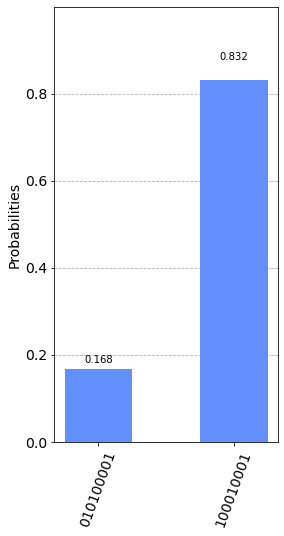

In [56]:
counts = {'010100001': 0.19748417658131498, '100010001': 0.9803060746521975}
plot_histogram(counts, figsize=(4, 8))

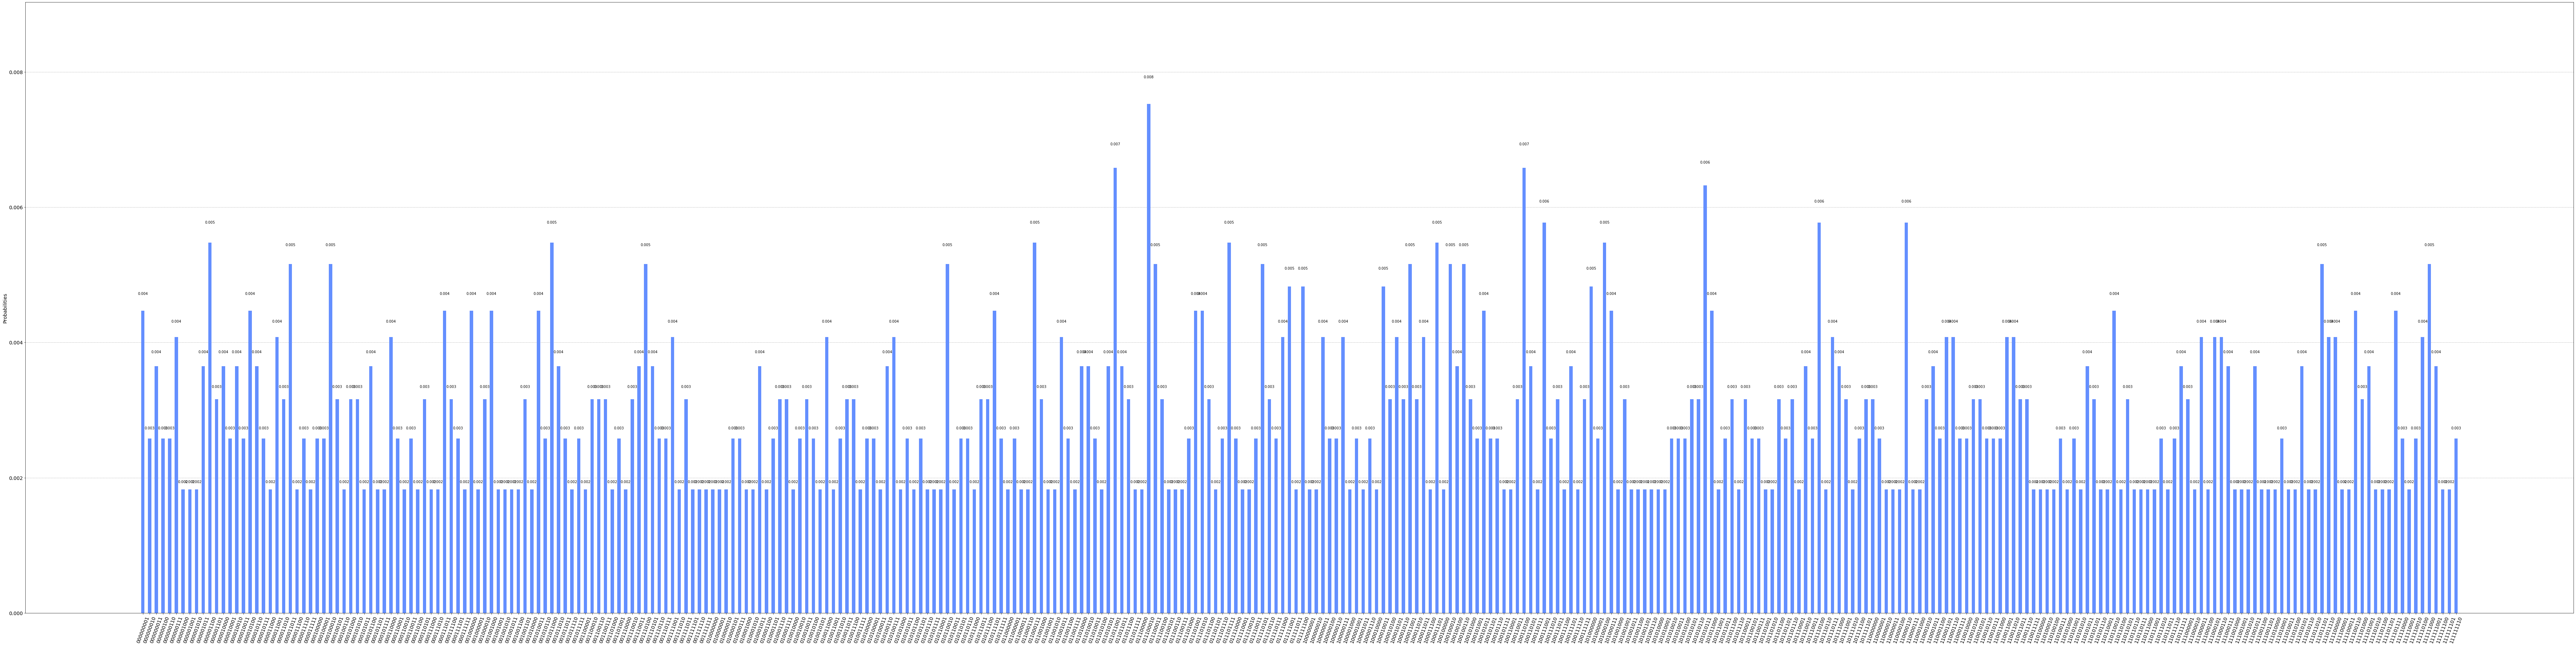

In [57]:
counts = {'000000001': 0.07745966692414834, '000000010': 0.044721359549995794, '000000011': 0.06324555320336758, '000000100': 0.044721359549995794, '000000110': 0.044721359549995794, '000000111': 0.07071067811865475, '000001000': 0.03162277660168379, '000001001': 0.03162277660168379, '000001010': 0.03162277660168379, '000001011': 0.06324555320336758, '000001100': 0.09486832980505137, '000001101': 0.05477225575051661, '000010000': 0.06324555320336758, '000010001': 0.044721359549995794, '000010010': 0.06324555320336758, '000010011': 0.044721359549995794, '000010100': 0.07745966692414834, '000010110': 0.06324555320336758, '000010111': 0.044721359549995794, '000011000': 0.03162277660168379, '000011001': 0.07071067811865475, '000011010': 0.05477225575051661, '000011011': 0.08944271909999159, '000011100': 0.03162277660168379, '000011110': 0.044721359549995794, '000011111': 0.03162277660168379, '000100000': 0.044721359549995794, '000100001': 0.044721359549995794, '000100010': 0.08944271909999159, '000100101': 0.05477225575051661, '000100110': 0.03162277660168379, '000101000': 0.05477225575051661, '000101010': 0.05477225575051661, '000101011': 0.03162277660168379, '000101100': 0.06324555320336758, '000101101': 0.03162277660168379, '000101111': 0.03162277660168379, '000110000': 0.07071067811865475, '000110001': 0.044721359549995794, '000110010': 0.03162277660168379, '000110011': 0.044721359549995794, '000110100': 0.03162277660168379, '000110101': 0.05477225575051661, '000111000': 0.03162277660168379, '000111010': 0.03162277660168379, '000111011': 0.07745966692414834, '000111100': 0.05477225575051661, '000111101': 0.044721359549995794, '000111111': 0.03162277660168379, '001000000': 0.07745966692414834, '001000001': 0.03162277660168379, '001000010': 0.05477225575051661, '001001000': 0.07745966692414834, '001001001': 0.03162277660168379, '001001010': 0.03162277660168379, '001001011': 0.03162277660168379, '001001100': 0.03162277660168379, '001001101': 0.05477225575051661, '001010000': 0.03162277660168379, '001010011': 0.07745966692414834, '001010110': 0.044721359549995794, '001011000': 0.09486832980505137, '001011010': 0.06324555320336758, '001011011': 0.044721359549995794, '001011110': 0.03162277660168379, '001011111': 0.044721359549995794, '001100001': 0.03162277660168379, '001100010': 0.05477225575051661, '001100110': 0.05477225575051661, '001100111': 0.05477225575051661, '001101000': 0.03162277660168379, '001101001': 0.044721359549995794, '001110000': 0.03162277660168379, '001110010': 0.05477225575051661, '001110011': 0.06324555320336758, '001110100': 0.08944271909999159, '001110101': 0.06324555320336758, '001110110': 0.044721359549995794, '001110111': 0.044721359549995794, '001111001': 0.07071067811865475, '001111010': 0.03162277660168379, '001111011': 0.05477225575051661, '001111101': 0.03162277660168379, '001111110': 0.03162277660168379, '001111111': 0.03162277660168379, '010000000': 0.03162277660168379, '010000001': 0.03162277660168379, '010000010': 0.03162277660168379, '010000101': 0.044721359549995794, '010000111': 0.044721359549995794, '010001000': 0.03162277660168379, '010001010': 0.03162277660168379, '010001011': 0.06324555320336758, '010001100': 0.03162277660168379, '010001101': 0.044721359549995794, '010001110': 0.05477225575051661, '010001111': 0.05477225575051661, '010010000': 0.03162277660168379, '010010010': 0.044721359549995794, '010010011': 0.05477225575051661, '010010100': 0.044721359549995794, '010010101': 0.03162277660168379, '010011000': 0.07071067811865475, '010011001': 0.03162277660168379, '010011010': 0.044721359549995794, '010011011': 0.05477225575051661, '010011100': 0.05477225575051661, '010011111': 0.03162277660168379, '010100000': 0.044721359549995794, '010100001': 0.044721359549995794, '010100011': 0.03162277660168379, '010100110': 0.06324555320336758, '010100111': 0.07071067811865475, '010101000': 0.03162277660168379, '010101011': 0.044721359549995794, '010101100': 0.03162277660168379, '010101101': 0.044721359549995794, '010101110': 0.03162277660168379, '010101111': 0.03162277660168379, '010110001': 0.03162277660168379, '010110010': 0.08944271909999159, '010110011': 0.03162277660168379, '010110101': 0.044721359549995794, '010110110': 0.044721359549995794, '010111000': 0.03162277660168379, '010111011': 0.05477225575051661, '010111100': 0.05477225575051661, '010111101': 0.07745966692414834, '010111111': 0.044721359549995794, '011000000': 0.03162277660168379, '011000001': 0.044721359549995794, '011000011': 0.03162277660168379, '011000110': 0.03162277660168379, '011000111': 0.09486832980505137, '011001000': 0.05477225575051661, '011001001': 0.03162277660168379, '011001010': 0.03162277660168379, '011001011': 0.07071067811865475, '011001100': 0.044721359549995794, '011001111': 0.03162277660168379, '011010000': 0.06324555320336758, '011010010': 0.06324555320336758, '011010011': 0.044721359549995794, '011010100': 0.03162277660168379, '011010101': 0.06324555320336758, '011011001': 0.11401754250991379, '011011011': 0.06324555320336758, '011011100': 0.05477225575051661, '011011111': 0.03162277660168379, '011100000': 0.03162277660168379, '011100010': 0.130384048104053, '011100011': 0.08944271909999159, '011100100': 0.05477225575051661, '011100101': 0.03162277660168379, '011100110': 0.03162277660168379, '011100111': 0.03162277660168379, '011101000': 0.044721359549995794, '011101001': 0.07745966692414834, '011101010': 0.07745966692414834, '011101100': 0.05477225575051661, '011101101': 0.03162277660168379, '011101110': 0.044721359549995794, '011101111': 0.09486832980505137, '011110000': 0.044721359549995794, '011110001': 0.03162277660168379, '011110010': 0.03162277660168379, '011110011': 0.044721359549995794, '011110101': 0.08944271909999159, '011110110': 0.05477225575051661, '011110111': 0.044721359549995794, '011111000': 0.07071067811865475, '011111001': 0.08366600265340755, '011111011': 0.03162277660168379, '011111100': 0.08366600265340755, '100000001': 0.03162277660168379, '100000010': 0.03162277660168379, '100000011': 0.07071067811865475, '100000100': 0.044721359549995794, '100000110': 0.044721359549995794, '100000111': 0.07071067811865475, '100001000': 0.03162277660168379, '100001001': 0.044721359549995794, '100001011': 0.03162277660168379, '100001110': 0.044721359549995794, '100010000': 0.03162277660168379, '100010011': 0.08366600265340755, '100010100': 0.05477225575051661, '100010101': 0.07071067811865475, '100010110': 0.05477225575051661, '100011001': 0.08944271909999159, '100011010': 0.05477225575051661, '100011011': 0.07071067811865475, '100011100': 0.03162277660168379, '100011101': 0.09486832980505137, '100100000': 0.03162277660168379, '100100010': 0.08944271909999159, '100100100': 0.06324555320336758, '100100110': 0.08944271909999159, '100101000': 0.05477225575051661, '100101001': 0.044721359549995794, '100101011': 0.07745966692414834, '100101101': 0.044721359549995794, '100101110': 0.044721359549995794, '100101111': 0.03162277660168379, '100110001': 0.03162277660168379, '100110011': 0.05477225575051661, '100110100': 0.11401754250991379, '100110101': 0.06324555320336758, '100110111': 0.03162277660168379, '100111001': 0.1, '100111010': 0.044721359549995794, '100111011': 0.05477225575051661, '100111100': 0.03162277660168379, '100111101': 0.06324555320336758, '100111110': 0.03162277660168379, '100111111': 0.05477225575051661, '101000000': 0.08366600265340755, '101000001': 0.044721359549995794, '101000100': 0.09486832980505137, '101000111': 0.07745966692414834, '101001000': 0.03162277660168379, '101001001': 0.05477225575051661, '101001011': 0.03162277660168379, '101001100': 0.03162277660168379, '101001101': 0.03162277660168379, '101001110': 0.03162277660168379, '101010000': 0.03162277660168379, '101010001': 0.03162277660168379, '101010010': 0.044721359549995794, '101010011': 0.044721359549995794, '101010100': 0.044721359549995794, '101010101': 0.05477225575051661, '101010110': 0.05477225575051661, '101010111': 0.10954451150103323, '101011000': 0.07745966692414834, '101011001': 0.03162277660168379, '101011011': 0.044721359549995794, '101011100': 0.05477225575051661, '101011110': 0.03162277660168379, '101100011': 0.05477225575051661, '101100101': 0.044721359549995794, '101100111': 0.044721359549995794, '101101001': 0.03162277660168379, '101101010': 0.03162277660168379, '101101100': 0.05477225575051661, '101101101': 0.044721359549995794, '101101110': 0.05477225575051661, '101110001': 0.03162277660168379, '101110010': 0.06324555320336758, '101110011': 0.044721359549995794, '101110100': 0.1, '101110110': 0.03162277660168379, '101110111': 0.07071067811865475, '101111000': 0.06324555320336758, '101111001': 0.05477225575051661, '101111010': 0.03162277660168379, '101111100': 0.044721359549995794, '101111101': 0.05477225575051661, '110000000': 0.05477225575051661, '110000001': 0.044721359549995794, '110000010': 0.03162277660168379, '110000011': 0.03162277660168379, '110000100': 0.03162277660168379, '110000110': 0.1, '110000111': 0.03162277660168379, '110001000': 0.03162277660168379, '110001010': 0.05477225575051661, '110001011': 0.06324555320336758, '110001100': 0.044721359549995794, '110001101': 0.07071067811865475, '110001110': 0.07071067811865475, '110001111': 0.044721359549995794, '110010000': 0.044721359549995794, '110010100': 0.05477225575051661, '110010101': 0.05477225575051661, '110010110': 0.044721359549995794, '110010111': 0.044721359549995794, '110011000': 0.044721359549995794, '110011001': 0.07071067811865475, '110011010': 0.07071067811865475, '110011011': 0.05477225575051661, '110011110': 0.05477225575051661, '110011111': 0.03162277660168379, '110100000': 0.03162277660168379, '110100010': 0.03162277660168379, '110100100': 0.03162277660168379, '110100111': 0.044721359549995794, '110101000': 0.03162277660168379, '110101001': 0.044721359549995794, '110101010': 0.03162277660168379, '110101011': 0.06324555320336758, '110101101': 0.05477225575051661, '110101110': 0.03162277660168379, '110110001': 0.03162277660168379, '110110010': 0.07745966692414834, '110110100': 0.03162277660168379, '110110101': 0.05477225575051661, '110110110': 0.03162277660168379, '110110111': 0.03162277660168379, '110111000': 0.03162277660168379, '110111001': 0.03162277660168379, '110111010': 0.044721359549995794, '110111011': 0.03162277660168379, '110111110': 0.044721359549995794, '110111111': 0.06324555320336758, '111000001': 0.05477225575051661, '111000010': 0.03162277660168379, '111000011': 0.07071067811865475, '111000100': 0.03162277660168379, '111000101': 0.07071067811865475, '111000110': 0.07071067811865475, '111000111': 0.06324555320336758, '111001000': 0.03162277660168379, '111001001': 0.03162277660168379, '111001010': 0.03162277660168379, '111001011': 0.06324555320336758, '111001100': 0.03162277660168379, '111001101': 0.03162277660168379, '111010000': 0.03162277660168379, '111010001': 0.044721359549995794, '111010011': 0.03162277660168379, '111010100': 0.03162277660168379, '111010101': 0.06324555320336758, '111010110': 0.03162277660168379, '111011010': 0.03162277660168379, '111011101': 0.08944271909999159, '111011110': 0.07071067811865475, '111100000': 0.07071067811865475, '111100001': 0.03162277660168379, '111100011': 0.03162277660168379, '111100110': 0.07745966692414834, '111101000': 0.05477225575051661, '111101001': 0.06324555320336758, '111101010': 0.03162277660168379, '111101100': 0.03162277660168379, '111101101': 0.03162277660168379, '111101111': 0.07745966692414834, '111110000': 0.044721359549995794, '111110001': 0.03162277660168379, '111110010': 0.044721359549995794, '111110100': 0.07071067811865475, '111111000': 0.08944271909999159, '111111001': 0.06324555320336758, '111111100': 0.03162277660168379, '111111101': 0.03162277660168379, '111111110': 0.044721359549995794}
plot_histogram(counts, figsize=(130, 32))

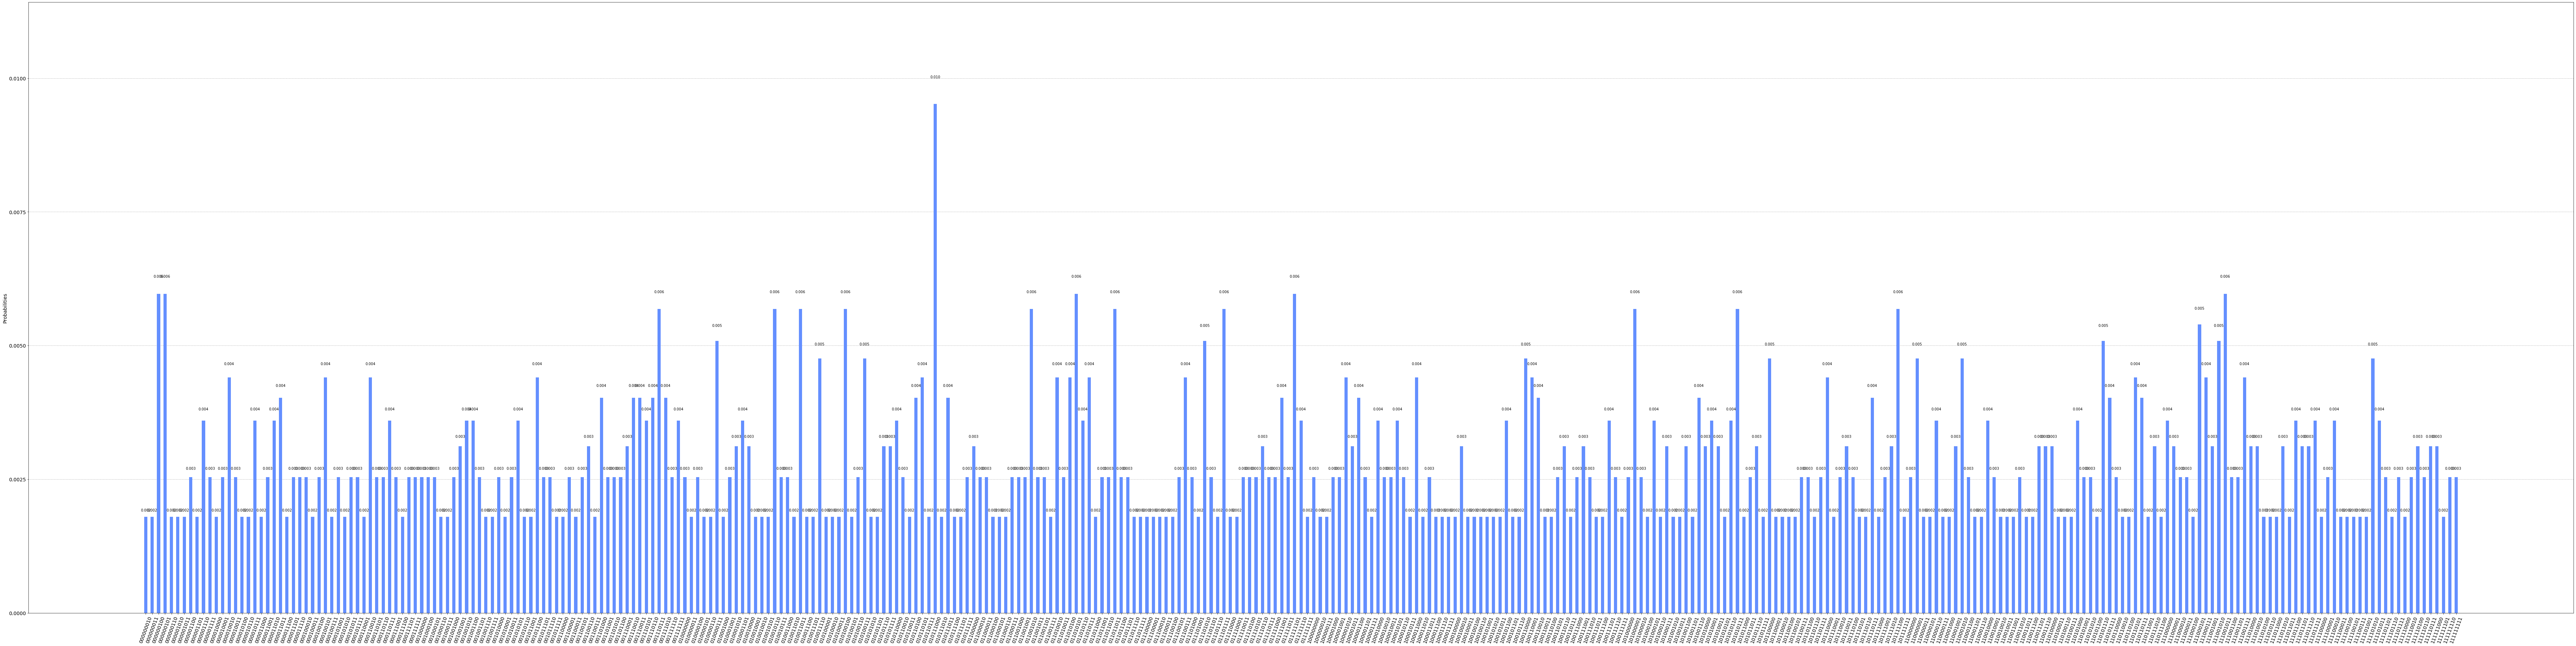

In [3]:
counts = {'000000010': 0.03162277660168379, '000000011': 0.03162277660168379, '000000100': 0.10488088481701516, '000000101': 0.10488088481701516, '000000110': 0.03162277660168379, '000001010': 0.03162277660168379, '000001011': 0.03162277660168379, '000001100': 0.044721359549995794, '000001101': 0.03162277660168379, '000001110': 0.06324555320336758, '000001111': 0.044721359549995794, '000010000': 0.03162277660168379, '000010001': 0.044721359549995794, '000010010': 0.07745966692414834, '000010011': 0.044721359549995794, '000010100': 0.03162277660168379, '000010110': 0.03162277660168379, '000010111': 0.06324555320336758, '000011000': 0.03162277660168379, '000011001': 0.044721359549995794, '000011010': 0.06324555320336758, '000011011': 0.07071067811865475, '000011100': 0.03162277660168379, '000011101': 0.044721359549995794, '000011110': 0.044721359549995794, '000100010': 0.044721359549995794, '000100011': 0.03162277660168379, '000100100': 0.044721359549995794, '000100101': 0.07745966692414834, '000100111': 0.03162277660168379, '000101001': 0.044721359549995794, '000101010': 0.03162277660168379, '000101011': 0.044721359549995794, '000101111': 0.044721359549995794, '000110001': 0.03162277660168379, '000110010': 0.07745966692414834, '000110101': 0.044721359549995794, '000110110': 0.044721359549995794, '000110111': 0.06324555320336758, '000111001': 0.044721359549995794, '000111100': 0.03162277660168379, '000111101': 0.044721359549995794, '000111111': 0.044721359549995794, '001000000': 0.044721359549995794, '001000100': 0.044721359549995794, '001000101': 0.044721359549995794, '001000110': 0.03162277660168379, '001000111': 0.03162277660168379, '001001000': 0.044721359549995794, '001001001': 0.05477225575051661, '001001010': 0.06324555320336758, '001001100': 0.06324555320336758, '001001101': 0.044721359549995794, '001001110': 0.03162277660168379, '001001111': 0.03162277660168379, '001010000': 0.044721359549995794, '001010001': 0.03162277660168379, '001010011': 0.044721359549995794, '001010101': 0.06324555320336758, '001010110': 0.03162277660168379, '001011001': 0.03162277660168379, '001011100': 0.07745966692414834, '001011101': 0.044721359549995794, '001011110': 0.044721359549995794, '001011111': 0.03162277660168379, '001100000': 0.03162277660168379, '001100001': 0.044721359549995794, '001100011': 0.03162277660168379, '001100101': 0.044721359549995794, '001100110': 0.05477225575051661, '001100111': 0.03162277660168379, '001101000': 0.07071067811865475, '001101001': 0.044721359549995794, '001101010': 0.044721359549995794, '001101100': 0.044721359549995794, '001110001': 0.05477225575051661, '001110010': 0.07071067811865475, '001110011': 0.07071067811865475, '001110101': 0.06324555320336758, '001110110': 0.07071067811865475, '001110111': 0.1, '001111010': 0.07071067811865475, '001111110': 0.044721359549995794, '001111111': 0.06324555320336758, '010000000': 0.044721359549995794, '010000011': 0.03162277660168379, '010000100': 0.044721359549995794, '010000101': 0.03162277660168379, '010000110': 0.03162277660168379, '010000111': 0.08944271909999159, '010001000': 0.03162277660168379, '010001001': 0.044721359549995794, '010001010': 0.05477225575051661, '010001101': 0.06324555320336758, '010010000': 0.05477225575051661, '010010001': 0.03162277660168379, '010010010': 0.03162277660168379, '010010101': 0.03162277660168379, '010010110': 0.1, '010010111': 0.044721359549995794, '010011000': 0.044721359549995794, '010011010': 0.03162277660168379, '010011011': 0.1, '010011100': 0.03162277660168379, '010011101': 0.03162277660168379, '010011110': 0.08366600265340755, '010100001': 0.03162277660168379, '010100010': 0.03162277660168379, '010100011': 0.03162277660168379, '010100100': 0.1, '010100101': 0.03162277660168379, '010100110': 0.044721359549995794, '010100111': 0.08366600265340755, '010101010': 0.03162277660168379, '010101101': 0.03162277660168379, '010101110': 0.05477225575051661, '010101111': 0.05477225575051661, '010110000': 0.06324555320336758, '010110010': 0.044721359549995794, '010110011': 0.03162277660168379, '010110100': 0.07071067811865475, '010110101': 0.07745966692414834, '010110111': 0.03162277660168379, '010111000': 0.1673320053068151, '010111010': 0.03162277660168379, '010111011': 0.07071067811865475, '010111100': 0.03162277660168379, '010111101': 0.03162277660168379, '010111111': 0.044721359549995794, '011000000': 0.05477225575051661, '011000010': 0.044721359549995794, '011000011': 0.044721359549995794, '011000100': 0.03162277660168379, '011000101': 0.03162277660168379, '011000110': 0.03162277660168379, '011000111': 0.044721359549995794, '011001000': 0.044721359549995794, '011001001': 0.044721359549995794, '011001010': 0.1, '011001011': 0.044721359549995794, '011001101': 0.044721359549995794, '011001111': 0.03162277660168379, '011010010': 0.07745966692414834, '011010011': 0.044721359549995794, '011010100': 0.07745966692414834, '011010101': 0.10488088481701516, '011010110': 0.06324555320336758, '011010111': 0.07745966692414834, '011011000': 0.03162277660168379, '011011001': 0.044721359549995794, '011011010': 0.044721359549995794, '011011011': 0.1, '011011100': 0.044721359549995794, '011011101': 0.044721359549995794, '011011110': 0.03162277660168379, '011011111': 0.03162277660168379, '011100000': 0.03162277660168379, '011100001': 0.03162277660168379, '011100010': 0.03162277660168379, '011100011': 0.03162277660168379, '011100100': 0.03162277660168379, '011100101': 0.044721359549995794, '011100111': 0.07745966692414834, '011101000': 0.044721359549995794, '011101001': 0.03162277660168379, '011101010': 0.08944271909999159, '011101101': 0.044721359549995794, '011101110': 0.03162277660168379, '011101111': 0.1, '011110000': 0.03162277660168379, '011110001': 0.03162277660168379, '011110011': 0.044721359549995794, '011110100': 0.044721359549995794, '011110101': 0.044721359549995794, '011110110': 0.05477225575051661, '011110111': 0.044721359549995794, '011111000': 0.044721359549995794, '011111001': 0.07071067811865475, '011111011': 0.044721359549995794, '011111101': 0.10488088481701516, '011111110': 0.06324555320336758, '011111111': 0.03162277660168379, '100000000': 0.044721359549995794, '100000010': 0.03162277660168379, '100000111': 0.03162277660168379, '100001000': 0.044721359549995794, '100001001': 0.044721359549995794, '100001010': 0.07745966692414834, '100001011': 0.05477225575051661, '100001100': 0.07071067811865475, '100001101': 0.044721359549995794, '100001111': 0.03162277660168379, '100010000': 0.06324555320336758, '100010010': 0.044721359549995794, '100010011': 0.044721359549995794, '100010101': 0.06324555320336758, '100010110': 0.044721359549995794, '100010111': 0.03162277660168379, '100011000': 0.07745966692414834, '100011010': 0.03162277660168379, '100011011': 0.044721359549995794, '100011100': 0.03162277660168379, '100011110': 0.03162277660168379, '100011111': 0.03162277660168379, '100100000': 0.03162277660168379, '100100010': 0.05477225575051661, '100100011': 0.03162277660168379, '100100100': 0.03162277660168379, '100100110': 0.03162277660168379, '100101001': 0.03162277660168379, '100101010': 0.03162277660168379, '100101011': 0.03162277660168379, '100101100': 0.06324555320336758, '100101101': 0.03162277660168379, '100101110': 0.03162277660168379, '100110000': 0.08366600265340755, '100110001': 0.07745966692414834, '100110010': 0.07071067811865475, '100110011': 0.03162277660168379, '100110100': 0.03162277660168379, '100110101': 0.044721359549995794, '100110110': 0.05477225575051661, '100110111': 0.03162277660168379, '100111000': 0.044721359549995794, '100111001': 0.05477225575051661, '100111010': 0.044721359549995794, '100111011': 0.03162277660168379, '100111100': 0.03162277660168379, '100111101': 0.06324555320336758, '100111110': 0.044721359549995794, '100111111': 0.03162277660168379, '101000000': 0.044721359549995794, '101000001': 0.1, '101000010': 0.044721359549995794, '101000100': 0.03162277660168379, '101000101': 0.06324555320336758, '101000110': 0.03162277660168379, '101000111': 0.05477225575051661, '101001010': 0.03162277660168379, '101001011': 0.03162277660168379, '101001100': 0.05477225575051661, '101001101': 0.03162277660168379, '101001110': 0.07071067811865475, '101010000': 0.05477225575051661, '101010001': 0.06324555320336758, '101010011': 0.05477225575051661, '101010101': 0.03162277660168379, '101010110': 0.06324555320336758, '101010111': 0.1, '101011000': 0.03162277660168379, '101011011': 0.044721359549995794, '101011110': 0.05477225575051661, '101011111': 0.03162277660168379, '101100000': 0.08366600265340755, '101100001': 0.03162277660168379, '101100010': 0.03162277660168379, '101100100': 0.03162277660168379, '101100101': 0.03162277660168379, '101100111': 0.044721359549995794, '101101100': 0.044721359549995794, '101101110': 0.03162277660168379, '101101111': 0.044721359549995794, '101110000': 0.07745966692414834, '101110001': 0.03162277660168379, '101110010': 0.044721359549995794, '101110011': 0.05477225575051661, '101110100': 0.044721359549995794, '101110101': 0.03162277660168379, '101110110': 0.03162277660168379, '101110111': 0.07071067811865475, '101111000': 0.03162277660168379, '101111001': 0.044721359549995794, '101111010': 0.05477225575051661, '101111100': 0.1, '101111111': 0.03162277660168379, '110000000': 0.044721359549995794, '110000001': 0.08366600265340755, '110000011': 0.03162277660168379, '110000101': 0.03162277660168379, '110000110': 0.06324555320336758, '110000111': 0.03162277660168379, '110001000': 0.03162277660168379, '110001001': 0.05477225575051661, '110001010': 0.08366600265340755, '110001100': 0.044721359549995794, '110001101': 0.03162277660168379, '110001110': 0.03162277660168379, '110010000': 0.06324555320336758, '110010001': 0.044721359549995794, '110010010': 0.03162277660168379, '110010011': 0.03162277660168379, '110011001': 0.03162277660168379, '110011010': 0.044721359549995794, '110011011': 0.03162277660168379, '110011100': 0.03162277660168379, '110011101': 0.05477225575051661, '110011110': 0.05477225575051661, '110100000': 0.05477225575051661, '110100011': 0.03162277660168379, '110100110': 0.03162277660168379, '110100111': 0.03162277660168379, '110101000': 0.06324555320336758, '110101001': 0.044721359549995794, '110101010': 0.044721359549995794, '110101100': 0.03162277660168379, '110101110': 0.08944271909999159, '110101111': 0.07071067811865475, '110110000': 0.044721359549995794, '110110010': 0.03162277660168379, '110110100': 0.03162277660168379, '110110101': 0.07745966692414834, '110110111': 0.07071067811865475, '110111001': 0.03162277660168379, '110111010': 0.05477225575051661, '110111100': 0.03162277660168379, '111000000': 0.06324555320336758, '111000001': 0.05477225575051661, '111000010': 0.044721359549995794, '111000011': 0.044721359549995794, '111000100': 0.03162277660168379, '111000101': 0.09486832980505137, '111000111': 0.07745966692414834, '111001001': 0.05477225575051661, '111001010': 0.08944271909999159, '111001011': 0.10488088481701516, '111001100': 0.044721359549995794, '111001101': 0.044721359549995794, '111001111': 0.07745966692414834, '111010000': 0.05477225575051661, '111010010': 0.05477225575051661, '111010100': 0.03162277660168379, '111010110': 0.03162277660168379, '111011000': 0.03162277660168379, '111011010': 0.05477225575051661, '111011011': 0.03162277660168379, '111011100': 0.06324555320336758, '111011101': 0.05477225575051661, '111011110': 0.05477225575051661, '111011111': 0.06324555320336758, '111100000': 0.03162277660168379, '111100001': 0.044721359549995794, '111100010': 0.06324555320336758, '111100011': 0.03162277660168379, '111100100': 0.03162277660168379, '111100101': 0.03162277660168379, '111100111': 0.03162277660168379, '111101001': 0.03162277660168379, '111101010': 0.08366600265340755, '111101011': 0.06324555320336758, '111101101': 0.044721359549995794, '111101110': 0.03162277660168379, '111101111': 0.044721359549995794, '111110000': 0.03162277660168379, '111110010': 0.044721359549995794, '111110100': 0.05477225575051661, '111110110': 0.044721359549995794, '111110111': 0.05477225575051661, '111111000': 0.05477225575051661, '111111101': 0.03162277660168379, '111111110': 0.044721359549995794, '111111111': 0.044721359549995794}
plot_histogram(counts, figsize=(130, 32))

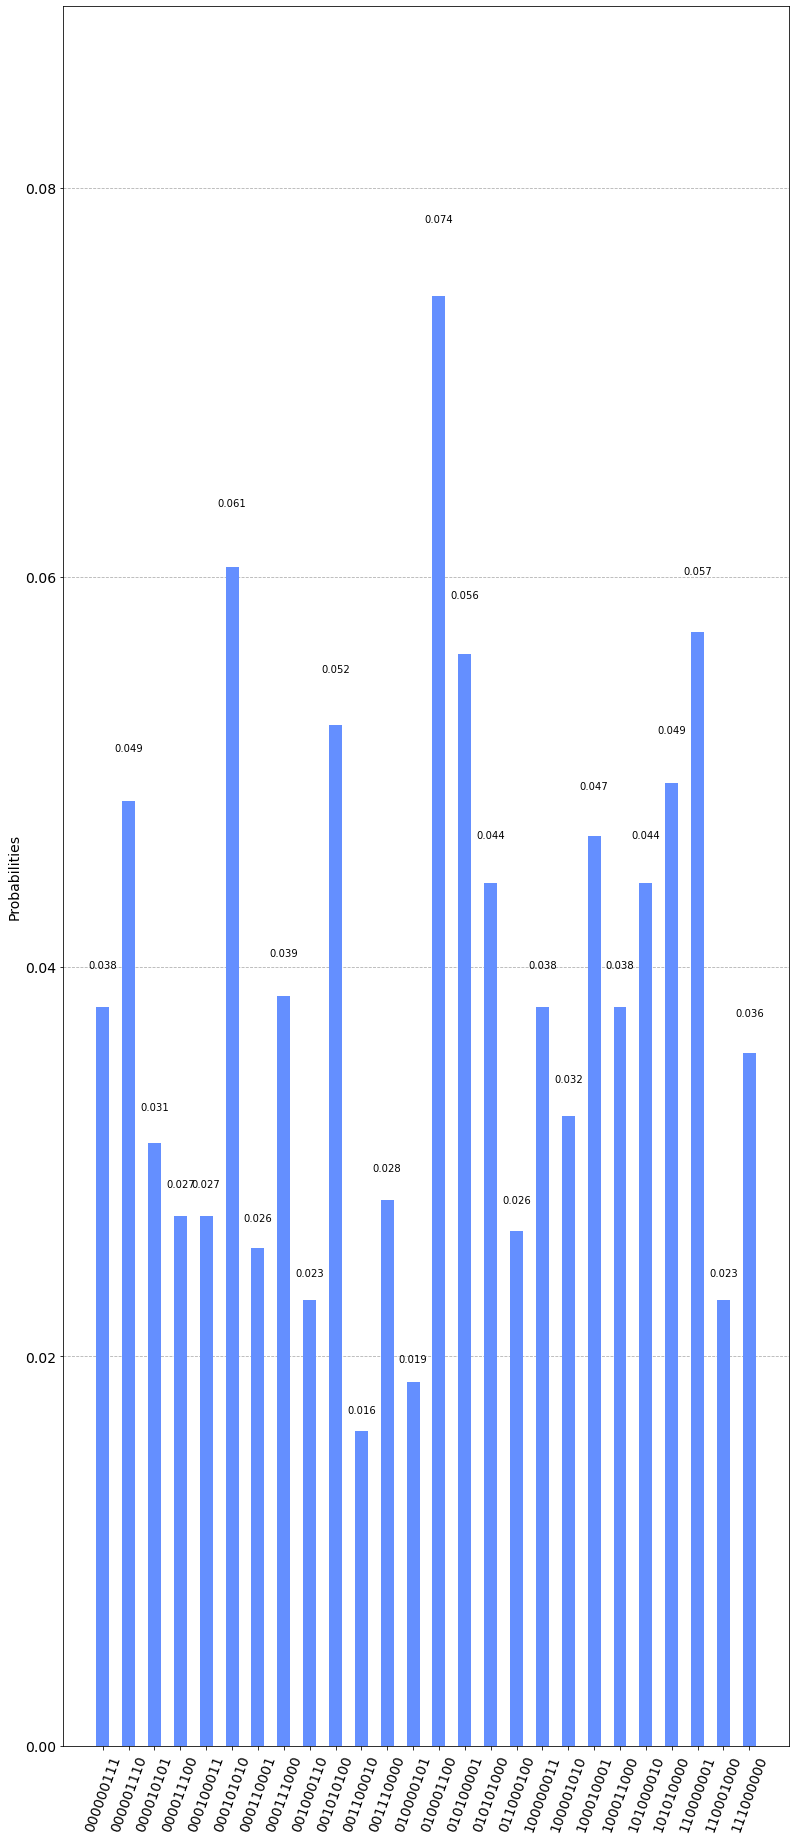

In [4]:
counts = {'000000111': 0.1816590212458495, '000001110': 0.232379000772445, '000010101': 0.14832396974191325, '000011100': 0.130384048104053, '000100011': 0.130384048104053, '000101010': 0.28982753492378877, '000110001': 0.1224744871391589, '000111000': 0.18439088914585774, '001000110': 0.10954451150103323, '001010100': 0.25099800796022265, '001100010': 0.07745966692414834, '001110000': 0.1341640786499874, '010000101': 0.08944271909999159, '010001100': 0.3563705936241092, '010100001': 0.2683281572999748, '010101000': 0.21213203435596426, '011000100': 0.12649110640673517, '100000011': 0.1816590212458495, '100001010': 0.15491933384829668, '100010001': 0.22360679774997896, '100011000': 0.1816590212458495, '101000010': 0.21213203435596426, '101010000': 0.23664319132398465, '110000001': 0.27386127875258304, '110001000': 0.10954451150103323, '111000000': 0.17029386365926402}
plot_histogram(counts, figsize=(13, 32))